In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from cvxopt import matrix, solvers


## Question 1

In [2]:
reward_function_1 = np.zeros((10,10))
reward_function_1[9][9] = 1
reward_function_2 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if j == 4 and i in range(1,7):
                reward_function_2[i][j] = -100.0
        elif j == 5 and i == 1 :
            reward_function_2[i][j] = -100.0
        elif j == 6 and i in [1,2,3,7,8]:
            reward_function_2[i][j] = -100.0
        elif j == 7 and i in [3,7]:
            reward_function_2[i][j] = -100.0
        elif j == 8 and i in range(3,8):
            reward_function_2[i][j] = -100.0
        elif j == 9 and i == 9:
            reward_function_2[i][j] = 10.0
# reward_function_2[1][4] = -100.0
print(range(1,7))
print(reward_function_1)
print(reward_function_2)


range(1, 7)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    

In [3]:
def plt_reward(reward_function):
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    xmajorLocator = MultipleLocator(1)
    ymajorLocator = MultipleLocator(1)
    plt.pcolor(reward_function)
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()


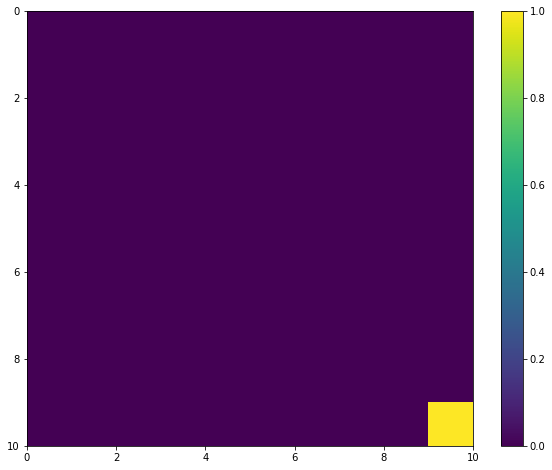

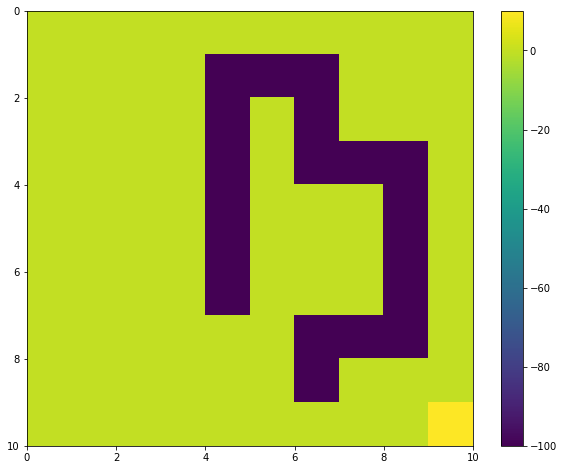

In [4]:
plt_reward(reward_function_1)
plt_reward(reward_function_2)


## Question 2

In [5]:
def V_value(s, R, A, w, gamma, V_):
    """
    A = [1,2,3,4]
    up: 1
    right: 2
    down: 3
    left: 4
    """
    cs = [(s//10), (s%10)] #current state
    direction = {1:[cs[0]-1,cs[1]], 2:[cs[0],cs[1]+1], 3:[cs[0]+1,cs[1]], 4:[cs[0],cs[1]-1], 5:[cs[0],cs[1]]}
    max_V = -10000
    for a in A: 
        P = []
        for i in range(1,5):
            P.append((a==i)*(1-w)+w/4)
        P.append(0)
        for i in range(1,5):
            if direction[i][0] not in range(10) or direction[i][1] not in range(10):
                P[4] += P[i-1]
                P[i-1] = 0
        V_a = 0
        for s_ in range(1,6):
            if P[s_-1] is not 0:
                V_a += P[s_-1]*(R[direction[s_][0]][direction[s_][1]] + gamma*V_[(direction[s_][0])*10+direction[s_][1]])
        if V_a > max_V:
            max_V = V_a
    return max_V

In [6]:
num_state = 100
num_action = 4
w = 0.1
gamma = 0.8
A = range(1,1+num_action)
R = reward_function_1
V = np.zeros(100)
delta = 100000
epsilon = 0.01
while delta > epsilon:
    delta = 0
    for i in range(num_state):
        v = V[i]
        V[i] = V_value(s=i, R=R, A=A, w=w, gamma=gamma, V_=V)
        #print('output')
        #print(V[i])
        delta = max(delta, abs(v-V[i]))
print(V)

[ 0.04179568  0.06283791  0.089742    0.12384898  0.16708096  0.22188288
  0.29135376  0.37942014  0.49098293  0.60964773  0.06283791  0.08787011
  0.12155728  0.16451357  0.21924607  0.28898976  0.37787112  0.49106061
  0.63321853  0.78735399  0.089742    0.12155728  0.16438987  0.21913198
  0.28890328  0.37782648  0.49115592  0.63549019  0.81735527  1.01859718
  0.12384898  0.16451357  0.21913198  0.28889981  0.37782476  0.49115916
  0.6356006   0.81960951  1.05219113  1.31505855  0.16708096  0.21924607
  0.28890328  0.37782476  0.49115918  0.63560325  0.81969511  1.05426506
  1.35157155  1.69507283  0.22188288  0.28898976  0.37782648  0.49115916
  0.63560325  0.8196963   1.05432164  1.35332408  1.73318006  2.18223115
  0.29135376  0.37787112  0.49115592  0.6356006   0.81969511  1.05432164
  1.35335083  1.73446085  2.21952677  2.80680236  0.37942014  0.49106061
  0.63549019  0.81960951  1.05426506  1.35332408  1.73446085  2.22020148
  2.839257    3.60762627  0.49098293  0.63321853  0

In [7]:
#plot 
Value1 = np.asarray(V).reshape((10,10))

def plt_valuetable(StateValue):
    plt.figure(figsize=(8,8)) 
    ax = plt.subplot(111)
    xmajorLocator = MultipleLocator(1)
    ymajorLocator = MultipleLocator(1)

    x = np.linspace(0, 9, 10)
    y = np.linspace(0, 9, 10)
    X, Y = np.meshgrid(x, y)
    for j in range(10):
        for i in range(10):
            plt.text(0.25+i, 0.6+j, round(StateValue[i,j],2))
    plt.xlim([0,10])
    plt.ylim([10,0])
    ax.xaxis.set_major_locator(xmajorLocator)    
    ax.yaxis.set_major_locator(ymajorLocator)  
    plt.grid()
    plt.show()


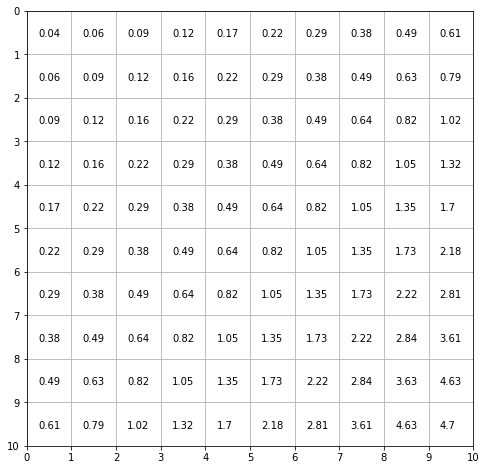

In [8]:
plt_valuetable(Value1)


## Question 3

In [9]:
def plt_valueHeatMap(StateValue):
    fig = plt.figure(figsize=(10,8)) 
    ax = plt.subplot(111)
    xmajorLocator = MultipleLocator(1)
    ymajorLocator = MultipleLocator(1)
    plt.pcolor(StateValue.reshape((10,10)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

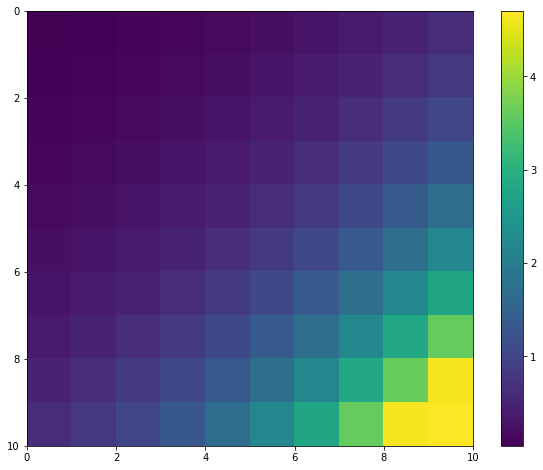

In [10]:
plt_valueHeatMap(Value1)


## Question 5

In [11]:
def pi_policy(s, R, A, w, gamma, V_):
    """
    A = [1,2,3,4]
    up: 1
    right: 2
    down: 3
    left: 4
    """
    cs = [(s//10), (s%10)] #current state
    direction = {1:[cs[0]-1,cs[1]], 2:[cs[0],cs[1]+1], 3:[cs[0]+1,cs[1]], 4:[cs[0],cs[1]-1], 5:[cs[0],cs[1]]}
    max_V = -10000
    for a in A: 
        P = []
        for i in range(1,5):
            P.append((a==i)*(1-w)+w/4)
        P.append(0)
        for i in range(1,5):
            if direction[i][0] not in range(10) or direction[i][1] not in range(10):
                P[4] += P[i-1]
                P[i-1] = 0
        V_a = 0
        for s_ in range(1,6):
            if P[s_-1] is not 0:
                V_a += P[s_-1]*(R[direction[s_][0]][direction[s_][1]] + gamma*V_[(direction[s_][0])*10+direction[s_][1]])
        if V_a > max_V:
            dir = a
            max_V = V_a
    return dir

In [12]:
pi = []
R = reward_function_1
for i in range(num_state):
        pi.append(pi_policy(s=i, R=R, A=A, w=w, gamma=gamma, V_=V))
pi = np.asarray(pi).reshape((10,10))
print(pi)

[[2 2 2 2 2 2 2 3 3 3]
 [3 2 2 2 2 2 3 3 3 3]
 [3 3 2 2 2 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 2 2 3 3 3 3 3]
 [3 3 2 2 2 2 3 3 3 3]
 [3 2 2 2 2 2 2 3 3 3]
 [2 2 2 2 2 2 2 2 3 3]
 [2 2 2 2 2 2 2 2 2 3]
 [2 2 2 2 2 2 2 2 2 2]]


In [13]:
def plt_policy(policy):
    plt.figure(figsize=(8,8)) 
    ax = plt.subplot(111)
    xmajorLocator = MultipleLocator(1)
    ymajorLocator = MultipleLocator(1)

    x = np.linspace(0, 9, 10)
    y = np.linspace(0, 9, 10)
    X, Y = np.meshgrid(x, y)
    QP = plt.quiver(X+0.5, Y+0.5, np.sin((policy-1)*np.pi/2), np.cos((policy-1)*np.pi/2))
    plt.xlim([0,10])
    plt.ylim([10,0])
    ax.xaxis.set_major_locator(xmajorLocator)    
    ax.yaxis.set_major_locator(ymajorLocator)
    plt.grid()
    plt.show()


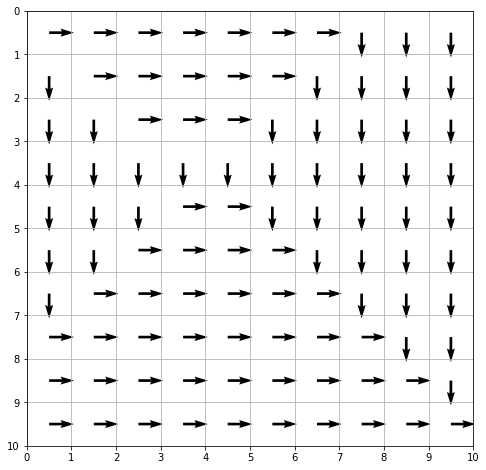

In [14]:
plt_policy(pi)


## Question 6

In [15]:
num_state = 100
num_action = 4
w = 0.1
gamma = 0.8
A = range(1,1+num_action)
R = reward_function_2
V_2 = np.zeros(100)
delta = 100000
epsilon = 0.01
while delta > epsilon:
    delta = 0
    for i in range(num_state):
        v = V_2[i]
        V_2[i] = V_value(s=i, R=R, A=A, w=w, gamma=gamma, V_=V_2)
        #print('output')
        #print(V[i])
        delta = max(delta, abs(v-V_2[i]))
print(V_2)

[  6.48477467e-01   7.94106515e-01   8.25237900e-01   5.36245558e-01
  -2.37043156e+00  -4.23381678e+00  -1.92052971e+00   1.13110795e+00
   1.59435584e+00   2.03820726e+00   8.29851948e-01   1.02123596e+00
   1.06603296e+00  -1.86790436e+00  -6.73821942e+00  -8.67375446e+00
  -6.36979468e+00  -1.29479626e+00   1.92834321e+00   2.61046947e+00
   1.06360962e+00   1.31651254e+00   1.45007729e+00  -1.62402502e+00
  -6.74150886e+00  -1.39111818e+01  -9.64922518e+00  -5.51104325e+00
  -1.31012708e-01   3.35905866e+00   1.36025245e+00   1.69269877e+00
   1.94802285e+00  -1.23216899e+00  -6.32308479e+00  -7.97760603e+00
  -7.93667980e+00  -9.42386879e+00  -1.91442835e+00   4.39062525e+00
   1.73657224e+00   2.17160228e+00   2.58983267e+00  -7.25587435e-01
  -5.83072992e+00  -3.25362550e+00  -3.23020014e+00  -7.41906241e+00
   1.71898209e+00   9.16310147e+00   2.21393346e+00   2.78108417e+00
   3.41709976e+00  -2.75630965e-02  -5.09866208e+00  -5.49015498e-01
  -4.76652804e-01  -2.96756313e+00

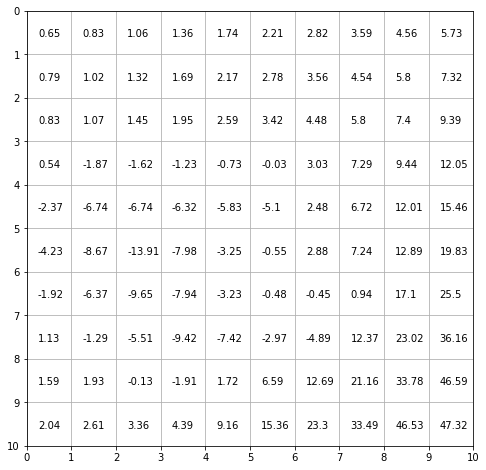

In [16]:
#plot 
Value_2 = np.asarray(V_2).reshape((10,10))
plt_valuetable(Value_2)


## Question 7

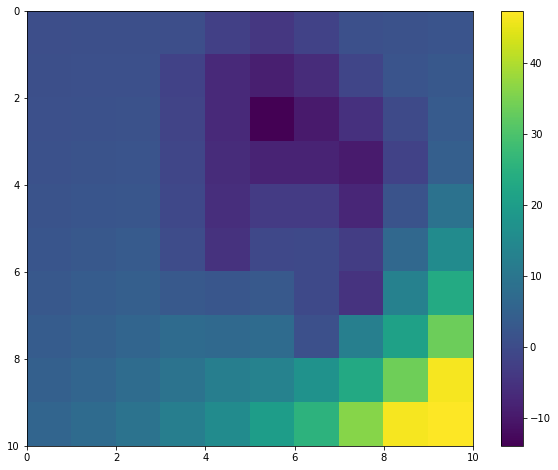

In [17]:
plt_valueHeatMap(Value_2)


## Question 9

In [18]:
pi_2 = []
R = reward_function_2
for i in range(num_state):
        pi_2.append(pi_policy(s=i, R=R, A=A, w=w, gamma=gamma, V_=V_2))
print(np.asarray(pi_2).reshape((10,10)))

[[3 3 3 4 4 2 2 2 2 3]
 [3 3 3 4 4 1 2 2 2 3]
 [3 3 3 4 4 3 2 2 2 3]
 [3 3 3 4 4 3 3 1 2 3]
 [3 3 3 4 4 3 3 3 2 3]
 [3 3 3 4 4 3 3 4 2 3]
 [3 3 3 3 3 3 4 4 2 3]
 [3 3 3 3 3 3 4 3 3 3]
 [2 2 2 3 3 3 3 3 3 3]
 [2 2 2 2 2 2 2 2 2 2]]


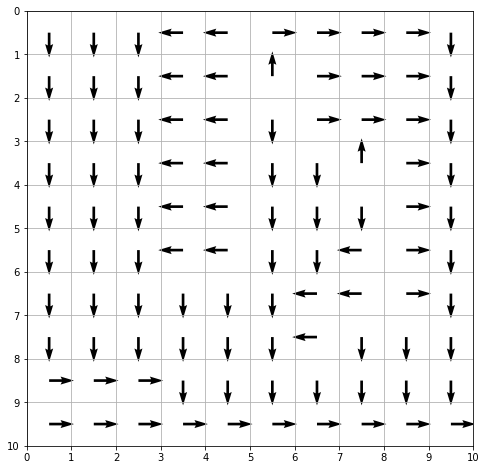

In [19]:
pi_2 = np.asarray(pi_2).reshape((10,10))
plt_policy(pi_2)


## Question 10

## Question 11

In [20]:
def transition_prob(P_list):
    trans_prob = np.zeros((100,100))
    for s in range(100):
        if P_list[s][0] != 0:
            trans_prob[s,s-10] += P_list[s][0]
        if P_list[s][1] != 0:
            trans_prob[s,s+1] += P_list[s][1]
        if P_list[s][2] != 0:
            trans_prob[s,s+10] += P_list[s][2]
        if P_list[s][3] != 0:
            trans_prob[s,s-1] += P_list[s][3]
        trans_prob[s,s] += P_list[s][4]  
    return trans_prob

In [21]:
pi_a = list(pi.reshape(100))
P_list = [[],[],[],[]]

for s in range(100):
    cs = [(s//10), (s%10)] #current state
    direction = {1:[cs[0]-1,cs[1]], 2:[cs[0],cs[1]+1], 3:[cs[0]+1,cs[1]], 4:[cs[0],cs[1]-1], 5:[cs[0],cs[1]]}
    a = pi_a[s]
    P = list()
    for i in range(1,5):
        P.append((a==i)*(1-w)+w/4)
    P.append(0)
    for i in range(1,5):
        if direction[i][0] not in range(10) or direction[i][1] not in range(10):
            P[4] += P[i-1]
            P[i-1] = 0
    P_list[0].append(P)
    
    A_ = [1,2,3,4]
    A_.remove(pi_a[s])
    for j in range(3):
        a = A_[j]
        P = list()
        for i in range(1,5):
            P.append((a==i)*(1-w)+w/4)
        P.append(0)
        for i in range(1,5):
            if direction[i][0] not in range(10) or direction[i][1] not in range(10):
                P[4] += P[i-1]
                P[i-1] = 0
                
        P_list[j+1].append(P)

P_a1 = np.zeros((100,100))
P_a = np.zeros((3,100,100))

P_a1 = transition_prob(P_list[0])
P_a[0] = transition_prob(P_list[1])
P_a[1] = transition_prob(P_list[2])
P_a[2] = transition_prob(P_list[3])


In [22]:
I = np.eye(100,100)
block_matrix = np.zeros((300,100))
for i in range(3):
    block_matrix[100*i:100*(i+1),:] = -np.dot((P_a1 -P_a[i,:,:]),np.matrix(I-gamma*P_a1).I)
# print(block_matrix.shape)

Rmax = 1

# G
G = np.zeros((1000,300))
identity = np.concatenate((np.eye(100),np.eye(100),np.eye(100)),axis=0)
G[0:300,:] = np.concatenate((block_matrix,identity,np.zeros((300,100))),axis=1)
G[300:600,:] = np.concatenate((block_matrix,np.zeros((300,200))),axis=1)
G[600:700,:] = np.concatenate((np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[700:800,:] = np.concatenate((-np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[800:900,:] = np.concatenate((np.eye(100),np.zeros((100,200))),axis=1)
G[900:1000,:] = np.concatenate((-np.eye(100),np.zeros((100,200))),axis=1)

# h
h = np.concatenate((np.zeros((800,1)),Rmax*np.ones((200,1))))


In [23]:
# sweep lambda for largest accuracy
accuracies = []
max_accuracy = 0
R_rec_best = 0
V_rec_best = np.zeros(100)
pi_rec_best = []
for lambda_ in np.linspace(0,5,500):
    # c
    c = np.concatenate((np.zeros(100),np.ones(100),-lambda_*np.ones(100)))
    c = np.matrix(c).T

    G = matrix(G)
    h = matrix(h)
    c = -matrix(c)
    sol = solvers.lp(c,G,h)

#     R_rec = sol['x'][:num_state]
    R_rec = np.asarray(sol['x'][:num_state],dtype=np.double).reshape(10,10)
    
    num_state = 100
    num_action = 4
    w = 0.1
    gamma = 0.8
    A = range(1,1+num_action)
    V = np.zeros(100)
    delta = 100000
    epsilon = 0.01
    while delta > epsilon:
        delta = 0
        for i in range(num_state):
            v = V[i]
            V[i] = V_value(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V)
            #print('output')
            #print(V[i])
            delta = max(delta, abs(v-V[i]))

    pi_rec = []
    for i in range(num_state):
        pi_rec.append(pi_policy(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V))
    pi_rec = np.asarray(pi_rec).reshape((10,10))
    
    # Accuracy
    accuracy = sum(sum(pi_rec==pi))
    accuracies.append(accuracy)
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        lambda_best = lambda_
        R_rec_best = R_rec
        V_rec_best = V
        pi_rec_best = pi_rec
        

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.4330e+01 -2.2769e+02  1e+03  1e+00  2e+01  2e+00
 2: -3.4334e+01 -1.8770e+02  9e+02  1e+00  1e+01  2e+00
 3: -4.1213e+01 -1.2046e+02  4e+02  6e-01  7e+00  1e+00
 4: -4.8154e+01 -7.3147e+01  1e+02  2e-01  2e+00  5e-01
 5: -5.3659e+01 -6.7954e+01  7e+01  1e-01  1e+00  3e-01
 6: -5.7390e+01 -6.3754e+01  3e+01  5e-02  6e-01  9e-02
 7: -5.9461e+01 -6.1947e+01  1e+01  2e-02  2e-01  2e-02
 8: -6.0873e+01 -6.1658e+01  4e+00  6e-03  7e-02  5e-03
 9: -6.1171e+01 -6.1517e+01  2e+00  2e-03  3e-02  2e-03
10: -6.1374e+01 -6.1509e+01  7e-01  1e-03  1e-02  7e-04
11: -6.1453e+01 -6.1509e+01  3e-01  4e-04  5e-03  3e-04
12: -6.1496e+01 -6.1507e+01  6e-02  8e-05  1e-03  6e-05
13: -6.1502e+01 -6.1506e+01  2e-02  3e-05  4e-04  2e-05
14: -6.1504e+01 -6.1506e+01  8e-03  1e-05  2e-04  8e-06
15: -6.1505e+01 -6.1506e+01  2e-03  2e-06  3e-05  2e-06
16: -6.1505e+01 -6.1505e+01  4e-04  5e-07  7e-06  

12: -5.5850e+01 -5.5892e+01  2e-01  3e-04  4e-03  2e-04
13: -5.5885e+01 -5.5895e+01  4e-02  7e-05  9e-04  5e-05
14: -5.5892e+01 -5.5895e+01  2e-02  3e-05  3e-04  2e-05
15: -5.5895e+01 -5.5895e+01  3e-03  5e-06  7e-05  3e-06
16: -5.5895e+01 -5.5896e+01  1e-03  2e-06  3e-05  1e-06
17: -5.5896e+01 -5.5896e+01  2e-04  3e-07  4e-06  2e-07
18: -5.5896e+01 -5.5896e+01  4e-05  6e-08  8e-07  4e-08
19: -5.5896e+01 -5.5896e+01  4e-06  7e-09  9e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.3364e+01 -2.0618e+02  1e+03  1e+00  2e+01  2e+00
 2: -3.1074e+01 -1.6925e+02  8e+02  1e+00  1e+01  1e+00
 3: -3.6513e+01 -9.4100e+01  3e+02  4e-01  5e+00  1e+00
 4: -4.3281e+01 -6.4182e+01  9e+01  1e-01  2e+00  4e-01
 5: -4.8785e+01 -5.9314e+01  5e+01  8e-02  1e+00  2e-01
 6: -5.1022e+01 -5.6688e+01  2e+01  4e-02  5e-01  7e-02
 7: -5.2988e+01 -5.5626e+01  1e+01  2e-02  2e-01  3e-02
 8: -5.3821e+01 -5.5287e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.2866e+01 -1.8584e+02  9e+02  1e+00  1e+01  2e+00
 2: -2.7343e+01 -1.2275e+02  5e+02  7e-01  9e+00  1e+00
 3: -3.4569e+01 -6.9230e+01  1e+02  2e-01  3e+00  5e-01
 4: -4.2300e+01 -5.2944e+01  4e+01  8e-02  1e+00  2e-01
 5: -4.4225e+01 -5.1698e+01  3e+01  5e-02  7e-01  1e-01
 6: -4.6864e+01 -5.0665e+01  2e+01  3e-02  3e-01  4e-02
 7: -4.8709e+01 -5.0093e+01  6e+00  1e-02  1e-01  1e-02
 8: -4.9558e+01 -5.0034e+01  2e+00  3e-03  4e-02  3e-03
 9: -4.9736e+01 -4.9998e+01  1e+00  2e-03  2e-02  2e-03
10: -4.9857e+01 -4.9966e+01  4e-01  8e-04  1e-02  4e-04
11: -4.9938e+01 -4.9975e+01  1e-01  3e-04  3e-03  1e-04
12: -4.9968e+01 -4.9978e+01  4e-02  7e-05  8e-04  4e-05
13: -4.9973e+01 -4.9977e+01  2e-02  3e-05  4e-04  2e-05
14: -4.9974e+01 -4.9977e+01  1e-02  3e-05  3e-04  1e-05
15: -4.9977e+01 -4.9977e+01  2e-03  3e-06  4e-05  2e-06
16: -4.9977e+01 -4.9977e+01  3e-04  5e-07  6e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.2704e+01 -1.6025e+02  7e+02  1e+00  1e+01  2e+00
 2: -1.6207e+01 -1.2761e+02  5e+02  8e-01  1e+01  1e+00
 3: -2.8149e+01 -6.3974e+01  1e+02  3e-01  3e+00  5e-01
 4: -3.4485e+01 -5.1352e+01  7e+01  1e-01  1e+00  2e-01
 5: -3.9283e+01 -4.7286e+01  3e+01  6e-02  7e-01  1e-01
 6: -4.1616e+01 -4.5494e+01  2e+01  3e-02  3e-01  4e-02
 7: -4.3148e+01 -4.4705e+01  6e+00  1e-02  1e-01  1e-02
 8: -4.3914e+01 -4.4472e+01  2e+00  4e-03  5e-02  4e-03
 9: -4.4132e+01 -4.4403e+01  1e+00  2e-03  2e-02  1e-03
10: -4.4277e+01 -4.4408e+01  5e-01  9e-04  1e-02  6e-04
11: -4.4342e+01 -4.4402e+01  2e-01  4e-04  5e-03  2e-04
12: -4.4395e+01 -4.4406e+01  4e-02  8e-05  1e-03  4e-05
13: -4.4403e+01 -4.4407e+01  1e-02  2e-05  3e-04  1e-05
14: -4.4406e+01 -4.4407e+01  2e-03  4e-06  5e-05  2e-06
15: -4.4407e+01 -4.4407e+01  1e-04  3e-07  3e-06  1e-07
16: -4.4407e+01 -4.4407e+01  1e-06  3e-09  3e-08  

17: -4.0169e+01 -4.0169e+01  5e-07  1e-09  1e-08  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.1330e+01 -1.4470e+02  6e+02  9e-01  1e+01  2e+00
 2: -1.5694e+01 -1.1936e+02  5e+02  7e-01  9e+00  1e+00
 3: -2.6444e+01 -6.3022e+01  1e+02  3e-01  3e+00  5e-01
 4: -3.1967e+01 -4.5863e+01  5e+01  1e-01  1e+00  2e-01
 5: -3.5449e+01 -4.1785e+01  2e+01  5e-02  5e-01  8e-02
 6: -3.7319e+01 -4.0364e+01  1e+01  2e-02  3e-01  3e-02
 7: -3.8791e+01 -3.9722e+01  4e+00  7e-03  8e-02  5e-03
 8: -3.9246e+01 -3.9682e+01  2e+00  3e-03  4e-02  2e-03
 9: -3.9497e+01 -3.9635e+01  5e-01  1e-03  1e-02  5e-04
10: -3.9597e+01 -3.9643e+01  2e-01  3e-04  4e-03  2e-04
11: -3.9627e+01 -3.9641e+01  5e-02  1e-04  1e-03  5e-05
12: -3.9639e+01 -3.9641e+01  9e-03  2e-05  2e-04  9e-06
13: -3.9640e+01 -3.9641e+01  3e-03  6e-06  8e-05  3e-06
14: -3.9641e+01 -3.9641e+01  4e-04  8e-07  1e-05  4e-07
15: -3.9641e+01 -3.9641e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -1.9566e+01 -1.3653e+02  6e+02  8e-01  1e+01  2e+00
 2: -1.4559e+01 -1.1350e+02  4e+02  7e-01  8e+00  1e+00
 3: -2.4534e+01 -6.0768e+01  1e+02  3e-01  3e+00  5e-01
 4: -2.9874e+01 -3.9729e+01  3e+01  7e-02  8e-01  1e-01
 5: -3.1728e+01 -3.7400e+01  2e+01  4e-02  5e-01  7e-02
 6: -3.3318e+01 -3.6361e+01  1e+01  2e-02  3e-01  3e-02
 7: -3.4466e+01 -3.5502e+01  4e+00  7e-03  9e-02  4e-03
 8: -3.5216e+01 -3.5483e+01  1e+00  2e-03  2e-02  1e-03
 9: -3.5335e+01 -3.5454e+01  4e-01  8e-04  1e-02  4e-04
10: -3.5354e+01 -3.5443e+01  3e-01  6e-04  7e-03  3e-04
11: -3.5418e+01 -3.5437e+01  7e-02  1e-04  2e-03  7e-05
12: -3.5425e+01 -3.5435e+01  4e-02  7e-05  8e-04  4e-05
13: -3.5431e+01 -3.5434e+01  1e-02  2e-05  3e-04  1e-05
14: -3.5433e+01 -3.5434e+01  9e-04  2e-06  2e-05  9e-07
15: -3.5434e+01 -3.5434e+01  1e-05  2e-08  3e-07  1e-08
16: -3.5434e+01 -3.5434e+01  1e-07  2e-10  3e-09  

15: -3.1981e+01 -3.1983e+01  7e-03  1e-05  2e-04  7e-06
16: -3.1982e+01 -3.1982e+01  6e-04  1e-06  1e-05  6e-07
17: -3.1982e+01 -3.1982e+01  8e-05  1e-07  2e-06  8e-08
18: -3.1982e+01 -3.1982e+01  7e-06  1e-08  2e-07  7e-09
19: -3.1982e+01 -3.1982e+01  1e-06  2e-09  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  3e+01  1e+00
 1: -1.7855e+01 -1.3283e+02  5e+02  8e-01  9e+00  2e+00
 2: -1.2953e+01 -1.0936e+02  4e+02  7e-01  8e+00  1e+00
 3: -2.2749e+01 -5.8008e+01  1e+02  3e-01  3e+00  5e-01
 4: -2.7254e+01 -3.7048e+01  3e+01  7e-02  8e-01  1e-01
 5: -2.8676e+01 -3.4539e+01  2e+01  4e-02  5e-01  7e-02
 6: -2.9979e+01 -3.2373e+01  8e+00  2e-02  2e-01  2e-02
 7: -3.0770e+01 -3.2010e+01  4e+00  9e-03  1e-01  1e-02
 8: -3.1068e+01 -3.1612e+01  2e+00  4e-03  4e-02  3e-03
 9: -3.1410e+01 -3.1561e+01  5e-01  1e-03  1e-02  6e-04
10: -3.1417e+01 -3.1543e+01  4e-01  9e-04  1e-02  5e-04
11: -3.1482e+01 -3.1532e+0

 7: -2.8499e+01 -2.9676e+01  4e+00  8e-03  9e-02  9e-03
 8: -2.8730e+01 -2.9471e+01  2e+00  5e-03  6e-02  5e-03
 9: -2.8948e+01 -2.9285e+01  1e+00  2e-03  3e-02  2e-03
10: -2.8989e+01 -2.9237e+01  8e-01  2e-03  2e-02  1e-03
11: -2.9084e+01 -2.9175e+01  3e-01  6e-04  7e-03  4e-04
12: -2.9114e+01 -2.9147e+01  1e-01  2e-04  3e-03  1e-04
13: -2.9129e+01 -2.9136e+01  2e-02  5e-05  6e-04  2e-05
14: -2.9132e+01 -2.9133e+01  4e-03  9e-06  1e-04  4e-06
15: -2.9132e+01 -2.9133e+01  8e-04  2e-06  2e-05  8e-07
16: -2.9132e+01 -2.9133e+01  4e-04  1e-06  1e-05  4e-07
17: -2.9132e+01 -2.9132e+01  4e-05  8e-08  9e-07  4e-08
18: -2.9132e+01 -2.9132e+01  1e-06  3e-09  4e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.6651e+01 -1.3034e+02  5e+02  8e-01  9e+00  2e+00
 2: -1.2481e+01 -1.0728e+02  4e+02  7e-01  8e+00  1e+00
 3: -2.1733e+01 -5.5734e+01  1e+02  2e-01  3e+00  5e-01
 4: -2.5471e+01 -3.5130e+0

 9: -2.6460e+01 -2.6665e+01  6e-01  1e-03  2e-02  9e-04
10: -2.6510e+01 -2.6611e+01  3e-01  7e-04  8e-03  4e-04
11: -2.6539e+01 -2.6582e+01  1e-01  3e-04  3e-03  1e-04
12: -2.6554e+01 -2.6565e+01  4e-02  8e-05  9e-04  4e-05
13: -2.6558e+01 -2.6561e+01  8e-03  2e-05  2e-04  8e-06
14: -2.6559e+01 -2.6560e+01  1e-03  3e-06  3e-05  1e-06
15: -2.6559e+01 -2.6559e+01  9e-05  2e-07  2e-06  9e-08
16: -2.6559e+01 -2.6559e+01  1e-06  2e-09  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.5547e+01 -1.2798e+02  5e+02  8e-01  9e+00  2e+00
 2: -1.2302e+01 -1.0510e+02  4e+02  7e-01  7e+00  1e+00
 3: -2.0878e+01 -5.3162e+01  1e+02  2e-01  2e+00  4e-01
 4: -2.3930e+01 -3.2878e+01  3e+01  6e-02  7e-01  1e-01
 5: -2.4894e+01 -2.8840e+01  1e+01  3e-02  3e-01  4e-02
 6: -2.5470e+01 -2.7622e+01  7e+00  2e-02  2e-01  2e-02
 7: -2.5899e+01 -2.6950e+01  3e+00  7e-03  8e-02  9e-03
 8: -2.6117e+01 -2.6454e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.4659e+01 -1.2600e+02  5e+02  8e-01  8e+00  1e+00
 2: -1.2374e+01 -1.0287e+02  4e+02  6e-01  7e+00  1e+00
 3: -2.0271e+01 -5.0356e+01  1e+02  2e-01  2e+00  4e-01
 4: -2.2728e+01 -3.1061e+01  3e+01  6e-02  6e-01  1e-01
 5: -2.3480e+01 -2.6842e+01  1e+01  2e-02  2e-01  4e-02
 6: -2.4010e+01 -2.5223e+01  4e+00  9e-03  9e-02  1e-02
 7: -2.4202e+01 -2.4840e+01  2e+00  5e-03  5e-02  6e-03
 8: -2.4291e+01 -2.4552e+01  8e-01  2e-03  2e-02  8e-04
 9: -2.4367e+01 -2.4450e+01  2e-01  6e-04  6e-03  2e-04
10: -2.4385e+01 -2.4419e+01  1e-01  2e-04  3e-03  1e-04
11: -2.4397e+01 -2.4401e+01  1e-02  3e-05  4e-04  1e-05
12: -2.4398e+01 -2.4399e+01  3e-03  7e-06  8e-05  3e-06
13: -2.4398e+01 -2.4399e+01  4e-04  1e-06  1e-05  4e-07
14: -2.4398e+01 -2.4399e+01  3e-05  7e-08  7e-07  3e-08
15: -2.4398e+01 -2.4398e+01  3e-07  7e-10  7e-09  3e-10
Optimal solution found.
     pcost       dcost    

11: -2.3189e+01 -2.3192e+01  7e-03  2e-05  2e-04  9e-06
12: -2.3190e+01 -2.3190e+01  1e-03  3e-06  3e-05  1e-06
13: -2.3190e+01 -2.3190e+01  2e-04  4e-07  4e-06  2e-07
14: -2.3190e+01 -2.3190e+01  3e-05  8e-08  8e-07  4e-08
15: -2.3190e+01 -2.3190e+01  4e-06  9e-09  9e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.3846e+01 -1.2413e+02  5e+02  8e-01  8e+00  1e+00
 2: -1.2687e+01 -1.0012e+02  4e+02  6e-01  6e+00  1e+00
 3: -1.9838e+01 -4.6500e+01  9e+01  2e-01  2e+00  4e-01
 4: -2.1800e+01 -2.8544e+01  2e+01  5e-02  5e-01  8e-02
 5: -2.2407e+01 -2.5264e+01  8e+00  2e-02  2e-01  3e-02
 6: -2.2842e+01 -2.3850e+01  3e+00  7e-03  7e-02  1e-02
 7: -2.2956e+01 -2.3345e+01  1e+00  3e-03  3e-02  3e-03
 8: -2.3017e+01 -2.3157e+01  4e-01  1e-03  1e-02  9e-04
 9: -2.3040e+01 -2.3093e+01  1e-01  4e-04  4e-03  3e-04
10: -2.3043e+01 -2.3076e+01  9e-02  2e-04  2e-03  1e-04
11: -2.3051e+01 -2.3056e+0

 2: -1.3139e+01 -9.7352e+01  3e+02  6e-01  6e+00  9e-01
 3: -1.9680e+01 -4.1726e+01  7e+01  2e-01  2e+00  3e-01
 4: -2.1097e+01 -2.7350e+01  2e+01  4e-02  4e-01  8e-02
 5: -2.1574e+01 -2.3832e+01  6e+00  2e-02  2e-01  2e-02
 6: -2.1847e+01 -2.2734e+01  2e+00  6e-03  6e-02  7e-03
 7: -2.1960e+01 -2.2268e+01  9e-01  2e-03  2e-02  1e-03
 8: -2.2019e+01 -2.2084e+01  2e-01  5e-04  4e-03  2e-04
 9: -2.2029e+01 -2.2045e+01  4e-02  1e-04  1e-03  5e-05
10: -2.2032e+01 -2.2037e+01  1e-02  4e-05  4e-04  2e-05
11: -2.2033e+01 -2.2034e+01  3e-03  7e-06  7e-05  3e-06
12: -2.2033e+01 -2.2034e+01  6e-04  2e-06  2e-05  7e-07
13: -2.2033e+01 -2.2033e+01  1e-04  4e-07  3e-06  2e-07
14: -2.2033e+01 -2.2033e+01  4e-05  1e-07  1e-06  4e-08
15: -2.2033e+01 -2.2033e+01  6e-06  1e-08  1e-07  6e-09
16: -2.2033e+01 -2.2033e+01  8e-07  2e-09  2e-08  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.3171e+01 -1.2252e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.2648e+01 -1.2126e+02  5e+02  8e-01  7e+00  1e+00
 2: -1.3755e+01 -9.5535e+01  3e+02  6e-01  5e+00  9e-01
 3: -1.9494e+01 -3.6992e+01  6e+01  1e-01  1e+00  2e-01
 4: -2.0441e+01 -2.5683e+01  2e+01  4e-02  3e-01  7e-02
 5: -2.0752e+01 -2.2670e+01  5e+00  1e-02  1e-01  2e-02
 6: -2.0877e+01 -2.1520e+01  2e+00  5e-03  4e-02  4e-03
 7: -2.0993e+01 -2.1148e+01  4e-01  1e-03  1e-02  8e-04
 8: -2.1013e+01 -2.1040e+01  7e-02  2e-04  2e-03  1e-04
 9: -2.1017e+01 -2.1029e+01  3e-02  9e-05  8e-04  4e-05
10: -2.1019e+01 -2.1022e+01  9e-03  2e-05  2e-04  1e-05
11: -2.1019e+01 -2.1021e+01  4e-03  1e-05  9e-05  4e-06
12: -2.1019e+01 -2.1020e+01  5e-04  1e-06  1e-05  5e-07
13: -2.1019e+01 -2.1019e+01  1e-04  4e-07  3e-06  1e-07
14: -2.1019e+01 -2.1019e+01  2e-05  6e-08  5e-07  2e-08
15: -2.1019e+01 -2.1019e+01  4e-06  1e-08  1e-07  4e-09
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1089e+01 -1.3563e+02  6e+02  9e-01  8e+00  1e+00
 2: -1.5364e+01 -1.1765e+02  5e+02  7e-01  6e+00  1e+00
 3: -1.6414e+01 -6.8713e+01  2e+02  4e-01  3e+00  8e-01
 4: -1.9323e+01 -2.8932e+01  3e+01  7e-02  6e-01  1e-01
 5: -1.9805e+01 -2.2833e+01  8e+00  2e-02  2e-01  4e-02
 6: -1.9984e+01 -2.1218e+01  3e+00  9e-03  8e-02  1e-02
 7: -2.0076e+01 -2.0598e+01  1e+00  4e-03  3e-02  3e-03
 8: -2.0144e+01 -2.0350e+01  6e-01  1e-03  1e-02  1e-03
 9: -2.0165e+01 -2.0244e+01  2e-01  6e-04  5e-03  3e-04
10: -2.0176e+01 -2.0195e+01  5e-02  1e-04  1e-03  7e-05
11: -2.0179e+01 -2.0183e+01  1e-02  3e-05  3e-04  2e-05
12: -2.0179e+01 -2.0181e+01  4e-03  1e-05  9e-05  5e-06
13: -2.0179e+01 -2.0180e+01  6e-04  2e-06  1e-05  7e-07
14: -2.0179e+01 -2.0179e+01  1e-04  4e-07  3e-06  2e-07
15: -2.0179e+01 -2.0179e+01  2e-05  5e-08  5e-07  2e-08
16: -2.0179e+01 -2.0179e+01  4e-06  9e-09  8e-08  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.0125e+01 -1.4571e+02  6e+02  1e+00  8e+00  1e+00
 2: -1.4844e+01 -1.2305e+02  5e+02  8e-01  6e+00  1e+00
 3: -1.4825e+01 -8.0384e+01  3e+02  5e-01  4e+00  9e-01
 4: -1.8678e+01 -2.8222e+01  3e+01  7e-02  6e-01  1e-01
 5: -1.9196e+01 -2.2329e+01  9e+00  2e-02  2e-01  4e-02
 6: -1.9328e+01 -2.0595e+01  3e+00  9e-03  8e-02  1e-02
 7: -1.9411e+01 -1.9953e+01  1e+00  4e-03  3e-02  4e-03
 8: -1.9498e+01 -1.9580e+01  2e-01  6e-04  5e-03  2e-04
 9: -1.9503e+01 -1.9544e+01  1e-01  3e-04  2e-03  1e-04
10: -1.9505e+01 -1.9525e+01  5e-02  1e-04  1e-03  5e-05
11: -1.9507e+01 -1.9512e+01  1e-02  3e-05  3e-04  1e-05
12: -1.9508e+01 -1.9509e+01  3e-03  8e-06  7e-05  3e-06
13: -1.9508e+01 -1.9508e+01  8e-04  2e-06  2e-05  8e-07
14: -1.9508e+01 -1.9508e+01  2e-04  5e-07  4e-06  2e-07
15: -1.9508e+01 -1.9508e+01  2e-05  7e-08  5e-07  2e-08
16: -1.9508e+01 -1.9508e+01  7e-06  2e-08  1e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.3850e+00 -1.5438e+02  7e+02  1e+00  8e+00  1e+00
 2: -1.4448e+01 -1.2429e+02  5e+02  8e-01  6e+00  1e+00
 3: -1.3765e+01 -8.4240e+01  3e+02  5e-01  4e+00  9e-01
 4: -1.8326e+01 -2.8845e+01  3e+01  8e-02  6e-01  2e-01
 5: -1.8763e+01 -2.1878e+01  9e+00  2e-02  2e-01  4e-02
 6: -1.8783e+01 -2.0129e+01  4e+00  1e-02  8e-02  1e-02
 7: -1.8890e+01 -1.9318e+01  1e+00  3e-03  2e-02  4e-03
 8: -1.8931e+01 -1.9048e+01  3e-01  8e-04  7e-03  9e-04
 9: -1.8935e+01 -1.8974e+01  1e-01  3e-04  2e-03  3e-04
10: -1.8936e+01 -1.8954e+01  5e-02  1e-04  1e-03  7e-05
11: -1.8937e+01 -1.8941e+01  1e-02  3e-05  2e-04  1e-05
12: -1.8937e+01 -1.8939e+01  3e-03  8e-06  6e-05  4e-06
13: -1.8938e+01 -1.8938e+01  5e-04  1e-06  1e-05  6e-07
14: -1.8938e+01 -1.8938e+01  9e-05  2e-07  2e-06  1e-07
15: -1.8938e+01 -1.8938e+01  1e-05  3e-08  2e-07  1e-08
16: -1.8938e+01 -1.8938e+01  2e-06  5e-09  4e-08  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -8.7348e+00 -1.6171e+02  8e+02  1e+00  8e+00  1e+00
 2: -1.4019e+01 -1.2367e+02  5e+02  8e-01  6e+00  1e+00
 3: -1.2919e+01 -8.5271e+01  3e+02  5e-01  4e+00  9e-01
 4: -1.8087e+01 -2.8966e+01  3e+01  8e-02  6e-01  2e-01
 5: -1.8398e+01 -2.1628e+01  9e+00  2e-02  2e-01  4e-02
 6: -1.8373e+01 -1.9790e+01  4e+00  1e-02  8e-02  1e-02
 7: -1.8480e+01 -1.8838e+01  1e+00  3e-03  2e-02  3e-03
 8: -1.8479e+01 -1.8605e+01  3e-01  9e-04  7e-03  5e-04
 9: -1.8487e+01 -1.8536e+01  1e-01  3e-04  3e-03  2e-04
10: -1.8491e+01 -1.8503e+01  3e-02  8e-05  7e-04  4e-05
11: -1.8492e+01 -1.8495e+01  9e-03  2e-05  2e-04  1e-05
12: -1.8492e+01 -1.8493e+01  2e-03  6e-06  5e-05  3e-06
13: -1.8492e+01 -1.8492e+01  4e-04  1e-06  8e-06  5e-07
14: -1.8492e+01 -1.8492e+01  1e-04  3e-07  2e-06  1e-07
15: -1.8492e+01 -1.8492e+01  2e-05  5e-08  3e-07  2e-08
16: -1.8492e+01 -1.8492e+01  5e-06  1e-08  9e-08  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -8.0814e+00 -1.6869e+02  8e+02  1e+00  8e+00  1e+00
 2: -1.3503e+01 -1.2190e+02  5e+02  8e-01  6e+00  1e+00
 3: -1.2154e+01 -8.4827e+01  3e+02  5e-01  4e+00  9e-01
 4: -1.7745e+01 -2.9134e+01  3e+01  8e-02  6e-01  2e-01
 5: -1.7919e+01 -2.1499e+01  1e+01  3e-02  2e-01  5e-02
 6: -1.7916e+01 -1.9205e+01  4e+00  9e-03  7e-02  1e-02
 7: -1.7984e+01 -1.8212e+01  6e-01  2e-03  1e-02  1e-03
 8: -1.7984e+01 -1.8087e+01  3e-01  7e-04  5e-03  4e-04
 9: -1.7989e+01 -1.8032e+01  1e-01  3e-04  2e-03  2e-04
10: -1.7992e+01 -1.7999e+01  2e-02  5e-05  4e-04  2e-05
11: -1.7992e+01 -1.7996e+01  1e-02  3e-05  2e-04  1e-05
12: -1.7992e+01 -1.7994e+01  7e-03  2e-05  1e-04  8e-06
13: -1.7992e+01 -1.7992e+01  9e-04  2e-06  2e-05  1e-06
14: -1.7992e+01 -1.7992e+01  3e-04  7e-07  5e-06  3e-07
15: -1.7992e+01 -1.7992e+01  4e-05  1e-07  9e-07  5e-08
16: -1.7992e+01 -1.7992e+01  1e-05  3e-08  2e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.5523e+00 -1.7398e+02  9e+02  1e+00  8e+00  1e+00
 2: -1.3032e+01 -1.1997e+02  5e+02  8e-01  5e+00  1e+00
 3: -1.1608e+01 -8.3752e+01  3e+02  5e-01  4e+00  8e-01
 4: -1.7377e+01 -2.9082e+01  4e+01  8e-02  6e-01  2e-01
 5: -1.7493e+01 -2.1253e+01  1e+01  3e-02  2e-01  5e-02
 6: -1.7496e+01 -1.8612e+01  3e+00  8e-03  6e-02  1e-02
 7: -1.7496e+01 -1.8090e+01  2e+00  4e-03  3e-02  3e-03
 8: -1.7542e+01 -1.7718e+01  5e-01  1e-03  9e-03  1e-03
 9: -1.7545e+01 -1.7614e+01  2e-01  5e-04  4e-03  4e-04
10: -1.7547e+01 -1.7565e+01  5e-02  1e-04  9e-04  8e-05
11: -1.7547e+01 -1.7553e+01  2e-02  5e-05  3e-04  3e-05
12: -1.7547e+01 -1.7549e+01  7e-03  2e-05  1e-04  8e-06
13: -1.7547e+01 -1.7547e+01  1e-03  3e-06  2e-05  1e-06
14: -1.7547e+01 -1.7547e+01  3e-04  8e-07  6e-06  3e-07
15: -1.7547e+01 -1.7547e+01  9e-05  2e-07  2e-06  1e-07
16: -1.7547e+01 -1.7547e+01  1e-05  4e-08  3e-07  

11: -1.7158e+01 -1.7164e+01  2e-02  4e-05  3e-04  2e-05
12: -1.7158e+01 -1.7159e+01  4e-03  1e-05  7e-05  5e-06
13: -1.7158e+01 -1.7158e+01  6e-04  2e-06  1e-05  7e-07
14: -1.7158e+01 -1.7158e+01  2e-04  6e-07  4e-06  3e-07
15: -1.7158e+01 -1.7158e+01  3e-05  8e-08  5e-07  3e-08
16: -1.7158e+01 -1.7158e+01  6e-06  1e-08  1e-07  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.0604e+00 -1.7857e+02  9e+02  1e+00  8e+00  1e+00
 2: -1.2599e+01 -1.1926e+02  5e+02  8e-01  5e+00  1e+00
 3: -1.1199e+01 -8.2933e+01  3e+02  5e-01  4e+00  8e-01
 4: -1.6995e+01 -2.9006e+01  4e+01  9e-02  6e-01  2e-01
 5: -1.7072e+01 -2.0913e+01  1e+01  3e-02  2e-01  5e-02
 6: -1.7027e+01 -1.8187e+01  3e+00  8e-03  6e-02  1e-02
 7: -1.7108e+01 -1.7376e+01  7e-01  2e-03  1e-02  2e-03
 8: -1.7103e+01 -1.7213e+01  3e-01  8e-04  5e-03  7e-04
 9: -1.7102e+01 -1.7155e+01  1e-01  4e-04  3e-03  3e-04
10: -1.7102e+01 -1.7113e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -6.5979e+00 -1.8256e+02  9e+02  1e+00  8e+00  1e+00
 2: -1.2168e+01 -1.1835e+02  5e+02  8e-01  5e+00  1e+00
 3: -1.0892e+01 -8.2442e+01  3e+02  5e-01  3e+00  8e-01
 4: -1.6089e+01 -3.3903e+01  6e+01  1e-01  8e-01  2e-01
 5: -1.6622e+01 -2.1665e+01  1e+01  4e-02  2e-01  6e-02
 6: -1.6527e+01 -1.8263e+01  5e+00  1e-02  8e-02  1e-02
 7: -1.6661e+01 -1.7026e+01  1e+00  3e-03  2e-02  3e-03
 8: -1.6658e+01 -1.6823e+01  5e-01  1e-03  8e-03  1e-03
 9: -1.6658e+01 -1.6724e+01  2e-01  5e-04  3e-03  4e-04
10: -1.6659e+01 -1.6676e+01  5e-02  1e-04  8e-04  9e-05
11: -1.6659e+01 -1.6666e+01  2e-02  5e-05  3e-04  2e-05
12: -1.6659e+01 -1.6660e+01  4e-03  1e-05  7e-05  5e-06
13: -1.6659e+01 -1.6659e+01  5e-04  1e-06  9e-06  6e-07
14: -1.6659e+01 -1.6659e+01  1e-04  4e-07  3e-06  2e-07
15: -1.6659e+01 -1.6659e+01  3e-05  8e-08  6e-07  4e-08
16: -1.6659e+01 -1.6659e+01  6e-06  1e-08  1e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -6.1595e+00 -1.8605e+02  1e+03  1e+00  8e+00  1e+00
 2: -1.1740e+01 -1.1731e+02  5e+02  8e-01  5e+00  9e-01
 3: -1.0675e+01 -8.2580e+01  3e+02  5e-01  3e+00  8e-01
 4: -1.5441e+01 -3.7005e+01  7e+01  2e-01  1e+00  3e-01
 5: -1.6206e+01 -2.2613e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.6142e+01 -1.7865e+01  5e+00  1e-02  8e-02  2e-02
 7: -1.6224e+01 -1.6678e+01  1e+00  3e-03  2e-02  4e-03
 8: -1.6218e+01 -1.6380e+01  4e-01  1e-03  7e-03  1e-03
 9: -1.6215e+01 -1.6286e+01  2e-01  5e-04  3e-03  3e-04
10: -1.6216e+01 -1.6232e+01  4e-02  1e-04  7e-04  6e-05
11: -1.6216e+01 -1.6222e+01  2e-02  4e-05  3e-04  2e-05
12: -1.6216e+01 -1.6218e+01  4e-03  1e-05  6e-05  4e-06
13: -1.6216e+01 -1.6216e+01  7e-04  2e-06  1e-05  7e-07
14: -1.6216e+01 -1.6216e+01  2e-04  5e-07  3e-06  2e-07
15: -1.6216e+01 -1.6216e+01  3e-05  7e-08  5e-07  3e-08
16: -1.6216e+01 -1.6216e+01  6e-06  1e-08  9e-08  

16: -1.5829e+01 -1.5829e+01  8e-06  2e-08  1e-07  8e-09
17: -1.5829e+01 -1.5829e+01  2e-06  5e-09  3e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -5.7413e+00 -1.8911e+02  1e+03  1e+00  8e+00  1e+00
 2: -1.1314e+01 -1.1620e+02  5e+02  7e-01  5e+00  9e-01
 3: -1.0502e+01 -8.2549e+01  3e+02  5e-01  3e+00  8e-01
 4: -1.4825e+01 -4.0068e+01  8e+01  2e-01  1e+00  3e-01
 5: -1.5845e+01 -2.2877e+01  2e+01  5e-02  3e-01  8e-02
 6: -1.5698e+01 -1.7666e+01  6e+00  1e-02  9e-02  2e-02
 7: -1.5779e+01 -1.6350e+01  2e+00  4e-03  3e-02  5e-03
 8: -1.5774e+01 -1.5894e+01  3e-01  8e-04  5e-03  4e-04
 9: -1.5773e+01 -1.5823e+01  1e-01  3e-04  2e-03  2e-04
10: -1.5773e+01 -1.5791e+01  5e-02  1e-04  8e-04  6e-05
11: -1.5774e+01 -1.5779e+01  2e-02  4e-05  2e-04  2e-05
12: -1.5773e+01 -1.5775e+01  4e-03  1e-05  7e-05  4e-06
13: -1.5773e+01 -1.5773e+01  6e-04  1e-06  9e-06  6e-07
14: -1.5773e+01 -1.5773e+0

13: -1.5331e+01 -1.5331e+01  7e-04  2e-06  1e-05  7e-07
14: -1.5331e+01 -1.5331e+01  1e-04  4e-07  2e-06  1e-07
15: -1.5331e+01 -1.5331e+01  5e-05  1e-07  7e-07  5e-08
16: -1.5331e+01 -1.5331e+01  8e-06  2e-08  1e-07  8e-09
17: -1.5331e+01 -1.5331e+01  2e-06  6e-09  3e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -5.2918e+00 -1.9212e+02  1e+03  1e+00  8e+00  1e+00
 2: -1.0840e+01 -1.1490e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0349e+01 -8.2371e+01  3e+02  5e-01  3e+00  7e-01
 4: -1.4203e+01 -4.3181e+01  1e+02  2e-01  1e+00  3e-01
 5: -1.5463e+01 -2.1775e+01  2e+01  4e-02  3e-01  6e-02
 6: -1.5202e+01 -1.7069e+01  5e+00  1e-02  8e-02  2e-02
 7: -1.5283e+01 -1.5840e+01  2e+00  4e-03  2e-02  4e-03
 8: -1.5271e+01 -1.5534e+01  7e-01  2e-03  1e-02  1e-03
 9: -1.5277e+01 -1.5337e+01  2e-01  4e-04  3e-03  2e-04
10: -1.5276e+01 -1.5299e+01  6e-02  2e-04  9e-04  8e-05
11: -1.5276e+01 -1.5284e+0

13: -1.4846e+01 -1.4848e+01  4e-03  1e-05  6e-05  5e-06
14: -1.4846e+01 -1.4846e+01  6e-04  1e-06  8e-06  6e-07
15: -1.4846e+01 -1.4846e+01  1e-04  3e-07  2e-06  1e-07
16: -1.4846e+01 -1.4846e+01  4e-05  9e-08  5e-07  4e-08
17: -1.4846e+01 -1.4846e+01  8e-06  2e-08  1e-07  8e-09
18: -1.4846e+01 -1.4846e+01  2e-06  5e-09  3e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.8619e+00 -1.9474e+02  1e+03  1e+00  8e+00  1e+00
 2: -1.0370e+01 -1.1358e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0232e+01 -8.2085e+01  3e+02  5e-01  3e+00  7e-01
 4: -1.3655e+01 -4.5919e+01  1e+02  2e-01  1e+00  3e-01
 5: -1.5006e+01 -2.2630e+01  2e+01  5e-02  3e-01  7e-02
 6: -1.4721e+01 -1.6887e+01  6e+00  2e-02  9e-02  2e-02
 7: -1.4811e+01 -1.5334e+01  1e+00  4e-03  2e-02  4e-03
 8: -1.4798e+01 -1.5246e+01  1e+00  3e-03  2e-02  3e-03
 9: -1.4801e+01 -1.4895e+01  3e-01  7e-04  4e-03  5e-04
10: -1.4798e+01 -1.4842e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.5400e+00 -1.9654e+02  1e+03  1e+00  8e+00  1e+00
 2: -1.0008e+01 -1.1256e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0161e+01 -8.1808e+01  3e+02  5e-01  3e+00  7e-01
 4: -1.3278e+01 -4.7795e+01  1e+02  2e-01  1e+00  4e-01
 5: -1.4608e+01 -2.4674e+01  3e+01  7e-02  4e-01  9e-02
 6: -1.4408e+01 -1.7083e+01  8e+00  2e-02  1e-01  2e-02
 7: -1.4446e+01 -1.4974e+01  2e+00  4e-03  2e-02  3e-03
 8: -1.4446e+01 -1.4710e+01  8e-01  2e-03  1e-02  1e-03
 9: -1.4434e+01 -1.4567e+01  4e-01  9e-04  5e-03  4e-04
10: -1.4434e+01 -1.4476e+01  1e-01  3e-04  2e-03  1e-04
11: -1.4433e+01 -1.4448e+01  4e-02  1e-04  6e-04  5e-05
12: -1.4433e+01 -1.4436e+01  1e-02  3e-05  1e-04  1e-05
13: -1.4432e+01 -1.4434e+01  3e-03  8e-06  5e-05  3e-06
14: -1.4432e+01 -1.4432e+01  5e-04  1e-06  6e-06  5e-07
15: -1.4432e+01 -1.4432e+01  1e-04  3e-07  1e-06  1e-07
16: -1.4432e+01 -1.4432e+01  2e-05  6e-08  3e-07  

11: -1.4071e+01 -1.4086e+01  4e-02  1e-04  5e-04  6e-05
12: -1.4071e+01 -1.4080e+01  3e-02  6e-05  3e-04  3e-05
13: -1.4071e+01 -1.4079e+01  2e-02  6e-05  3e-04  3e-05
14: -1.4071e+01 -1.4074e+01  1e-02  2e-05  1e-04  1e-05
15: -1.4070e+01 -1.4071e+01  1e-03  2e-06  1e-05  1e-06
16: -1.4070e+01 -1.4070e+01  2e-04  5e-07  3e-06  2e-07
17: -1.4070e+01 -1.4070e+01  4e-05  1e-07  5e-07  4e-08
18: -1.4070e+01 -1.4070e+01  9e-06  2e-08  1e-07  1e-08
19: -1.4070e+01 -1.4070e+01  2e-06  4e-09  2e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.1847e+00 -1.9837e+02  1e+03  1e+00  7e+00  1e+00
 2: -9.5974e+00 -1.1139e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0100e+01 -8.1446e+01  3e+02  5e-01  3e+00  7e-01
 4: -1.2896e+01 -4.9685e+01  1e+02  3e-01  1e+00  4e-01
 5: -1.4170e+01 -2.7405e+01  4e+01  9e-02  5e-01  1e-01
 6: -1.4122e+01 -1.7629e+01  1e+01  2e-02  1e-01  3e-02
 7: -1.4011e+01 -1.4881e+0

 5: -1.3842e+01 -2.9384e+01  5e+01  1e-01  6e-01  1e-01
 6: -1.3876e+01 -1.7860e+01  1e+01  3e-02  1e-01  3e-02
 7: -1.3661e+01 -1.4720e+01  3e+00  8e-03  4e-02  8e-03
 8: -1.3666e+01 -1.3854e+01  5e-01  1e-03  7e-03  1e-03
 9: -1.3663e+01 -1.3774e+01  3e-01  8e-04  4e-03  6e-04
10: -1.3660e+01 -1.3706e+01  1e-01  3e-04  2e-03  2e-04
11: -1.3659e+01 -1.3688e+01  9e-02  2e-04  1e-03  1e-04
12: -1.3657e+01 -1.3662e+01  1e-02  4e-05  2e-04  2e-05
13: -1.3656e+01 -1.3657e+01  2e-03  6e-06  3e-05  3e-06
14: -1.3656e+01 -1.3656e+01  4e-04  9e-07  5e-06  4e-07
15: -1.3656e+01 -1.3656e+01  8e-05  2e-07  1e-06  8e-08
16: -1.3656e+01 -1.3656e+01  1e-05  3e-08  2e-07  2e-08
17: -1.3656e+01 -1.3656e+01  5e-06  1e-08  6e-08  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.8421e+00 -2.0000e+02  1e+03  1e+00  7e+00  1e+00
 2: -9.1919e+00 -1.1025e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0058e+01 -8.1048e+0

15: -1.3307e+01 -1.3307e+01  2e-03  4e-06  2e-05  2e-06
16: -1.3307e+01 -1.3307e+01  2e-04  4e-07  2e-06  2e-07
17: -1.3306e+01 -1.3306e+01  2e-05  4e-08  2e-07  2e-08
18: -1.3306e+01 -1.3306e+01  6e-06  1e-08  8e-08  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.5526e+00 -2.0128e+02  1e+03  1e+00  7e+00  1e+00
 2: -8.8414e+00 -1.0926e+02  5e+02  7e-01  4e+00  9e-01
 3: -1.0035e+01 -8.0676e+01  3e+02  5e-01  3e+00  7e-01
 4: -1.2304e+01 -5.2574e+01  1e+02  3e-01  1e+00  4e-01
 5: -1.3519e+01 -3.1285e+01  6e+01  1e-01  6e-01  2e-01
 6: -1.3612e+01 -1.8056e+01  1e+01  3e-02  2e-01  4e-02
 7: -1.3306e+01 -1.4524e+01  4e+00  9e-03  4e-02  9e-03
 8: -1.3289e+01 -1.3666e+01  1e+00  3e-03  1e-02  2e-03
 9: -1.3278e+01 -1.3434e+01  5e-01  1e-03  6e-03  1e-03
10: -1.3273e+01 -1.3346e+01  2e-01  5e-04  3e-03  4e-04
11: -1.3270e+01 -1.3298e+01  8e-02  2e-04  1e-03  1e-04
12: -1.3268e+01 -1.3279e+0

 9: -1.2966e+01 -1.3130e+01  5e-01  1e-03  6e-03  1e-03
10: -1.2960e+01 -1.3048e+01  3e-01  6e-04  3e-03  3e-04
11: -1.2955e+01 -1.2989e+01  1e-01  2e-04  1e-03  1e-04
12: -1.2953e+01 -1.2970e+01  5e-02  1e-04  6e-04  5e-05
13: -1.2951e+01 -1.2954e+01  1e-02  2e-05  1e-04  1e-05
14: -1.2951e+01 -1.2951e+01  1e-03  3e-06  1e-05  1e-06
15: -1.2950e+01 -1.2951e+01  2e-04  5e-07  2e-06  2e-07
16: -1.2950e+01 -1.2950e+01  2e-05  4e-08  2e-07  2e-08
17: -1.2950e+01 -1.2950e+01  3e-06  7e-09  3e-08  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.1939e+00 -2.0275e+02  1e+03  1e+00  7e+00  1e+00
 2: -8.3971e+00 -1.0801e+02  5e+02  7e-01  3e+00  9e-01
 3: -1.0024e+01 -8.0173e+01  3e+02  5e-01  2e+00  7e-01
 4: -1.2019e+01 -5.3954e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.3209e+01 -3.3064e+01  7e+01  1e-01  7e-01  2e-01
 6: -1.3330e+01 -1.8057e+01  1e+01  3e-02  2e-01  4e-02
 7: -1.2960e+01 -1.4310e+0

12: -1.2597e+01 -1.2600e+01  7e-03  2e-05  8e-05  8e-06
13: -1.2597e+01 -1.2597e+01  9e-04  2e-06  1e-05  1e-06
14: -1.2597e+01 -1.2597e+01  3e-04  7e-07  3e-06  3e-07
15: -1.2597e+01 -1.2597e+01  2e-05  5e-08  3e-07  2e-08
16: -1.2597e+01 -1.2597e+01  3e-06  8e-09  4e-08  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.8503e+00 -2.0404e+02  1e+03  1e+00  7e+00  1e+00
 2: -7.9609e+00 -1.0680e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0033e+01 -7.9649e+01  3e+02  5e-01  2e+00  7e-01
 4: -1.1781e+01 -5.5109e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.2947e+01 -3.4540e+01  7e+01  2e-01  7e-01  2e-01
 6: -1.3060e+01 -1.8062e+01  2e+01  4e-02  2e-01  4e-02
 7: -1.2643e+01 -1.4066e+01  4e+00  1e-02  5e-02  1e-02
 8: -1.2608e+01 -1.3014e+01  1e+00  3e-03  1e-02  3e-03
 9: -1.2585e+01 -1.2792e+01  6e-01  1e-03  7e-03  1e-03
10: -1.2566e+01 -1.2613e+01  1e-01  3e-04  2e-03  2e-04
11: -1.2560e+01 -1.2573e+0

12: -1.2312e+01 -1.2328e+01  5e-02  1e-04  5e-04  5e-05
13: -1.2310e+01 -1.2317e+01  2e-02  5e-05  2e-04  2e-05
14: -1.2309e+01 -1.2313e+01  1e-02  3e-05  1e-04  1e-05
15: -1.2308e+01 -1.2309e+01  1e-03  2e-06  1e-05  1e-06
16: -1.2308e+01 -1.2308e+01  2e-04  6e-07  3e-06  2e-07
17: -1.2308e+01 -1.2308e+01  2e-05  5e-08  2e-07  2e-08
18: -1.2308e+01 -1.2308e+01  5e-06  1e-08  6e-08  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.5574e+00 -2.0505e+02  1e+03  1e+00  7e+00  1e+00
 2: -7.5808e+00 -1.0574e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0059e+01 -7.9169e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1605e+01 -5.5973e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.2749e+01 -3.5645e+01  8e+01  2e-01  8e-01  2e-01
 6: -1.2826e+01 -1.8404e+01  2e+01  4e-02  2e-01  5e-02
 7: -1.2361e+01 -1.3797e+01  4e+00  1e-02  5e-02  1e-02
 8: -1.2316e+01 -1.2645e+01  1e+00  2e-03  1e-02  2e-03
 9: -1.2296e+01 -1.2478e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.2760e+00 -2.0596e+02  1e+03  1e+00  7e+00  1e+00
 2: -7.2084e+00 -1.0471e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0100e+01 -7.8680e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1461e+01 -5.6704e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.2579e+01 -3.6585e+01  8e+01  2e-01  8e-01  2e-01
 6: -1.2601e+01 -1.8683e+01  2e+01  4e-02  2e-01  5e-02
 7: -1.2089e+01 -1.3489e+01  4e+00  1e-02  4e-02  1e-02
 8: -1.2055e+01 -1.2481e+01  1e+00  3e-03  1e-02  2e-03
 9: -1.2017e+01 -1.2151e+01  4e-01  9e-04  4e-03  5e-04
10: -1.2006e+01 -1.2063e+01  2e-01  4e-04  2e-03  2e-04
11: -1.1999e+01 -1.2012e+01  4e-02  9e-05  4e-04  4e-05
12: -1.1997e+01 -1.1999e+01  7e-03  2e-05  7e-05  7e-06
13: -1.1997e+01 -1.1997e+01  8e-04  2e-06  9e-06  9e-07
14: -1.1996e+01 -1.1997e+01  2e-04  6e-07  2e-06  2e-07
15: -1.1996e+01 -1.1996e+01  3e-05  8e-08  4e-07  3e-08
16: -1.1996e+01 -1.1996e+01  2e-05  4e-08  2e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.0060e+00 -2.0677e+02  1e+03  1e+00  6e+00  1e+00
 2: -6.8443e+00 -1.0371e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0130e+01 -7.8401e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1504e+01 -5.4596e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.2591e+01 -3.2688e+01  7e+01  1e-01  6e-01  2e-01
 6: -1.2348e+01 -1.8644e+01  2e+01  4e-02  2e-01  6e-02
 7: -1.1891e+01 -1.3770e+01  6e+00  1e-02  6e-02  1e-02
 8: -1.1809e+01 -1.2389e+01  2e+00  4e-03  2e-02  2e-03
 9: -1.1757e+01 -1.1974e+01  7e-01  2e-03  7e-03  7e-04
10: -1.1729e+01 -1.1776e+01  1e-01  3e-04  1e-03  2e-04
11: -1.1722e+01 -1.1730e+01  3e-02  6e-05  3e-04  3e-05
12: -1.1720e+01 -1.1723e+01  8e-03  2e-05  8e-05  8e-06
13: -1.1720e+01 -1.1720e+01  9e-04  2e-06  9e-06  9e-07
14: -1.1720e+01 -1.1720e+01  2e-04  5e-07  2e-06  2e-07
15: -1.1720e+01 -1.1720e+01  4e-05  1e-07  5e-07  4e-08
16: -1.1720e+01 -1.1720e+01  2e-05  5e-08  2e-07  

13: -1.1483e+01 -1.1485e+01  6e-03  1e-05  6e-05  6e-06
14: -1.1482e+01 -1.1483e+01  7e-04  2e-06  7e-06  7e-07
15: -1.1482e+01 -1.1482e+01  2e-04  4e-07  2e-06  2e-07
16: -1.1482e+01 -1.1482e+01  4e-05  1e-07  4e-07  4e-08
17: -1.1482e+01 -1.1482e+01  2e-05  4e-08  2e-07  2e-08
18: -1.1482e+01 -1.1482e+01  2e-06  5e-09  2e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.7474e+00 -2.0749e+02  1e+03  1e+00  6e+00  1e+00
 2: -6.4890e+00 -1.0273e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0168e+01 -7.8116e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1538e+01 -5.2538e+01  2e+02  3e-01  1e+00  4e-01
 5: -1.2490e+01 -3.0899e+01  6e+01  1e-01  6e-01  2e-01
 6: -1.2039e+01 -1.7803e+01  2e+01  4e-02  2e-01  5e-02
 7: -1.1649e+01 -1.3647e+01  6e+00  1e-02  6e-02  2e-02
 8: -1.1535e+01 -1.2045e+01  2e+00  4e-03  2e-02  2e-03
 9: -1.1478e+01 -1.1606e+01  4e-01  9e-04  4e-03  4e-04
10: -1.1457e+01 -1.1493e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  9e+00  1e+00
 1: -1.5000e+00 -2.0814e+02  1e+03  1e+00  6e+00  1e+00
 2: -6.1431e+00 -1.0178e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0217e+01 -7.7818e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1558e+01 -5.0630e+01  1e+02  3e-01  1e+00  4e-01
 5: -1.2358e+01 -2.9675e+01  6e+01  1e-01  5e-01  2e-01
 6: -1.1639e+01 -1.5175e+01  1e+01  3e-02  1e-01  3e-02
 7: -1.1295e+01 -1.2321e+01  3e+00  7e-03  3e-02  7e-03
 8: -1.1250e+01 -1.1702e+01  1e+00  3e-03  1e-02  3e-03
 9: -1.1203e+01 -1.1285e+01  3e-01  6e-04  2e-03  4e-04
10: -1.1193e+01 -1.1237e+01  1e-01  3e-04  1e-03  2e-04
11: -1.1186e+01 -1.1200e+01  4e-02  1e-04  4e-04  7e-05
12: -1.1184e+01 -1.1190e+01  2e-02  4e-05  2e-04  2e-05
13: -1.1182e+01 -1.1183e+01  2e-03  4e-06  2e-05  2e-06
14: -1.1182e+01 -1.1182e+01  3e-04  8e-07  3e-06  4e-07
15: -1.1182e+01 -1.1182e+01  7e-05  2e-07  7e-07  8e-08
16: -1.1182e+01 -1.1182e+01  4e-05  9e-08  4e-07  

12: -1.0949e+01 -1.0951e+01  5e-03  1e-05  5e-05  6e-06
13: -1.0949e+01 -1.0949e+01  7e-04  2e-06  7e-06  9e-07
14: -1.0949e+01 -1.0949e+01  2e-04  4e-07  2e-06  2e-07
15: -1.0949e+01 -1.0949e+01  4e-05  9e-08  4e-07  4e-08
16: -1.0949e+01 -1.0949e+01  1e-05  3e-08  1e-07  1e-08
17: -1.0949e+01 -1.0949e+01  2e-06  5e-09  2e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  9e+00  1e+00
 1: -1.2636e+00 -2.0873e+02  1e+03  1e+00  6e+00  1e+00
 2: -5.8070e+00 -1.0085e+02  5e+02  7e-01  3e+00  8e-01
 3: -1.0275e+01 -7.7511e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1567e+01 -4.8849e+01  1e+02  3e-01  1e+00  3e-01
 5: -1.2217e+01 -2.8412e+01  6e+01  1e-01  5e-01  1e-01
 6: -1.1328e+01 -1.4585e+01  1e+01  2e-02  9e-02  2e-02
 7: -1.1042e+01 -1.2162e+01  3e+00  8e-03  3e-02  7e-03
 8: -1.0983e+01 -1.1433e+01  1e+00  3e-03  1e-02  3e-03
 9: -1.0945e+01 -1.1091e+01  4e-01  1e-03  4e-03  8e-04
10: -1.0924e+01 -1.0959e+0

 1: -1.0381e+00 -2.0925e+02  1e+03  1e+00  6e+00  1e+00
 2: -5.4811e+00 -9.9955e+01  5e+02  7e-01  3e+00  8e-01
 3: -1.0344e+01 -7.7198e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1568e+01 -4.7182e+01  1e+02  3e-01  1e+00  3e-01
 5: -1.2063e+01 -2.7043e+01  5e+01  1e-01  4e-01  1e-01
 6: -1.1063e+01 -1.4038e+01  1e+01  2e-02  8e-02  2e-02
 7: -1.0821e+01 -1.2021e+01  4e+00  8e-03  3e-02  6e-03
 8: -1.0718e+01 -1.1149e+01  1e+00  3e-03  1e-02  2e-03
 9: -1.0672e+01 -1.0765e+01  3e-01  7e-04  3e-03  4e-04
10: -1.0661e+01 -1.0704e+01  1e-01  3e-04  1e-03  2e-04
11: -1.0653e+01 -1.0664e+01  4e-02  8e-05  3e-04  4e-05
12: -1.0650e+01 -1.0652e+01  6e-03  1e-05  5e-05  6e-06
13: -1.0649e+01 -1.0650e+01  8e-04  2e-06  7e-06  9e-07
14: -1.0649e+01 -1.0649e+01  2e-04  4e-07  2e-06  2e-07
15: -1.0649e+01 -1.0649e+01  3e-05  6e-08  2e-07  3e-08
16: -1.0649e+01 -1.0649e+01  5e-06  1e-08  4e-08  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+0

15: -1.0416e+01 -1.0416e+01  4e-05  1e-07  4e-07  5e-08
16: -1.0416e+01 -1.0416e+01  1e-05  2e-08  9e-08  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  9e+00  1e+00
 1: -8.2334e-01 -2.0972e+02  1e+03  1e+00  6e+00  1e+00
 2: -5.1655e+00 -9.9081e+01  5e+02  7e-01  3e+00  8e-01
 3: -1.0423e+01 -7.6881e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1500e+01 -4.7319e+01  1e+02  3e-01  1e+00  3e-01
 5: -1.1903e+01 -2.7344e+01  5e+01  1e-01  4e-01  1e-01
 6: -1.0877e+01 -1.4033e+01  1e+01  2e-02  9e-02  2e-02
 7: -1.0602e+01 -1.1863e+01  4e+00  9e-03  3e-02  6e-03
 8: -1.0455e+01 -1.0830e+01  1e+00  3e-03  1e-02  2e-03
 9: -1.0403e+01 -1.0486e+01  3e-01  6e-04  2e-03  4e-04
10: -1.0392e+01 -1.0424e+01  1e-01  2e-04  9e-04  1e-04
11: -1.0388e+01 -1.0406e+01  6e-02  1e-04  5e-04  7e-05
12: -1.0384e+01 -1.0386e+01  8e-03  2e-05  7e-05  9e-06
13: -1.0383e+01 -1.0383e+01  1e-03  2e-06  9e-06  1e-06
14: -1.0383e+01 -1.0383e+0

12: -1.0122e+01 -1.0131e+01  3e-02  6e-05  2e-04  3e-05
13: -1.0119e+01 -1.0121e+01  6e-03  1e-05  5e-05  6e-06
14: -1.0119e+01 -1.0119e+01  8e-04  2e-06  7e-06  8e-07
15: -1.0119e+01 -1.0119e+01  5e-05  1e-07  5e-07  5e-08
16: -1.0119e+01 -1.0119e+01  1e-05  3e-08  1e-07  1e-08
17: -1.0119e+01 -1.0119e+01  3e-07  6e-10  2e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1: -5.9430e-01 -2.1020e+02  1e+03  1e+00  6e+00  1e+00
 2: -4.8233e+00 -9.8128e+01  5e+02  7e-01  3e+00  8e-01
 3: -1.0525e+01 -7.6524e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1427e+01 -4.7789e+01  1e+02  3e-01  1e+00  3e-01
 5: -1.1740e+01 -2.7667e+01  6e+01  1e-01  4e-01  1e-01
 6: -1.0689e+01 -1.4262e+01  1e+01  3e-02  1e-01  2e-02
 7: -1.0332e+01 -1.1516e+01  4e+00  8e-03  3e-02  6e-03
 8: -1.0165e+01 -1.0439e+01  9e-01  2e-03  7e-03  1e-03
 9: -1.0115e+01 -1.0201e+01  3e-01  6e-04  2e-03  4e-04
10: -1.0097e+01 -1.0130e+0

11: -9.9006e+00 -9.9476e+00  1e-01  3e-04  1e-03  2e-04
12: -9.8893e+00 -9.9005e+00  4e-02  8e-05  3e-04  5e-05
13: -9.8862e+00 -9.8893e+00  1e-02  2e-05  8e-05  1e-05
14: -9.8852e+00 -9.8857e+00  2e-03  4e-06  1e-05  2e-06
15: -9.8850e+00 -9.8850e+00  2e-04  4e-07  2e-06  2e-07
16: -9.8850e+00 -9.8850e+00  3e-05  6e-08  2e-07  3e-08
17: -9.8850e+00 -9.8850e+00  9e-07  2e-09  8e-09  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1: -3.7832e-01 -2.1062e+02  1e+03  1e+00  5e+00  1e+00
 2: -4.4949e+00 -9.7206e+01  5e+02  7e-01  2e+00  7e-01
 3: -1.0641e+01 -7.6167e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1379e+01 -4.8082e+01  1e+02  3e-01  1e+00  3e-01
 5: -1.1583e+01 -2.7919e+01  6e+01  1e-01  4e-01  1e-01
 6: -1.0499e+01 -1.4380e+01  1e+01  3e-02  1e-01  3e-02
 7: -1.0117e+01 -1.1488e+01  4e+00  1e-02  4e-02  8e-03
 8: -9.9425e+00 -1.0312e+01  1e+00  3e-03  1e-02  2e-03
 9: -9.9006e+00 -1.0041e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1: -1.9705e-01 -2.1095e+02  1e+03  1e+00  5e+00  1e+00
 2: -4.2147e+00 -9.6412e+01  5e+02  7e-01  2e+00  7e-01
 3: -1.0754e+01 -7.5852e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1353e+01 -4.8211e+01  1e+02  3e-01  9e-01  3e-01
 5: -1.1448e+01 -2.8064e+01  6e+01  1e-01  4e-01  1e-01
 6: -1.0328e+01 -1.4405e+01  1e+01  3e-02  1e-01  3e-02
 7: -9.9455e+00 -1.1535e+01  5e+00  1e-02  4e-02  1e-02
 8: -9.7565e+00 -1.0178e+01  1e+00  3e-03  1e-02  3e-03
 9: -9.7086e+00 -9.8402e+00  4e-01  9e-04  3e-03  6e-04
10: -9.7032e+00 -9.8226e+00  4e-01  8e-04  3e-03  5e-04
11: -9.6727e+00 -9.6980e+00  8e-02  2e-04  6e-04  1e-04
12: -9.6647e+00 -9.6705e+00  2e-02  4e-05  1e-04  2e-05
13: -9.6630e+00 -9.6651e+00  7e-03  1e-05  5e-05  7e-06
14: -9.6626e+00 -9.6638e+00  4e-03  8e-06  3e-05  4e-06
15: -9.6624e+00 -9.6631e+00  2e-03  5e-06  2e-05  2e-06
16: -9.6623e+00 -9.6628e+00  2e-03  3e-06  1e-05  

17: -9.4900e+00 -9.4900e+00  2e-06  4e-09  1e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1: -2.5650e-02 -2.1125e+02  1e+03  1e+00  5e+00  1e+00
 2: -3.9455e+00 -9.5643e+01  5e+02  7e-01  2e+00  7e-01
 3: -1.0878e+01 -7.5541e+01  3e+02  5e-01  2e+00  6e-01
 4: -1.1340e+01 -4.8231e+01  1e+02  3e-01  9e-01  3e-01
 5: -1.1317e+01 -2.8120e+01  6e+01  1e-01  4e-01  1e-01
 6: -1.0155e+01 -1.4359e+01  1e+01  3e-02  1e-01  3e-02
 7: -9.7739e+00 -1.1490e+01  6e+00  1e-02  4e-02  1e-02
 8: -9.5649e+00 -9.9638e+00  1e+00  3e-03  1e-02  2e-03
 9: -9.5216e+00 -9.6872e+00  5e-01  1e-03  4e-03  7e-04
10: -9.5000e+00 -9.5956e+00  3e-01  7e-04  2e-03  4e-04
11: -9.4750e+00 -9.4978e+00  7e-02  2e-04  6e-04  9e-05
12: -9.4677e+00 -9.4727e+00  2e-02  4e-05  1e-04  2e-05
13: -9.4663e+00 -9.4682e+00  6e-03  1e-05  5e-05  6e-06
14: -9.4656e+00 -9.4659e+00  9e-04  2e-06  7e-06  9e-07
15: -9.4655e+00 -9.4655e+0

14: -9.2690e+00 -9.2691e+00  4e-04  9e-07  3e-06  5e-07
15: -9.2689e+00 -9.2689e+00  8e-05  2e-07  6e-07  8e-08
16: -9.2689e+00 -9.2689e+00  2e-05  4e-08  1e-07  2e-08
17: -9.2689e+00 -9.2689e+00  5e-07  1e-09  4e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.5567e-01 -2.1156e+02  1e+03  1e+00  5e+00  1e+00
 2: -3.6560e+00 -9.4805e+01  5e+02  6e-01  2e+00  7e-01
 3: -1.1030e+01 -7.5197e+01  3e+02  5e-01  2e+00  5e-01
 4: -1.1341e+01 -4.8135e+01  1e+02  3e-01  9e-01  3e-01
 5: -1.1172e+01 -2.8056e+01  6e+01  1e-01  4e-01  1e-01
 6: -9.9620e+00 -1.4287e+01  1e+01  3e-02  1e-01  3e-02
 7: -9.5787e+00 -1.1347e+01  6e+00  1e-02  4e-02  1e-02
 8: -9.3452e+00 -9.6953e+00  1e+00  2e-03  9e-03  2e-03
 9: -9.3273e+00 -9.6008e+00  9e-01  2e-03  7e-03  1e-03
10: -9.2662e+00 -9.3207e+00  2e-01  4e-04  1e-03  3e-04
11: -9.2501e+00 -9.2638e+00  4e-02  1e-04  3e-04  6e-05
12: -9.2459e+00 -9.2494e+0

15: -9.0478e+00 -9.0478e+00  1e-04  2e-07  8e-07  1e-07
16: -9.0478e+00 -9.0478e+00  2e-05  3e-08  1e-07  2e-08
17: -9.0478e+00 -9.0478e+00  3e-07  6e-10  2e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.2512e-01 -2.1183e+02  1e+03  2e+00  5e+00  1e+00
 2: -3.3805e+00 -9.3995e+01  5e+02  6e-01  2e+00  7e-01
 3: -1.1195e+01 -7.4859e+01  3e+02  5e-01  2e+00  5e-01
 4: -1.1354e+01 -4.7928e+01  1e+02  3e-01  9e-01  3e-01
 5: -1.1028e+01 -2.7839e+01  6e+01  1e-01  4e-01  1e-01
 6: -9.7957e+00 -1.4462e+01  2e+01  3e-02  1e-01  4e-02
 7: -9.3755e+00 -1.1184e+01  6e+00  1e-02  4e-02  1e-02
 8: -9.1457e+00 -9.5835e+00  1e+00  3e-03  1e-02  3e-03
 9: -9.1295e+00 -9.4724e+00  1e+00  2e-03  8e-03  2e-03
10: -9.0512e+00 -9.1190e+00  2e-01  5e-04  2e-03  3e-04
11: -9.0343e+00 -9.0606e+00  9e-02  2e-04  6e-04  1e-04
12: -9.0251e+00 -9.0292e+00  1e-02  3e-05  1e-04  2e-05
13: -9.0237e+00 -9.0247e+0

12: -8.8527e+00 -8.8559e+00  1e-02  2e-05  7e-05  1e-05
13: -8.8516e+00 -8.8525e+00  3e-03  6e-06  2e-05  3e-06
14: -8.8513e+00 -8.8514e+00  5e-04  1e-06  3e-06  5e-07
15: -8.8512e+00 -8.8513e+00  1e-04  2e-07  7e-07  1e-07
16: -8.8512e+00 -8.8512e+00  9e-06  2e-08  6e-08  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.6606e-01 -2.1205e+02  1e+03  2e+00  5e+00  1e+00
 2: -3.1473e+00 -9.3300e+01  5e+02  6e-01  2e+00  7e-01
 3: -1.1351e+01 -7.4565e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1375e+01 -4.7659e+01  1e+02  3e-01  9e-01  3e-01
 5: -1.0898e+01 -2.7498e+01  6e+01  1e-01  4e-01  1e-01
 6: -9.6438e+00 -1.4520e+01  2e+01  3e-02  1e-01  4e-02
 7: -9.1825e+00 -1.0933e+01  6e+00  1e-02  4e-02  1e-02
 8: -8.9578e+00 -9.4118e+00  2e+00  3e-03  1e-02  3e-03
 9: -8.9318e+00 -9.2373e+00  1e+00  2e-03  7e-03  1e-03
10: -8.8525e+00 -8.9082e+00  2e-01  4e-04  1e-03  3e-04
11: -8.8362e+00 -8.8567e+0

 2: -2.9249e+00 -9.2626e+01  5e+02  6e-01  2e+00  7e-01
 3: -1.1517e+01 -7.4278e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1402e+01 -4.7319e+01  1e+02  3e-01  8e-01  3e-01
 5: -1.0763e+01 -2.6999e+01  6e+01  1e-01  4e-01  1e-01
 6: -9.4738e+00 -1.4355e+01  2e+01  3e-02  1e-01  4e-02
 7: -8.9664e+00 -1.0492e+01  5e+00  1e-02  4e-02  1e-02
 8: -8.7560e+00 -9.1393e+00  1e+00  3e-03  9e-03  2e-03
 9: -8.7050e+00 -8.8790e+00  6e-01  1e-03  4e-03  6e-04
10: -8.6502e+00 -8.6895e+00  1e-01  3e-04  9e-04  1e-04
11: -8.6362e+00 -8.6480e+00  4e-02  8e-05  3e-04  4e-05
12: -8.6314e+00 -8.6340e+00  9e-03  2e-05  6e-05  9e-06
13: -8.6303e+00 -8.6307e+00  1e-03  3e-06  9e-06  1e-06
14: -8.6301e+00 -8.6302e+00  3e-04  5e-07  2e-06  3e-07
15: -8.6301e+00 -8.6301e+00  5e-05  1e-07  4e-07  6e-08
16: -8.6301e+00 -8.6301e+00  8e-07  2e-09  5e-09  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  6.1403e-01 -2.1227e+0

14: -8.4343e+00 -8.4344e+00  4e-04  8e-07  2e-06  4e-07
15: -8.4342e+00 -8.4342e+00  8e-05  2e-07  6e-07  8e-08
16: -8.4342e+00 -8.4342e+00  7e-06  1e-08  4e-08  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  7.3641e-01 -2.1244e+02  1e+03  2e+00  5e+00  1e+00
 2: -2.6876e+00 -9.1893e+01  4e+02  6e-01  2e+00  7e-01
 3: -1.1715e+01 -7.3963e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1439e+01 -4.6859e+01  1e+02  3e-01  8e-01  3e-01
 5: -1.0598e+01 -2.6216e+01  6e+01  1e-01  4e-01  1e-01
 6: -9.3085e+00 -1.4167e+01  2e+01  3e-02  1e-01  4e-02
 7: -8.7292e+00 -1.0062e+01  5e+00  9e-03  3e-02  9e-03
 8: -8.5487e+00 -8.9506e+00  1e+00  3e-03  9e-03  2e-03
 9: -8.4540e+00 -8.5472e+00  3e-01  7e-04  2e-03  4e-04
10: -8.4292e+00 -8.4710e+00  1e-01  3e-04  9e-04  2e-04
11: -8.4157e+00 -8.4269e+00  4e-02  8e-05  3e-04  4e-05
12: -8.4116e+00 -8.4151e+00  1e-02  2e-05  8e-05  1e-05
13: -8.4100e+00 -8.4104e+0

14: -8.2142e+00 -8.2143e+00  2e-04  4e-07  1e-06  2e-07
15: -8.2142e+00 -8.2142e+00  5e-05  1e-07  3e-07  5e-08
16: -8.2142e+00 -8.2142e+00  1e-05  3e-08  8e-08  1e-08
17: -8.2142e+00 -8.2142e+00  1e-06  2e-09  8e-09  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  8.6412e-01 -2.1262e+02  1e+03  2e+00  5e+00  1e+00
 2: -2.4637e+00 -9.1185e+01  4e+02  6e-01  2e+00  7e-01
 3: -1.1923e+01 -7.3656e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1480e+01 -4.6324e+01  1e+02  2e-01  8e-01  3e-01
 5: -1.0412e+01 -2.5147e+01  5e+01  1e-01  3e-01  1e-01
 6: -9.1548e+00 -1.3845e+01  2e+01  3e-02  1e-01  3e-02
 7: -8.5409e+00 -9.8737e+00  5e+00  9e-03  3e-02  9e-03
 8: -8.3365e+00 -8.7094e+00  1e+00  3e-03  8e-03  1e-03
 9: -8.2313e+00 -8.3130e+00  3e-01  6e-04  2e-03  3e-04
10: -8.2075e+00 -8.2424e+00  1e-01  2e-04  8e-04  1e-04
11: -8.1939e+00 -8.2013e+00  3e-02  5e-05  2e-04  3e-05
12: -8.1906e+00 -8.1920e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  9.6905e-01 -2.1277e+02  1e+03  2e+00  5e+00  1e+00
 2: -2.2756e+00 -9.0578e+01  4e+02  6e-01  2e+00  7e-01
 3: -1.2117e+01 -7.3391e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1518e+01 -4.5793e+01  1e+02  2e-01  7e-01  3e-01
 5: -1.0219e+01 -2.3897e+01  5e+01  1e-01  3e-01  1e-01
 6: -9.1234e+00 -1.4316e+01  2e+01  4e-02  1e-01  4e-02
 7: -8.3809e+00 -9.7183e+00  5e+00  9e-03  3e-02  8e-03
 8: -8.1829e+00 -8.6521e+00  2e+00  3e-03  1e-02  2e-03
 9: -8.0426e+00 -8.1375e+00  3e-01  7e-04  2e-03  3e-04
10: -8.0197e+00 -8.0682e+00  2e-01  3e-04  1e-03  2e-04
11: -8.0015e+00 -8.0146e+00  4e-02  9e-05  3e-04  5e-05
12: -7.9952e+00 -7.9969e+00  6e-03  1e-05  4e-05  6e-06
13: -7.9945e+00 -7.9948e+00  1e-03  3e-06  8e-06  1e-06
14: -7.9943e+00 -7.9944e+00  3e-04  6e-07  2e-06  3e-07
15: -7.9942e+00 -7.9943e+00  6e-05  1e-07  3e-07  6e-08
16: -7.9942e+00 -7.9942e+00  2e-05  5e-08  2e-07  

 9: -7.8776e+00 -7.9848e+00  4e-01  8e-04  2e-03  4e-04
10: -7.8511e+00 -7.9043e+00  2e-01  4e-04  1e-03  2e-04
11: -7.8310e+00 -7.8449e+00  5e-02  1e-04  3e-04  5e-05
12: -7.8245e+00 -7.8269e+00  8e-03  2e-05  5e-05  9e-06
13: -7.8235e+00 -7.8240e+00  2e-03  4e-06  1e-05  2e-06
14: -7.8232e+00 -7.8233e+00  4e-04  7e-07  2e-06  4e-07
15: -7.8232e+00 -7.8232e+00  8e-05  2e-07  5e-07  8e-08
16: -7.8231e+00 -7.8231e+00  2e-05  5e-08  1e-07  2e-08
17: -7.8231e+00 -7.8231e+00  2e-06  4e-09  1e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  1.0662e+00 -2.1290e+02  1e+03  2e+00  5e+00  1e+00
 2: -2.0977e+00 -8.9989e+01  4e+02  6e-01  2e+00  7e-01
 3: -1.2319e+01 -7.3133e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1557e+01 -4.5213e+01  1e+02  2e-01  7e-01  3e-01
 5: -1.0070e+01 -2.3498e+01  5e+01  1e-01  3e-01  1e-01
 6: -9.0827e+00 -1.4785e+01  2e+01  4e-02  1e-01  4e-02
 7: -8.1987e+00 -9.5121e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  7e+00  1e+00
 1:  1.1557e+00 -2.1302e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.9298e+00 -8.9419e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.2529e+01 -7.2883e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1596e+01 -4.4590e+01  1e+02  2e-01  7e-01  3e-01
 5: -1.0059e+01 -2.4831e+01  6e+01  1e-01  3e-01  1e-01
 6: -9.0645e+00 -1.5582e+01  2e+01  5e-02  1e-01  4e-02
 7: -8.0269e+00 -9.3944e+00  5e+00  1e-02  3e-02  8e-03
 8: -7.8509e+00 -8.4501e+00  2e+00  4e-03  1e-02  2e-03
 9: -7.6611e+00 -7.7716e+00  4e-01  8e-04  2e-03  4e-04
10: -7.6306e+00 -7.6813e+00  2e-01  4e-04  1e-03  2e-04
11: -7.6108e+00 -7.6238e+00  5e-02  9e-05  3e-04  5e-05
12: -7.6048e+00 -7.6077e+00  1e-02  2e-05  6e-05  1e-05
13: -7.6035e+00 -7.6040e+00  2e-03  3e-06  1e-05  2e-06
14: -7.6032e+00 -7.6033e+00  3e-04  7e-07  2e-06  4e-07
15: -7.6032e+00 -7.6032e+00  7e-05  1e-07  4e-07  7e-08
16: -7.6032e+00 -7.6032e+00  1e-05  3e-08  8e-08  

11: -7.4408e+00 -7.4550e+00  5e-02  1e-04  3e-04  5e-05
12: -7.4342e+00 -7.4376e+00  1e-02  2e-05  7e-05  1e-05
13: -7.4324e+00 -7.4330e+00  2e-03  4e-06  1e-05  2e-06
14: -7.4322e+00 -7.4323e+00  4e-04  7e-07  2e-06  4e-07
15: -7.4321e+00 -7.4321e+00  8e-05  2e-07  5e-07  8e-08
16: -7.4321e+00 -7.4321e+00  1e-05  2e-08  7e-08  1e-08
17: -7.4321e+00 -7.4321e+00  9e-07  2e-09  5e-09  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.2378e+00 -2.1313e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.7715e+00 -8.8867e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.2745e+01 -7.2639e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1632e+01 -4.3928e+01  1e+02  2e-01  7e-01  3e-01
 5: -1.0069e+01 -2.5956e+01  6e+01  1e-01  3e-01  1e-01
 6: -8.9657e+00 -1.5776e+01  2e+01  5e-02  1e-01  5e-02
 7: -7.9260e+00 -9.5533e+00  6e+00  1e-02  3e-02  9e-03
 8: -7.6668e+00 -8.2455e+00  2e+00  4e-03  1e-02  2e-03
 9: -7.4702e+00 -7.5814e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.3128e+00 -2.1323e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.6227e+00 -8.8333e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.2968e+01 -7.2401e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1666e+01 -4.3231e+01  1e+02  2e-01  6e-01  3e-01
 5: -1.0082e+01 -2.6763e+01  6e+01  1e-01  3e-01  1e-01
 6: -8.8216e+00 -1.5619e+01  3e+01  5e-02  1e-01  5e-02
 7: -7.9175e+00 -9.9426e+00  7e+00  1e-02  4e-02  9e-03
 8: -7.4697e+00 -8.0181e+00  2e+00  4e-03  1e-02  2e-03
 9: -7.2767e+00 -7.3862e+00  4e-01  8e-04  2e-03  4e-04
10: -7.2455e+00 -7.3020e+00  2e-01  4e-04  1e-03  2e-04
11: -7.2219e+00 -7.2374e+00  6e-02  1e-04  3e-04  6e-05
12: -7.2147e+00 -7.2189e+00  1e-02  3e-05  8e-05  2e-05
13: -7.2125e+00 -7.2131e+00  2e-03  4e-06  1e-05  2e-06
14: -7.2122e+00 -7.2123e+00  4e-04  8e-07  2e-06  4e-07
15: -7.2121e+00 -7.2122e+00  9e-05  2e-07  5e-07  9e-08
16: -7.2121e+00 -7.2121e+00  1e-05  2e-08  6e-08  

10: -7.1073e+00 -7.2190e+00  4e-01  8e-04  2e-03  4e-04
11: -7.0753e+00 -7.1327e+00  2e-01  4e-04  1e-03  2e-04
12: -7.0511e+00 -7.0671e+00  6e-02  1e-04  3e-04  6e-05
13: -7.0438e+00 -7.0483e+00  2e-02  3e-05  9e-05  2e-05
14: -7.0414e+00 -7.0419e+00  2e-03  4e-06  1e-05  2e-06
15: -7.0411e+00 -7.0412e+00  4e-04  7e-07  2e-06  4e-07
16: -7.0410e+00 -7.0411e+00  9e-05  2e-07  5e-07  9e-08
17: -7.0410e+00 -7.0410e+00  1e-05  2e-08  6e-08  1e-08
18: -7.0410e+00 -7.0410e+00  2e-06  3e-09  1e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.3810e+00 -2.1332e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.4831e+00 -8.7815e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.3197e+01 -7.2171e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1697e+01 -4.2503e+01  1e+02  2e-01  6e-01  3e-01
 5: -1.0083e+01 -2.7180e+01  7e+01  1e-01  3e-01  1e-01
 6: -8.6952e+00 -1.5641e+01  3e+01  5e-02  1e-01  5e-02
 7: -8.5289e+00 -1.4379e+0

18: -6.8455e+00 -6.8455e+00  2e-06  3e-09  8e-09  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.4452e+00 -2.1349e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.3505e+00 -8.7328e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.3410e+01 -7.1984e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1703e+01 -4.1607e+01  1e+02  2e-01  6e-01  3e-01
 5: -1.0040e+01 -2.7050e+01  7e+01  1e-01  3e-01  1e-01
 6: -8.5795e+00 -1.5828e+01  3e+01  5e-02  1e-01  5e-02
 7: -8.4694e+00 -1.4890e+01  2e+01  5e-02  1e-01  5e-02
 8: -7.3746e+00 -9.1907e+00  7e+00  1e-02  4e-02  1e-02
 9: -7.1104e+00 -7.6911e+00  2e+00  4e-03  1e-02  2e-03
10: -6.8935e+00 -7.0126e+00  4e-01  8e-04  2e-03  5e-04
11: -6.8590e+00 -6.9210e+00  2e-01  4e-04  1e-03  2e-04
12: -6.8325e+00 -6.8501e+00  6e-02  1e-04  3e-04  7e-05
13: -6.8245e+00 -6.8298e+00  2e-02  4e-05  1e-04  2e-05
14: -6.8215e+00 -6.8222e+00  2e-03  5e-06  1e-05  2e-06
15: -6.8211e+00 -6.8212e+0

 5: -9.8391e+00 -2.5627e+01  6e+01  1e-01  3e-01  1e-01
 6: -8.3636e+00 -1.5511e+01  3e+01  5e-02  1e-01  6e-02
 7: -8.2766e+00 -1.4656e+01  2e+01  5e-02  1e-01  5e-02
 8: -7.2009e+00 -9.0941e+00  7e+00  1e-02  4e-02  1e-02
 9: -6.9171e+00 -7.4829e+00  2e+00  4e-03  1e-02  2e-03
10: -6.7004e+00 -6.8200e+00  4e-01  8e-04  2e-03  5e-04
11: -6.6654e+00 -6.7286e+00  2e-01  4e-04  1e-03  2e-04
12: -6.6375e+00 -6.6553e+00  6e-02  1e-04  3e-04  7e-05
13: -6.6291e+00 -6.6344e+00  2e-02  4e-05  1e-04  2e-05
14: -6.6266e+00 -6.6281e+00  5e-03  1e-05  3e-05  6e-06
15: -6.6259e+00 -6.6263e+00  2e-03  3e-06  9e-06  2e-06
16: -6.6256e+00 -6.6257e+00  2e-04  5e-07  1e-06  2e-07
17: -6.6256e+00 -6.6256e+00  4e-05  8e-08  2e-07  4e-08
18: -6.6256e+00 -6.6256e+00  4e-06  9e-09  2e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.5107e+00 -2.1370e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.2111e+00 -8.6802e+0

12: -6.4647e+00 -6.4795e+00  5e-02  1e-04  3e-04  6e-05
13: -6.4575e+00 -6.4617e+00  2e-02  3e-05  8e-05  2e-05
14: -6.4553e+00 -6.4561e+00  3e-03  6e-06  2e-05  3e-06
15: -6.4549e+00 -6.4553e+00  1e-03  3e-06  7e-06  1e-06
16: -6.4547e+00 -6.4547e+00  2e-04  3e-07  8e-07  2e-07
17: -6.4547e+00 -6.4547e+00  2e-05  4e-08  1e-07  2e-08
18: -6.4547e+00 -6.4547e+00  2e-06  4e-09  1e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.5563e+00 -2.1386e+02  1e+03  2e+00  4e+00  1e+00
 2: -1.1100e+00 -8.6406e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.3673e+01 -7.1831e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1529e+01 -3.8602e+01  1e+02  2e-01  5e-01  2e-01
 5: -9.5217e+00 -2.3329e+01  5e+01  1e-01  3e-01  1e-01
 6: -7.9916e+00 -1.4070e+01  2e+01  4e-02  1e-01  5e-02
 7: -7.7790e+00 -1.2460e+01  2e+01  3e-02  9e-02  3e-02
 8: -6.9075e+00 -8.3691e+00  5e+00  1e-02  3e-02  1e-02
 9: -6.6199e+00 -6.9584e+0

14: -6.2350e+00 -6.2350e+00  2e-04  4e-07  1e-06  2e-07
15: -6.2349e+00 -6.2350e+00  3e-05  7e-08  2e-07  3e-08
16: -6.2349e+00 -6.2349e+00  4e-06  8e-09  2e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.6082e+00 -2.1404e+02  1e+03  2e+00  4e+00  1e+00
 2: -9.8932e-01 -8.5914e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.3844e+01 -7.1720e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1433e+01 -3.7096e+01  1e+02  2e-01  5e-01  2e-01
 5: -8.9121e+00 -1.9123e+01  4e+01  7e-02  2e-01  8e-02
 6: -7.4864e+00 -1.1421e+01  1e+01  3e-02  7e-02  2e-02
 7: -6.5461e+00 -7.1780e+00  2e+00  4e-03  1e-02  3e-03
 8: -6.3363e+00 -6.5443e+00  8e-01  1e-03  4e-03  8e-04
 9: -6.2542e+00 -6.3176e+00  2e-01  4e-04  1e-03  2e-04
10: -6.2285e+00 -6.2543e+00  1e-01  2e-04  5e-04  1e-04
11: -6.2138e+00 -6.2184e+00  2e-02  3e-05  8e-05  2e-05
12: -6.2113e+00 -6.2122e+00  4e-03  7e-06  2e-05  4e-06
13: -6.2107e+00 -6.2109e+0

13: -6.0159e+00 -6.0169e+00  4e-03  7e-06  2e-05  4e-06
14: -6.0154e+00 -6.0156e+00  8e-04  2e-06  4e-06  8e-07
15: -6.0152e+00 -6.0153e+00  1e-04  2e-07  6e-07  1e-07
16: -6.0152e+00 -6.0152e+00  2e-05  3e-08  8e-08  2e-08
17: -6.0152e+00 -6.0152e+00  1e-06  2e-09  5e-09  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.6528e+00 -2.1422e+02  1e+03  2e+00  4e+00  1e+00
 2: -8.7868e-01 -8.5438e+01  4e+02  6e-01  2e+00  6e-01
 3: -1.4032e+01 -7.1593e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1339e+01 -3.5712e+01  1e+02  2e-01  4e-01  2e-01
 5: -8.9255e+00 -1.9392e+01  4e+01  7e-02  2e-01  8e-02
 6: -8.8597e+00 -1.8975e+01  4e+01  7e-02  2e-01  8e-02
 7: -6.8684e+00 -9.4561e+00  1e+01  2e-02  5e-02  2e-02
 8: -6.4317e+00 -7.2552e+00  3e+00  6e-03  1e-02  3e-03
 9: -6.0843e+00 -6.2204e+00  5e-01  1e-03  2e-03  5e-04
10: -6.0405e+00 -6.1126e+00  3e-01  5e-04  1e-03  3e-04
11: -6.0051e+00 -6.0247e+0

10: -5.8474e+00 -5.9203e+00  3e-01  5e-04  1e-03  3e-04
11: -5.8114e+00 -5.8327e+00  8e-02  2e-04  4e-04  8e-05
12: -5.7985e+00 -5.8023e+00  1e-02  3e-05  7e-05  1e-05
13: -5.7964e+00 -5.7974e+00  4e-03  8e-06  2e-05  4e-06
14: -5.7957e+00 -5.7958e+00  5e-04  9e-07  2e-06  5e-07
15: -5.7956e+00 -5.7956e+00  8e-05  2e-07  4e-07  8e-08
16: -5.7956e+00 -5.7956e+00  7e-06  1e-08  3e-08  7e-09
17: -5.7956e+00 -5.7956e+00  4e-07  7e-10  2e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.1655e+02  2e+03  2e+00  6e+00  1e+00
 1:  1.6904e+00 -2.1439e+02  1e+03  2e+00  4e+00  1e+00
 2: -7.7777e-01 -8.4980e+01  4e+02  6e-01  1e+00  6e-01
 3: -1.4235e+01 -7.1452e+01  3e+02  4e-01  1e+00  5e-01
 4: -1.1257e+01 -3.4550e+01  1e+02  2e-01  4e-01  2e-01
 5: -9.0986e+00 -2.0680e+01  5e+01  8e-02  2e-01  9e-02
 6: -9.0054e+00 -2.0136e+01  4e+01  8e-02  2e-01  9e-02
 7: -6.6649e+00 -9.1850e+00  1e+01  2e-02  4e-02  2e-02
 8: -6.2353e+00 -7.0855e+0

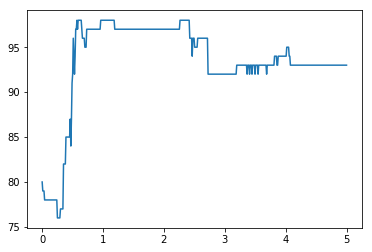

In [24]:
fig11 = plt.figure()
plt.plot(np.linspace(0,5,500),accuracies)
plt.show()

## Question 12

In [29]:
print(max_accuracy)
print(lambda_best)

98
2.41482965932


## Question 13

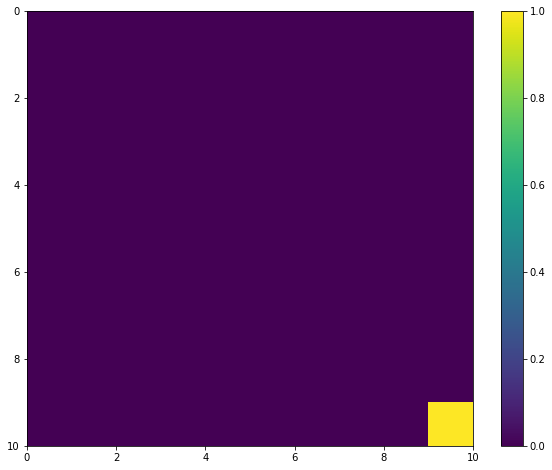

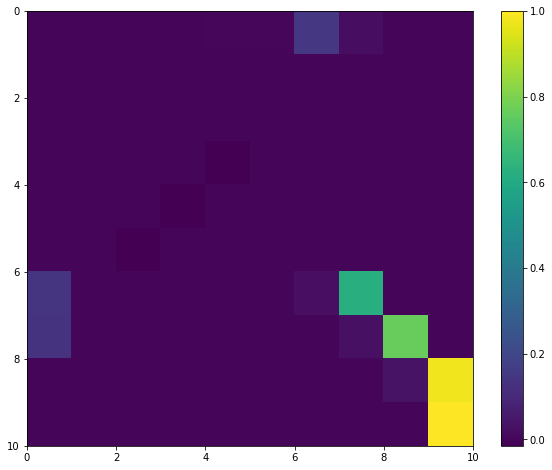

In [30]:
plt_reward(reward_function_1)
plt_reward(R_rec_best)


## Question 14

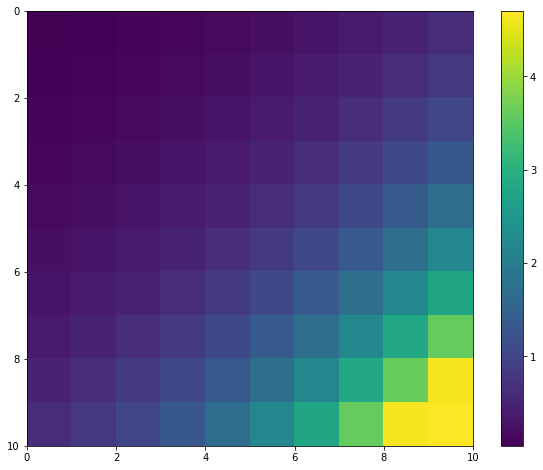

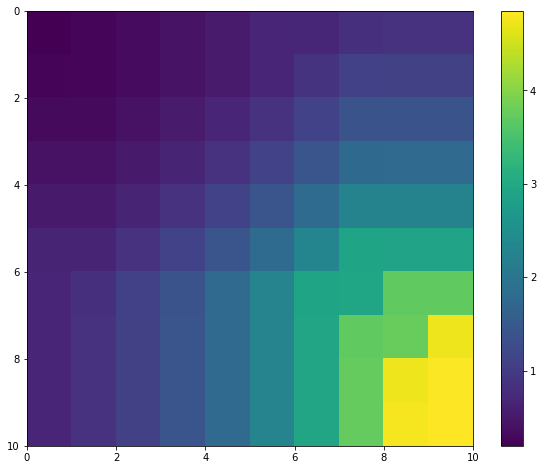

In [31]:
plt_valueHeatMap(Value1)
plt_valueHeatMap(V_rec_best)


## Question 15

## Question 16

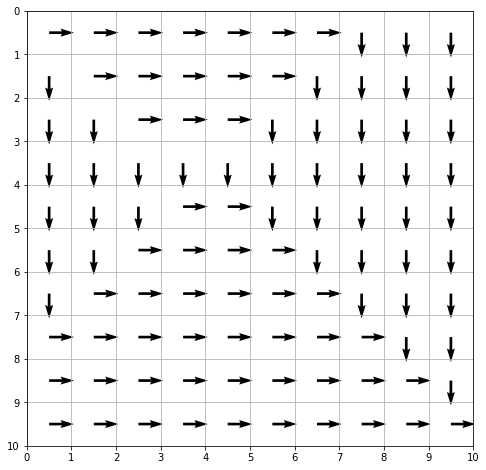

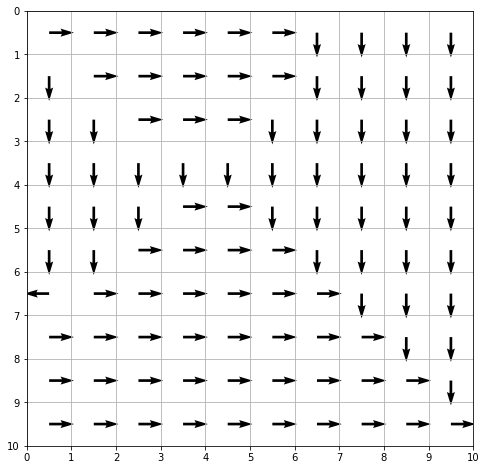

In [32]:
plt_policy(pi)
plt_policy(pi_rec_best)


## Question 17

## Question 18

In [33]:
pi_a_2 = list(pi_2.reshape(100))
P_list = [[],[],[],[]]

for s in range(100):
    cs = [(s//10), (s%10)] #current state
    direction = {1:[cs[0]-1,cs[1]], 2:[cs[0],cs[1]+1], 3:[cs[0]+1,cs[1]], 4:[cs[0],cs[1]-1], 5:[cs[0],cs[1]]}
    a = pi_a_2[s]
    P = list()
    for i in range(1,5):
        P.append((a==i)*(1-w)+w/4)
    P.append(0)
    for i in range(1,5):
        if direction[i][0] not in range(10) or direction[i][1] not in range(10):
            P[4] += P[i-1]
            P[i-1] = 0
    P_list[0].append(P)
    
    A_ = [1,2,3,4]
    A_.remove(pi_a_2[s])
    for j in range(3):
        a = A_[j]
        P = list()
        for i in range(1,5):
            P.append((a==i)*(1-w)+w/4)
        P.append(0)
        for i in range(1,5):
            if direction[i][0] not in range(10) or direction[i][1] not in range(10):
                P[4] += P[i-1]
                P[i-1] = 0
                
        P_list[j+1].append(P)

P_a2 = np.zeros((100,100))
P_a = np.zeros((3,100,100))

P_a2 = transition_prob(P_list[0])
P_a[0] = transition_prob(P_list[1])
P_a[1] = transition_prob(P_list[2])
P_a[2] = transition_prob(P_list[3])


In [47]:
I = np.eye(100,100)
block_matrix = np.zeros((300,100))
for i in range(3):
    block_matrix[100*i:100*(i+1),:] = -np.dot((P_a2 -P_a[i,:,:]),np.matrix(I-gamma*P_a2).I)
# print(block_matrix.shape)

Rmax = 100

# G
G = np.zeros((1000,300))
identity = np.concatenate((np.eye(100),np.eye(100),np.eye(100)),axis=0)
G[0:300,:] = np.concatenate((block_matrix,identity,np.zeros((300,100))),axis=1)
G[300:600,:] = np.concatenate((block_matrix,np.zeros((300,200))),axis=1)
G[600:700,:] = np.concatenate((np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[700:800,:] = np.concatenate((-np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[800:900,:] = np.concatenate((np.eye(100),np.zeros((100,200))),axis=1)
G[900:1000,:] = np.concatenate((-np.eye(100),np.zeros((100,200))),axis=1)

# h
h = np.concatenate((np.zeros((800,1)),Rmax*np.ones((200,1))))



In [48]:
# sweep lambda for largest accuracy
accuracies_2 = []
max_accuracy_2 = 0
R_rec_best_2 = 0
V_rec_best_2 = np.zeros(100)
pi_rec_best_2 = []
for lambda_ in np.linspace(0,5,500):
    # c
    c = np.concatenate((np.zeros(100),np.ones(100),-lambda_*np.ones(100)))
    c = np.matrix(c).T

    G = matrix(G)
    h = matrix(h)
    c = -matrix(c)
    sol = solvers.lp(c,G,h)

    R_rec = np.asarray(sol['x'][:num_state],dtype=np.double).reshape(10,10)
    num_state = 100
    num_action = 4
    w = 0.1
    gamma = 0.8
    A = range(1,1+num_action)
    V = np.zeros(100)
    delta = 100000
    epsilon = 0.01
    while delta > epsilon:
        delta = 0
        for i in range(num_state):
            v = V[i]
            V[i] = V_value(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V)
            delta = max(delta, abs(v-V[i]))

    pi_rec = []
    for i in range(num_state):
        pi_rec.append(pi_policy(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V))
    pi_rec = np.asarray(pi_rec).reshape((10,10))
    
    # Accuracy
    accuracy = sum(sum(pi_rec==pi_2))
    accuracies_2.append(accuracy)
    if accuracy > max_accuracy_2:
        max_accuracy_2 = accuracy
        lambda_best_2 = lambda_
        R_rec_best_2 = R_rec
        V_rec_best_2 = V
        pi_rec_best_2 = pi_rec


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  9.0072e+00 -2.5895e+04  3e+04  2e-02  2e+01  2e+00
 2: -2.3508e+01 -1.1613e+04  1e+04  9e-03  1e+01  3e+00
 3: -2.1797e+02 -6.7499e+03  8e+03  5e-03  6e+00  3e+00
 4: -1.1062e+03 -5.7886e+03  8e+03  3e-03  4e+00  4e+00
 5: -2.8713e+03 -8.1408e+03  1e+04  4e-03  5e+00  6e+00
 6: -2.7473e+03 -7.9293e+03  1e+04  4e-03  5e+00  7e+00
 7: -4.2131e+03 -7.1182e+03  9e+03  2e-03  3e+00  5e+00
 8: -5.2674e+03 -6.8106e+03  6e+03  1e-03  1e+00  3e+00
 9: -5.8029e+03 -6.6182e+03  3e+03  6e-04  8e-01  2e+00
10: -6.1700e+03 -6.5625e+03  2e+03  3e-04  4e-01  1e+00
11: -6.3152e+03 -6.5486e+03  1e+03  2e-04  2e-01  8e-01
12: -6.4663e+03 -6.5339e+03  3e+02  5e-05  7e-02  3e-01
13: -6.4981e+03 -6.5407e+03  2e+02  3e-05  4e-02  2e-01
14: -6.5328e+03 -6.5499e+03  8e+01  1e-05  2e-02  8e-02
15: -6.5491e+03 -6.5544e+03  2e+01  4e-06  5e-03  2e-02
16: -6.5492e+03 -6.5541e+03  2e+01  4e-06  5e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  1.6263e+01 -2.5800e+04  3e+04  2e-02  2e+01  2e+00
 2:  4.8817e-01 -1.1401e+04  1e+04  8e-03  1e+01  3e+00
 3: -1.7099e+02 -6.5720e+03  8e+03  5e-03  6e+00  2e+00
 4: -8.7954e+02 -5.3943e+03  7e+03  3e-03  4e+00  3e+00
 5: -2.5786e+03 -7.7872e+03  1e+04  4e-03  5e+00  6e+00
 6: -2.4492e+03 -7.5572e+03  1e+04  4e-03  5e+00  6e+00
 7: -3.4529e+03 -6.8273e+03  1e+04  2e-03  3e+00  5e+00
 8: -4.6179e+03 -6.3819e+03  6e+03  1e-03  2e+00  3e+00
 9: -5.0922e+03 -6.1255e+03  4e+03  8e-04  1e+00  2e+00
10: -5.3778e+03 -6.0423e+03  3e+03  5e-04  6e-01  2e+00
11: -5.7413e+03 -6.0232e+03  1e+03  2e-04  3e-01  8e-01
12: -5.8800e+03 -6.0194e+03  5e+02  1e-04  1e-01  4e-01
13: -5.9635e+03 -6.0278e+03  3e+02  5e-05  6e-02  2e-01
14: -6.0045e+03 -6.0304e+03  1e+02  2e-05  2e-02  9e-02
15: -6.0197e+03 -6.0319e+03  5e+01  9e-06  1e-02  4e-02
16: -6.0298e+03 -6.0334e+03  1e+01  3e-06  3e-03  

 9: -4.7959e+03 -5.6938e+03  3e+03  7e-04  9e-01  2e+00
10: -5.1364e+03 -5.6361e+03  2e+03  4e-04  5e-01  1e+00
11: -5.4037e+03 -5.5970e+03  7e+02  1e-04  2e-01  6e-01
12: -5.4936e+03 -5.6014e+03  4e+02  8e-05  1e-01  4e-01
13: -5.5696e+03 -5.6101e+03  2e+02  3e-05  4e-02  1e-01
14: -5.5920e+03 -5.6128e+03  8e+01  2e-05  2e-02  8e-02
15: -5.6107e+03 -5.6178e+03  3e+01  5e-06  7e-03  3e-02
16: -5.6167e+03 -5.6191e+03  1e+01  2e-06  2e-03  1e-02
17: -5.6198e+03 -5.6201e+03  9e-01  2e-07  2e-04  9e-04
18: -5.6200e+03 -5.6201e+03  5e-01  1e-07  1e-04  5e-04
19: -5.6201e+03 -5.6201e+03  6e-02  1e-08  1e-05  6e-05
20: -5.6201e+03 -5.6201e+03  9e-04  2e-10  2e-07  9e-07
21: -5.6201e+03 -5.6201e+03  9e-06  2e-12  2e-09  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  2.2909e+01 -2.5704e+04  3e+04  2e-02  2e+01  2e+00
 2:  2.2773e+01 -1.1181e+04  1e+04  8e-03  1e+01  3e+00
 3: -1.2998e+02 -6.4051e+0

 2:  4.0683e+01 -1.0988e+04  1e+04  8e-03  1e+01  3e+00
 3: -9.8768e+01 -6.2659e+03  7e+03  5e-03  6e+00  2e+00
 4: -6.5683e+02 -5.0584e+03  7e+03  3e-03  4e+00  3e+00
 5: -2.1081e+03 -6.9098e+03  1e+04  4e-03  5e+00  5e+00
 6: -2.0279e+03 -6.7228e+03  1e+04  3e-03  4e+00  5e+00
 7: -2.6404e+03 -6.1412e+03  9e+03  3e-03  3e+00  5e+00
 8: -3.9422e+03 -5.3867e+03  5e+03  1e-03  1e+00  3e+00
 9: -4.2845e+03 -5.2832e+03  3e+03  7e-04  9e-01  2e+00
10: -4.7584e+03 -5.1807e+03  2e+03  3e-04  4e-01  1e+00
11: -4.9353e+03 -5.1639e+03  8e+02  2e-04  2e-01  6e-01
12: -5.0931e+03 -5.1580e+03  2e+02  5e-05  6e-02  2e-01
13: -5.1277e+03 -5.1582e+03  1e+02  2e-05  3e-02  9e-02
14: -5.1446e+03 -5.1579e+03  5e+01  1e-05  1e-02  4e-02
15: -5.1569e+03 -5.1586e+03  7e+00  1e-06  2e-03  6e-03
16: -5.1585e+03 -5.1589e+03  2e+00  3e-07  4e-04  2e-03
17: -5.1590e+03 -5.1590e+03  3e-01  6e-08  7e-05  3e-04
18: -5.1590e+03 -5.1590e+03  7e-02  1e-08  2e-05  7e-05
19: -5.1590e+03 -5.1590e+03  2e-03  4e-10  6e-07

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  3.3864e+01 -2.5522e+04  3e+04  2e-02  2e+01  2e+00
 2:  6.0353e+01 -1.0757e+04  1e+04  8e-03  1e+01  3e+00
 3: -6.6162e+01 -6.1072e+03  7e+03  4e-03  6e+00  2e+00
 4: -5.6232e+02 -4.8909e+03  6e+03  3e-03  4e+00  3e+00
 5: -1.8563e+03 -6.3281e+03  1e+04  3e-03  4e+00  5e+00
 6: -1.8885e+03 -6.2644e+03  1e+04  3e-03  4e+00  5e+00
 7: -2.3041e+03 -5.8249e+03  9e+03  3e-03  3e+00  5e+00
 8: -3.4763e+03 -4.9888e+03  5e+03  1e-03  1e+00  3e+00
 9: -3.8424e+03 -4.9191e+03  4e+03  8e-04  1e+00  2e+00
10: -4.2140e+03 -4.7878e+03  2e+03  4e-04  5e-01  1e+00
11: -4.4877e+03 -4.7504e+03  1e+03  2e-04  2e-01  7e-01
12: -4.6236e+03 -4.7391e+03  4e+02  9e-05  1e-01  3e-01
13: -4.6962e+03 -4.7404e+03  2e+02  3e-05  4e-02  1e-01
14: -4.7203e+03 -4.7383e+03  7e+01  1e-05  2e-02  6e-02
15: -4.7349e+03 -4.7401e+03  2e+01  4e-06  5e-03  2e-02
16: -4.7387e+03 -4.7405e+03  7e+00  1e-06  2e-03  

 1:  3.9118e+01 -2.5423e+04  3e+04  2e-02  2e+01  2e+00
 2:  7.8856e+01 -1.0519e+04  1e+04  8e-03  1e+01  3e+00
 3: -3.6987e+01 -5.9525e+03  7e+03  4e-03  5e+00  2e+00
 4: -4.8087e+02 -4.7259e+03  6e+03  3e-03  4e+00  3e+00
 5: -1.6574e+03 -5.8146e+03  9e+03  3e-03  4e+00  4e+00
 6: -1.8012e+03 -5.8522e+03  9e+03  3e-03  4e+00  5e+00
 7: -1.9186e+03 -5.7287e+03  1e+04  3e-03  3e+00  6e+00
 8: -3.0402e+03 -4.6493e+03  5e+03  1e-03  1e+00  3e+00
 9: -3.5433e+03 -4.5393e+03  3e+03  7e-04  9e-01  2e+00
10: -3.9240e+03 -4.3496e+03  1e+03  3e-04  4e-01  1e+00
11: -4.1131e+03 -4.3378e+03  8e+02  2e-04  2e-01  7e-01
12: -4.2354e+03 -4.3320e+03  4e+02  7e-05  9e-02  3e-01
13: -4.3024e+03 -4.3333e+03  1e+02  2e-05  3e-02  1e-01
14: -4.3248e+03 -4.3353e+03  4e+01  8e-06  1e-02  4e-02
15: -4.3341e+03 -4.3361e+03  7e+00  2e-06  2e-03  7e-03
16: -4.3360e+03 -4.3365e+03  2e+00  3e-07  4e-04  2e-03
17: -4.3365e+03 -4.3365e+03  2e-01  4e-08  5e-05  2e-04
18: -4.3365e+03 -4.3365e+03  2e-02  4e-09  5e-06

 2:  9.6149e+01 -1.0327e+04  1e+04  8e-03  9e+00  3e+00
 3: -1.0909e+01 -5.7839e+03  7e+03  4e-03  5e+00  2e+00
 4: -4.1130e+02 -4.5734e+03  6e+03  3e-03  4e+00  3e+00
 5: -1.4945e+03 -5.5533e+03  9e+03  3e-03  4e+00  4e+00
 6: -1.6530e+03 -5.5910e+03  9e+03  3e-03  3e+00  5e+00
 7: -1.6965e+03 -5.4717e+03  1e+04  3e-03  3e+00  6e+00
 8: -2.6774e+03 -4.3607e+03  5e+03  1e-03  1e+00  3e+00
 9: -3.1809e+03 -4.2087e+03  3e+03  8e-04  9e-01  2e+00
10: -3.5927e+03 -4.0210e+03  1e+03  3e-04  4e-01  1e+00
11: -3.7948e+03 -3.9731e+03  6e+02  1e-04  2e-01  5e-01
12: -3.8698e+03 -3.9679e+03  3e+02  7e-05  9e-02  3e-01
13: -3.9215e+03 -3.9636e+03  1e+02  3e-05  4e-02  1e-01
14: -3.9473e+03 -3.9622e+03  5e+01  1e-05  1e-02  5e-02
15: -3.9587e+03 -3.9621e+03  1e+01  3e-06  3e-03  1e-02
16: -3.9611e+03 -3.9624e+03  5e+00  1e-06  1e-03  5e-03
17: -3.9624e+03 -3.9626e+03  7e-01  1e-07  2e-04  7e-04
18: -3.9626e+03 -3.9626e+03  2e-01  4e-08  4e-05  2e-04
19: -3.9627e+03 -3.9627e+03  3e-03  7e-10  8e-07

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  4.8489e+01 -2.5222e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.1124e+02 -1.0413e+04  1e+04  8e-03  9e+00  3e+00
 3:  1.0550e+01 -5.5180e+03  7e+03  4e-03  5e+00  2e+00
 4: -3.4155e+02 -4.5445e+03  6e+03  3e-03  4e+00  3e+00
 5: -1.3506e+03 -5.2700e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.5107e+03 -5.3022e+03  9e+03  3e-03  3e+00  5e+00
 7: -1.5134e+03 -5.1748e+03  9e+03  3e-03  3e+00  6e+00
 8: -2.3854e+03 -4.0677e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.9404e+03 -3.8476e+03  3e+03  7e-04  8e-01  2e+00
10: -3.1860e+03 -3.7381e+03  2e+03  4e-04  5e-01  1e+00
11: -3.3767e+03 -3.6530e+03  9e+02  2e-04  2e-01  7e-01
12: -3.5429e+03 -3.6233e+03  3e+02  6e-05  7e-02  2e-01
13: -3.5967e+03 -3.6237e+03  9e+01  2e-05  2e-02  8e-02
14: -3.6041e+03 -3.6226e+03  6e+01  1e-05  2e-02  6e-02
15: -3.6138e+03 -3.6230e+03  3e+01  7e-06  8e-03  3e-02
16: -3.6224e+03 -3.6237e+03  4e+00  9e-07  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  3e+01  1e+00
 1:  5.2675e+01 -2.5122e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.2508e+02 -1.0485e+04  1e+04  8e-03  9e+00  3e+00
 3:  2.8646e+01 -5.2595e+03  6e+03  4e-03  4e+00  2e+00
 4: -2.7105e+02 -4.5253e+03  6e+03  3e-03  4e+00  3e+00
 5: -1.2269e+03 -4.9114e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.4021e+03 -4.9585e+03  8e+03  3e-03  3e+00  4e+00
 7: -1.3775e+03 -4.8802e+03  9e+03  3e-03  3e+00  6e+00
 8: -2.1096e+03 -3.7608e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.6283e+03 -3.5101e+03  3e+03  7e-04  7e-01  2e+00
10: -2.9117e+03 -3.4014e+03  2e+03  4e-04  4e-01  1e+00
11: -3.1321e+03 -3.3374e+03  7e+02  2e-04  2e-01  5e-01
12: -3.2329e+03 -3.3116e+03  3e+02  6e-05  7e-02  2e-01
13: -3.2840e+03 -3.3078e+03  8e+01  2e-05  2e-02  7e-02
14: -3.2943e+03 -3.3073e+03  4e+01  1e-05  1e-02  4e-02
15: -3.3022e+03 -3.3076e+03  2e+01  4e-06  4e-03  2e-02
16: -3.3071e+03 -3.3077e+03  2e+00  5e-07  6e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.6570e+01 -2.5021e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.3782e+02 -1.0543e+04  1e+04  8e-03  9e+00  3e+00
 3:  4.3866e+01 -5.0082e+03  6e+03  4e-03  4e+00  2e+00
 4: -2.1000e+02 -4.4823e+03  6e+03  3e-03  3e+00  3e+00
 5: -1.1198e+03 -4.5451e+03  7e+03  3e-03  3e+00  4e+00
 6: -1.2937e+03 -4.6031e+03  8e+03  2e-03  3e+00  4e+00
 7: -1.2638e+03 -4.5581e+03  8e+03  2e-03  3e+00  5e+00
 8: -1.8052e+03 -3.5764e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.3737e+03 -3.1777e+03  2e+03  6e-04  7e-01  2e+00
10: -2.6239e+03 -3.1007e+03  1e+03  4e-04  4e-01  1e+00
11: -2.8420e+03 -3.0473e+03  6e+02  2e-04  2e-01  5e-01
12: -2.8945e+03 -3.0253e+03  4e+02  1e-04  1e-01  4e-01
13: -2.9686e+03 -3.0191e+03  2e+02  4e-05  4e-02  1e-01
14: -2.9894e+03 -3.0151e+03  8e+01  2e-05  2e-02  7e-02
15: -3.0031e+03 -3.0132e+03  3e+01  7e-06  8e-03  3e-02
16: -3.0115e+03 -3.0137e+03  7e+00  2e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.0197e+01 -2.4919e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.4957e+02 -1.0588e+04  1e+04  8e-03  8e+00  3e+00
 3:  5.6611e+01 -4.7641e+03  6e+03  4e-03  4e+00  2e+00
 4: -1.5724e+02 -4.4178e+03  6e+03  3e-03  3e+00  3e+00
 5: -1.0241e+03 -4.1812e+03  6e+03  2e-03  2e+00  4e+00
 6: -1.1888e+03 -4.2487e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.1632e+03 -4.2230e+03  8e+03  2e-03  2e+00  5e+00
 8: -1.5598e+03 -3.4058e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.1241e+03 -2.9325e+03  2e+03  6e-04  6e-01  2e+00
10: -2.3945e+03 -2.8396e+03  1e+03  3e-04  4e-01  1e+00
11: -2.5633e+03 -2.7691e+03  6e+02  2e-04  2e-01  5e-01
12: -2.6518e+03 -2.7453e+03  3e+02  7e-05  7e-02  3e-01
13: -2.7079e+03 -2.7387e+03  1e+02  2e-05  2e-02  9e-02
14: -2.7255e+03 -2.7369e+03  4e+01  8e-06  9e-03  3e-02
15: -2.7347e+03 -2.7361e+03  5e+00  1e-06  1e-03  5e-03
16: -2.7360e+03 -2.7362e+03  5e-01  1e-07  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.3578e+01 -2.4818e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.6044e+02 -1.0622e+04  1e+04  8e-03  8e+00  3e+00
 3:  7.2660e+01 -4.6746e+03  5e+03  3e-03  4e+00  2e+00
 4: -1.0641e+02 -4.2673e+03  6e+03  3e-03  3e+00  3e+00
 5: -9.4454e+02 -3.8625e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.0593e+03 -3.9010e+03  6e+03  2e-03  2e+00  4e+00
 7: -1.0549e+03 -3.6997e+03  6e+03  2e-03  2e+00  4e+00
 8: -1.5886e+03 -3.1034e+03  4e+03  1e-03  1e+00  2e+00
 9: -1.9839e+03 -2.7015e+03  2e+03  5e-04  5e-01  1e+00
10: -2.1688e+03 -2.5903e+03  1e+03  3e-04  3e-01  9e-01
11: -2.2907e+03 -2.5456e+03  7e+02  2e-04  2e-01  6e-01
12: -2.4063e+03 -2.5013e+03  3e+02  7e-05  7e-02  2e-01
13: -2.4638e+03 -2.4834e+03  6e+01  1e-05  2e-02  5e-02
14: -2.4756e+03 -2.4825e+03  2e+01  5e-06  5e-03  2e-02
15: -2.4803e+03 -2.4820e+03  5e+00  1e-06  1e-03  5e-03
16: -2.4815e+03 -2.4819e+03  1e+00  3e-07  3e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.6734e+01 -2.4716e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.7052e+02 -1.0644e+04  1e+04  8e-03  8e+00  2e+00
 3:  8.7351e+01 -4.5942e+03  5e+03  3e-03  3e+00  2e+00
 4: -6.1017e+01 -4.1034e+03  6e+03  3e-03  3e+00  3e+00
 5: -8.6733e+02 -3.6020e+03  6e+03  2e-03  2e+00  3e+00
 6: -9.2269e+02 -3.5881e+03  6e+03  2e-03  2e+00  3e+00
 7: -9.3124e+02 -3.4622e+03  6e+03  2e-03  2e+00  3e+00
 8: -1.1415e+03 -3.2560e+03  5e+03  2e-03  2e+00  3e+00
 9: -1.6385e+03 -2.6560e+03  3e+03  8e-04  8e-01  2e+00
10: -1.9184e+03 -2.3907e+03  1e+03  3e-04  3e-01  9e-01
11: -2.0403e+03 -2.3159e+03  8e+02  2e-04  2e-01  6e-01
12: -2.1499e+03 -2.2659e+03  3e+02  9e-05  9e-02  3e-01
13: -2.1819e+03 -2.2595e+03  2e+02  6e-05  6e-02  2e-01
14: -2.2239e+03 -2.2480e+03  7e+01  2e-05  2e-02  6e-02
15: -2.2362e+03 -2.2467e+03  3e+01  8e-06  8e-03  3e-02
16: -2.2390e+03 -2.2458e+03  2e+01  5e-06  5e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.9681e+01 -2.4614e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.7988e+02 -1.0657e+04  1e+04  8e-03  8e+00  2e+00
 3:  1.0072e+02 -4.5180e+03  5e+03  3e-03  3e+00  2e+00
 4: -1.4402e+01 -3.9591e+03  5e+03  3e-03  3e+00  2e+00
 5: -7.7453e+02 -3.2730e+03  5e+03  2e-03  2e+00  3e+00
 6: -8.5939e+02 -3.2660e+03  5e+03  2e-03  2e+00  3e+00
 7: -8.3462e+02 -3.3269e+03  6e+03  2e-03  2e+00  4e+00
 8: -1.0736e+03 -2.8933e+03  4e+03  1e-03  1e+00  3e+00
 9: -1.6223e+03 -2.3548e+03  2e+03  5e-04  5e-01  1e+00
10: -1.8270e+03 -2.1659e+03  9e+02  3e-04  2e-01  6e-01
11: -1.9506e+03 -2.0687e+03  3e+02  9e-05  8e-02  3e-01
12: -1.9792e+03 -2.0597e+03  2e+02  6e-05  6e-02  2e-01
13: -2.0199e+03 -2.0460e+03  7e+01  2e-05  2e-02  6e-02
14: -2.0324e+03 -2.0423e+03  3e+01  7e-06  7e-03  3e-02
15: -2.0381e+03 -2.0414e+03  9e+00  2e-06  2e-03  9e-03
16: -2.0401e+03 -2.0410e+03  2e+00  7e-07  6e-04  

 1:  7.2436e+01 -2.4513e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.8860e+02 -1.0660e+04  1e+04  8e-03  7e+00  2e+00
 3:  1.1291e+02 -4.4454e+03  5e+03  3e-03  3e+00  2e+00
 4:  2.7735e+01 -3.8365e+03  5e+03  3e-03  3e+00  2e+00
 5: -5.8984e+02 -3.0026e+03  5e+03  2e-03  2e+00  3e+00
 6: -8.6548e+02 -3.1722e+03  5e+03  2e-03  2e+00  3e+00
 7: -8.1256e+02 -3.2103e+03  6e+03  2e-03  2e+00  4e+00
 8: -8.1807e+02 -2.8746e+03  5e+03  2e-03  1e+00  3e+00
 9: -1.3336e+03 -2.3717e+03  3e+03  8e-04  7e-01  2e+00
10: -1.5642e+03 -2.0435e+03  1e+03  4e-04  3e-01  1e+00
11: -1.7578e+03 -1.9144e+03  4e+02  1e-04  1e-01  4e-01
12: -1.8592e+03 -1.8928e+03  9e+01  2e-05  2e-02  8e-02
13: -1.8728e+03 -1.8884e+03  4e+01  1e-05  1e-02  4e-02
14: -1.8827e+03 -1.8866e+03  1e+01  3e-06  3e-03  1e-02
15: -1.8853e+03 -1.8860e+03  2e+00  6e-07  5e-04  2e-03
16: -1.8857e+03 -1.8859e+03  5e-01  1e-07  1e-04  5e-04
17: -1.8859e+03 -1.8859e+03  4e-02  1e-08  1e-05  4e-05
18: -1.8859e+03 -1.8859e+03  3e-03  8e-10  8e-07

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.5386e+01 -2.4408e+04  3e+04  2e-02  2e+01  2e+00
 2:  1.9799e+02 -1.0657e+04  1e+04  8e-03  7e+00  2e+00
 3:  1.2565e+02 -4.3670e+03  5e+03  3e-03  3e+00  2e+00
 4:  6.3874e+01 -3.6826e+03  5e+03  3e-03  2e+00  2e+00
 5: -4.3663e+02 -2.7675e+03  4e+03  2e-03  2e+00  3e+00
 6: -8.0552e+02 -2.9847e+03  5e+03  2e-03  1e+00  3e+00
 7: -6.7937e+02 -2.7178e+03  5e+03  2e-03  1e+00  3e+00
 8: -9.6939e+02 -2.4479e+03  4e+03  1e-03  1e+00  2e+00
 9: -1.2314e+03 -2.0922e+03  2e+03  6e-04  6e-01  2e+00
10: -1.4943e+03 -1.8554e+03  9e+02  3e-04  2e-01  7e-01
11: -1.6436e+03 -1.7797e+03  3e+02  1e-04  9e-02  3e-01
12: -1.6965e+03 -1.7468e+03  1e+02  4e-05  3e-02  1e-01
13: -1.7234e+03 -1.7409e+03  4e+01  1e-05  1e-02  4e-02
14: -1.7322e+03 -1.7391e+03  2e+01  5e-06  5e-03  2e-02
15: -1.7370e+03 -1.7381e+03  3e+00  8e-07  7e-04  3e-03
16: -1.7377e+03 -1.7379e+03  5e-01  1e-07  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.7974e+01 -2.4418e+04  3e+04  2e-02  2e+01  2e+00
 2:  2.0703e+02 -1.0684e+04  1e+04  8e-03  7e+00  2e+00
 3:  1.3661e+02 -4.3069e+03  5e+03  3e-03  3e+00  1e+00
 4:  8.8351e+01 -3.5363e+03  5e+03  3e-03  2e+00  2e+00
 5: -3.3256e+02 -2.6033e+03  4e+03  2e-03  1e+00  2e+00
 6: -7.3320e+02 -2.8338e+03  4e+03  2e-03  1e+00  3e+00
 7: -6.3334e+02 -2.6275e+03  4e+03  1e-03  1e+00  3e+00
 8: -6.2819e+02 -2.5380e+03  4e+03  1e-03  1e+00  3e+00
 9: -9.4385e+02 -2.2257e+03  3e+03  9e-04  8e-01  2e+00
10: -1.1067e+03 -1.8426e+03  2e+03  5e-04  5e-01  2e+00
11: -1.3580e+03 -1.7043e+03  9e+02  3e-04  2e-01  7e-01
12: -1.4928e+03 -1.6460e+03  4e+02  1e-04  1e-01  3e-01
13: -1.5624e+03 -1.6213e+03  1e+02  4e-05  4e-02  1e-01
14: -1.5957e+03 -1.6140e+03  5e+01  1e-05  1e-02  4e-02
15: -1.6043e+03 -1.6114e+03  2e+01  5e-06  5e-03  2e-02
16: -1.6092e+03 -1.6105e+03  3e+00  9e-07  8e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.0431e+01 -2.4427e+04  3e+04  2e-02  2e+01  2e+00
 2:  2.1568e+02 -1.0703e+04  1e+04  8e-03  7e+00  2e+00
 3:  1.4678e+02 -4.2490e+03  5e+03  3e-03  3e+00  1e+00
 4:  1.0737e+02 -3.3802e+03  4e+03  3e-03  2e+00  2e+00
 5: -2.4676e+02 -2.4658e+03  4e+03  2e-03  1e+00  2e+00
 6: -6.4920e+02 -2.7085e+03  4e+03  2e-03  1e+00  3e+00
 7: -5.1005e+02 -2.4167e+03  4e+03  1e-03  1e+00  2e+00
 8: -5.1699e+02 -2.3334e+03  4e+03  1e-03  1e+00  3e+00
 9: -7.4408e+02 -2.1348e+03  3e+03  1e-03  9e-01  2e+00
10: -1.0731e+03 -1.6234e+03  1e+03  4e-04  3e-01  1e+00
11: -1.3204e+03 -1.5252e+03  5e+02  2e-04  1e-01  5e-01
12: -1.4215e+03 -1.4975e+03  2e+02  6e-05  5e-02  2e-01
13: -1.4595e+03 -1.4897e+03  7e+01  2e-05  2e-02  7e-02
14: -1.4772e+03 -1.4849e+03  2e+01  6e-06  5e-03  2e-02
15: -1.4795e+03 -1.4841e+03  1e+01  3e-06  3e-03  1e-02
16: -1.4823e+03 -1.4833e+03  3e+00  7e-07  6e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.2766e+01 -2.4434e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.2397e+02 -1.0715e+04  1e+04  8e-03  7e+00  2e+00
 3:  1.5623e+02 -4.1929e+03  5e+03  3e-03  3e+00  1e+00
 4:  1.2181e+02 -3.2132e+03  4e+03  2e-03  2e+00  2e+00
 5: -1.7547e+02 -2.3458e+03  4e+03  2e-03  1e+00  2e+00
 6: -5.6911e+02 -2.5827e+03  4e+03  1e-03  1e+00  2e+00
 7: -4.5174e+02 -2.3261e+03  4e+03  1e-03  1e+00  2e+00
 8: -5.3495e+02 -2.1915e+03  3e+03  1e-03  1e+00  2e+00
 9: -5.3630e+02 -2.1153e+03  4e+03  1e-03  9e-01  2e+00
10: -6.4864e+02 -1.8139e+03  3e+03  9e-04  7e-01  2e+00
11: -1.1296e+03 -1.4809e+03  8e+02  3e-04  2e-01  7e-01
12: -1.2469e+03 -1.4108e+03  4e+02  1e-04  1e-01  3e-01
13: -1.3371e+03 -1.3721e+03  9e+01  3e-05  2e-02  8e-02
14: -1.3525e+03 -1.3662e+03  3e+01  1e-05  8e-03  3e-02
15: -1.3593e+03 -1.3637e+03  1e+01  3e-06  3e-03  1e-02
16: -1.3615e+03 -1.3629e+03  3e+00  1e-06  8e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.4990e+01 -2.4439e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.3193e+02 -1.0719e+04  1e+04  8e-03  6e+00  2e+00
 3:  1.6502e+02 -4.1383e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3224e+02 -3.0340e+03  4e+03  2e-03  2e+00  2e+00
 5: -1.1641e+02 -2.2351e+03  3e+03  2e-03  1e+00  2e+00
 6: -5.0427e+02 -2.4325e+03  4e+03  1e-03  1e+00  2e+00
 7: -4.0197e+02 -2.1993e+03  4e+03  1e-03  1e+00  2e+00
 8: -5.2961e+02 -1.9861e+03  3e+03  1e-03  8e-01  2e+00
 9: -4.7956e+02 -1.9587e+03  3e+03  1e-03  9e-01  2e+00
10: -5.6908e+02 -1.6947e+03  3e+03  8e-04  6e-01  2e+00
11: -1.0314e+03 -1.3484e+03  8e+02  2e-04  2e-01  6e-01
12: -1.1170e+03 -1.3067e+03  5e+02  1e-04  1e-01  4e-01
13: -1.2037e+03 -1.2641e+03  1e+02  4e-05  3e-02  1e-01
14: -1.2321e+03 -1.2498e+03  4e+01  1e-05  1e-02  4e-02
15: -1.2385e+03 -1.2468e+03  2e+01  6e-06  5e-03  2e-02
16: -1.2422e+03 -1.2454e+03  8e+00  2e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7109e+01 -2.4442e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.3959e+02 -1.0716e+04  1e+04  8e-03  6e+00  2e+00
 3:  1.7319e+02 -4.0850e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3903e+02 -2.8411e+03  4e+03  2e-03  2e+00  2e+00
 5: -6.8319e+01 -2.1261e+03  3e+03  2e-03  1e+00  2e+00
 6: -4.5145e+02 -2.2583e+03  4e+03  1e-03  1e+00  2e+00
 7: -3.5779e+02 -2.0373e+03  3e+03  1e-03  9e-01  2e+00
 8: -5.1465e+02 -1.7690e+03  3e+03  9e-04  7e-01  2e+00
 9: -4.5941e+02 -1.7577e+03  3e+03  1e-03  7e-01  2e+00
10: -5.4074e+02 -1.5176e+03  2e+03  7e-04  5e-01  2e+00
11: -8.8383e+02 -1.2560e+03  9e+02  3e-04  2e-01  7e-01
12: -1.0318e+03 -1.1728e+03  3e+02  1e-04  8e-02  3e-01
13: -1.0888e+03 -1.1464e+03  1e+02  4e-05  3e-02  1e-01
14: -1.1047e+03 -1.1379e+03  8e+01  2e-05  2e-02  7e-02
15: -1.1220e+03 -1.1309e+03  2e+01  7e-06  5e-03  2e-02
16: -1.1261e+03 -1.1290e+03  7e+00  2e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.9131e+01 -2.4444e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.4698e+02 -1.0707e+04  1e+04  8e-03  6e+00  2e+00
 3:  1.8124e+02 -4.0764e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.4150e+02 -2.6432e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.8754e+01 -2.0062e+03  3e+03  1e-03  1e+00  2e+00
 6: -3.9854e+02 -2.0810e+03  3e+03  1e-03  9e-01  2e+00
 7: -3.1071e+02 -1.8657e+03  3e+03  1e-03  8e-01  2e+00
 8: -4.5940e+02 -1.6174e+03  2e+03  9e-04  6e-01  1e+00
 9: -4.9876e+02 -1.5339e+03  2e+03  8e-04  6e-01  1e+00
10: -5.2677e+02 -1.4506e+03  2e+03  7e-04  5e-01  1e+00
11: -5.6707e+02 -1.2671e+03  2e+03  5e-04  4e-01  1e+00
12: -6.7299e+02 -1.2005e+03  1e+03  4e-04  3e-01  1e+00
13: -7.4242e+02 -1.1363e+03  9e+02  3e-04  2e-01  8e-01
14: -9.2646e+02 -1.0586e+03  3e+02  1e-04  7e-02  3e-01
15: -9.8481e+02 -1.0333e+03  1e+02  4e-05  3e-02  1e-01
16: -9.9836e+02 -1.0285e+03  7e+01  2e-05  2e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.0793e+01 -2.4445e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.5310e+02 -1.0695e+04  1e+04  8e-03  6e+00  2e+00
 3:  1.8767e+02 -4.0643e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.4121e+02 -2.4733e+03  3e+03  2e-03  1e+00  1e+00
 5: -2.5218e+00 -1.8935e+03  3e+03  1e-03  1e+00  2e+00
 6: -3.5468e+02 -1.9251e+03  3e+03  1e-03  8e-01  2e+00
 7: -2.7105e+02 -1.7135e+03  3e+03  1e-03  8e-01  2e+00
 8: -3.9736e+02 -1.5187e+03  2e+03  8e-04  6e-01  1e+00
 9: -5.1455e+02 -1.3454e+03  2e+03  6e-04  4e-01  1e+00
10: -4.8293e+02 -1.3193e+03  2e+03  6e-04  4e-01  1e+00
11: -5.4185e+02 -1.1322e+03  1e+03  4e-04  3e-01  1e+00
12: -5.9357e+02 -1.0984e+03  1e+03  4e-04  3e-01  1e+00
13: -6.4693e+02 -1.0507e+03  9e+02  3e-04  2e-01  9e-01
14: -8.1986e+02 -9.8183e+02  4e+02  1e-04  9e-02  4e-01
15: -8.9734e+02 -9.4781e+02  1e+02  4e-05  3e-02  1e-01
16: -9.1390e+02 -9.4290e+02  7e+01  2e-05  2e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.2392e+01 -2.4445e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.5905e+02 -1.0678e+04  1e+04  8e-03  6e+00  2e+00
 3:  1.9368e+02 -4.0466e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3896e+02 -2.3017e+03  3e+03  2e-03  1e+00  1e+00
 5:  1.9585e+01 -1.7816e+03  3e+03  1e-03  9e-01  2e+00
 6: -3.1265e+02 -1.7703e+03  3e+03  1e-03  7e-01  2e+00
 7: -2.3452e+02 -1.5660e+03  3e+03  1e-03  7e-01  2e+00
 8: -3.3036e+02 -1.4249e+03  2e+03  8e-04  6e-01  1e+00
 9: -4.4794e+02 -1.2464e+03  2e+03  6e-04  4e-01  1e+00
10: -5.2978e+02 -1.1414e+03  1e+03  5e-04  3e-01  9e-01
11: -5.2168e+02 -1.1043e+03  1e+03  4e-04  3e-01  9e-01
12: -6.1024e+02 -9.5371e+02  8e+02  3e-04  2e-01  7e-01
13: -7.7567e+02 -8.7921e+02  2e+02  8e-05  5e-02  2e-01
14: -8.2453e+02 -8.6162e+02  9e+01  3e-05  2e-02  8e-02
15: -8.3203e+02 -8.5676e+02  6e+01  2e-05  1e-02  6e-02
16: -8.4568e+02 -8.5341e+02  2e+01  6e-06  4e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  9.4184e+01 -2.4444e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.6579e+02 -1.0653e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.0019e+02 -4.0191e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3639e+02 -2.1639e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.2443e+01 -1.6270e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.7097e+02 -1.5818e+03  3e+03  1e-03  6e-01  2e+00
 7: -2.0081e+02 -1.3910e+03  2e+03  9e-04  6e-01  1e+00
 8: -2.6842e+02 -1.2978e+03  2e+03  8e-04  5e-01  1e+00
 9: -3.8441e+02 -1.1253e+03  1e+03  5e-04  4e-01  1e+00
10: -5.1629e+02 -9.5230e+02  9e+02  3e-04  2e-01  7e-01
11: -5.6498e+02 -8.8620e+02  7e+02  2e-04  2e-01  5e-01
12: -5.8829e+02 -8.5490e+02  6e+02  2e-04  1e-01  5e-01
13: -6.8529e+02 -7.8566e+02  2e+02  7e-05  5e-02  2e-01
14: -7.2334e+02 -7.7080e+02  1e+02  4e-05  2e-02  1e-01
15: -7.3568e+02 -7.6042e+02  6e+01  2e-05  1e-02  6e-02
16: -7.5056e+02 -7.5685e+02  1e+01  5e-06  3e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  9.5660e+01 -2.4442e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.7139e+02 -1.0629e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.0538e+02 -3.9900e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3793e+02 -2.1008e+03  3e+03  2e-03  1e+00  1e+00
 5:  6.1650e+01 -1.5042e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.4324e+02 -1.3975e+03  2e+03  9e-04  6e-01  1e+00
 7: -1.8088e+02 -1.2247e+03  2e+03  8e-04  5e-01  1e+00
 8: -2.8082e+02 -1.1165e+03  2e+03  6e-04  4e-01  1e+00
 9: -3.2988e+02 -1.0132e+03  1e+03  5e-04  3e-01  9e-01
10: -4.6877e+02 -8.4374e+02  8e+02  3e-04  2e-01  6e-01
11: -5.8847e+02 -7.1145e+02  3e+02  9e-05  6e-02  2e-01
12: -5.9346e+02 -7.0493e+02  2e+02  8e-05  5e-02  2e-01
13: -6.3764e+02 -6.8888e+02  1e+02  4e-05  2e-02  1e-01
14: -6.5849e+02 -6.8013e+02  5e+01  2e-05  1e-02  5e-02
15: -6.6579e+02 -6.7627e+02  2e+01  8e-06  5e-03  2e-02
16: -6.7085e+02 -6.7462e+02  9e+00  3e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  9.7317e+01 -2.4439e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.7775e+02 -1.0595e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.1098e+02 -3.9498e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.3991e+02 -2.0337e+03  3e+03  2e-03  1e+00  1e+00
 5:  7.8172e+01 -1.3890e+03  2e+03  1e-03  7e-01  1e+00
 6: -1.5675e+02 -1.1926e+03  2e+03  8e-04  5e-01  1e+00
 7: -2.0994e+02 -1.1894e+03  2e+03  7e-04  5e-01  1e+00
 8: -2.4554e+02 -9.8135e+02  1e+03  5e-04  3e-01  1e+00
 9: -3.3574e+02 -7.9025e+02  1e+03  3e-04  2e-01  8e-01
10: -4.4951e+02 -6.8530e+02  5e+02  2e-04  1e-01  4e-01
11: -5.2477e+02 -6.2607e+02  2e+02  7e-05  5e-02  2e-01
12: -5.7006e+02 -5.9943e+02  6e+01  2e-05  1e-02  6e-02
13: -5.8213e+02 -5.9396e+02  3e+01  9e-06  6e-03  2e-02
14: -5.8598e+02 -5.9226e+02  1e+01  5e-06  3e-03  1e-02
15: -5.8873e+02 -5.9107e+02  5e+00  2e-06  1e-03  5e-03
16: -5.8990e+02 -5.9058e+02  1e+00  5e-07  3e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  9.8907e+01 -2.4435e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.8393e+02 -1.0557e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.1613e+02 -3.9029e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.4251e+02 -1.9707e+03  2e+03  2e-03  1e+00  1e+00
 5:  8.7282e+01 -1.2730e+03  2e+03  1e-03  6e-01  9e-01
 6: -7.0701e+01 -1.0414e+03  2e+03  7e-04  4e-01  1e+00
 7: -1.9793e+02 -1.1057e+03  2e+03  7e-04  4e-01  1e+00
 8: -1.1570e+02 -8.9241e+02  1e+03  6e-04  4e-01  1e+00
 9: -3.0102e+02 -7.1136e+02  8e+02  3e-04  2e-01  6e-01
10: -3.5833e+02 -6.3318e+02  6e+02  2e-04  1e-01  4e-01
11: -4.3764e+02 -5.6192e+02  3e+02  9e-05  6e-02  2e-01
12: -4.7893e+02 -5.2936e+02  1e+02  4e-05  2e-02  9e-02
13: -5.0042e+02 -5.1355e+02  3e+01  1e-05  6e-03  2e-02
14: -5.0459e+02 -5.1053e+02  1e+01  4e-06  3e-03  1e-02
15: -5.0725e+02 -5.0927e+02  4e+00  1e-06  9e-04  4e-03
16: -5.0803e+02 -5.0892e+02  2e+00  7e-07  4e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0043e+02 -2.4430e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.8993e+02 -1.0515e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.2085e+02 -3.8497e+03  5e+03  3e-03  2e+00  1e+00
 4:  1.4543e+02 -1.9076e+03  2e+03  2e-03  9e-01  9e-01
 5:  9.0879e+01 -1.1500e+03  2e+03  9e-04  5e-01  8e-01
 6: -1.9100e+01 -9.0757e+02  1e+03  7e-04  4e-01  9e-01
 7: -1.6303e+02 -9.8249e+02  2e+03  6e-04  4e-01  1e+00
 8: -9.4821e+01 -8.0749e+02  1e+03  5e-04  3e-01  9e-01
 9: -3.3669e+02 -5.7785e+02  5e+02  2e-04  1e-01  3e-01
10: -4.0440e+02 -4.6759e+02  1e+02  5e-05  3e-02  9e-02
11: -4.0567e+02 -4.5140e+02  9e+01  3e-05  2e-02  8e-02
12: -4.2198e+02 -4.3663e+02  3e+01  1e-05  6e-03  3e-02
13: -4.2505e+02 -4.3395e+02  2e+01  7e-06  4e-03  2e-02
14: -4.2824e+02 -4.3155e+02  7e+00  2e-06  1e-03  6e-03
15: -4.2961e+02 -4.3055e+02  2e+00  7e-07  4e-04  2e-03
16: -4.3008e+02 -4.3025e+02  3e-01  1e-07  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0211e+02 -2.4423e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.9659e+02 -1.0461e+04  1e+04  8e-03  5e+00  2e+00
 3:  2.2574e+02 -3.7812e+03  4e+03  3e-03  2e+00  1e+00
 4:  1.5626e+02 -1.8440e+03  2e+03  1e-03  9e-01  9e-01
 5:  9.2949e+01 -1.0079e+03  1e+03  8e-04  5e-01  7e-01
 6:  1.9622e+01 -7.7254e+02  1e+03  6e-04  3e-01  7e-01
 7: -1.1292e+02 -8.3571e+02  1e+03  5e-04  3e-01  9e-01
 8: -6.4124e+01 -6.9267e+02  1e+03  5e-04  3e-01  7e-01
 9: -2.6202e+02 -5.0986e+02  5e+02  2e-04  1e-01  3e-01
10: -3.3238e+02 -3.9213e+02  1e+02  4e-05  3e-02  8e-02
11: -3.3855e+02 -3.6703e+02  6e+01  2e-05  1e-02  5e-02
12: -3.4919e+02 -3.6025e+02  2e+01  8e-06  5e-03  2e-02
13: -3.5362e+02 -3.5732e+02  7e+00  3e-06  2e-03  7e-03
14: -3.5519e+02 -3.5644e+02  2e+00  9e-07  5e-04  2e-03
15: -3.5568e+02 -3.5616e+02  1e+00  4e-07  2e-04  1e-03
16: -3.5588e+02 -3.5604e+02  3e-01  1e-07  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0371e+02 -2.4416e+04  3e+04  2e-02  1e+01  2e+00
 2:  3.0305e+02 -1.0403e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3010e+02 -3.7050e+03  4e+03  3e-03  2e+00  1e+00
 4:  1.6866e+02 -1.7707e+03  2e+03  1e-03  8e-01  9e-01
 5:  9.0489e+01 -8.5371e+02  1e+03  7e-04  4e-01  6e-01
 6:  3.9151e+01 -6.3638e+02  1e+03  5e-04  3e-01  6e-01
 7: -6.9091e+01 -6.6743e+02  1e+03  4e-04  2e-01  8e-01
 8: -3.5250e+01 -5.4971e+02  9e+02  4e-04  2e-01  6e-01
 9: -2.0076e+02 -4.0859e+02  4e+02  2e-04  9e-02  3e-01
10: -2.6107e+02 -3.1318e+02  1e+02  4e-05  2e-02  7e-02
11: -2.7468e+02 -2.8855e+02  3e+01  1e-05  6e-03  2e-02
12: -2.7786e+02 -2.8596e+02  2e+01  6e-06  3e-03  2e-02
13: -2.8086e+02 -2.8385e+02  6e+00  2e-06  1e-03  6e-03
14: -2.8199e+02 -2.8307e+02  2e+00  8e-07  5e-04  2e-03
15: -2.8244e+02 -2.8279e+02  7e-01  3e-07  1e-04  7e-04
16: -2.8257e+02 -2.8271e+02  3e-01  1e-07  6e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0525e+02 -2.4407e+04  3e+04  2e-02  1e+01  2e+00
 2:  3.0933e+02 -1.0340e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3395e+02 -3.6211e+03  4e+03  3e-03  2e+00  1e+00
 4:  1.8009e+02 -1.6785e+03  2e+03  1e-03  7e-01  9e-01
 5:  8.8044e+01 -6.9041e+02  9e+02  6e-04  3e-01  5e-01
 6:  4.8251e+01 -4.9115e+02  7e+02  4e-04  2e-01  5e-01
 7: -3.5339e+01 -4.8373e+02  9e+02  3e-04  2e-01  6e-01
 8: -1.3847e+01 -3.8954e+02  6e+02  3e-04  2e-01  4e-01
 9: -1.4855e+02 -2.9233e+02  3e+02  1e-04  6e-02  2e-01
10: -1.9267e+02 -2.2949e+02  7e+01  3e-05  1e-02  6e-02
11: -2.0565e+02 -2.1321e+02  1e+01  6e-06  3e-03  1e-02
12: -2.0656e+02 -2.1180e+02  1e+01  4e-06  2e-03  9e-03
13: -2.0913e+02 -2.0984e+02  1e+00  5e-07  3e-04  1e-03
14: -2.0944e+02 -2.0961e+02  3e-01  1e-07  7e-05  3e-04
15: -2.0952e+02 -2.0956e+02  9e-02  3e-08  2e-05  9e-05
16: -2.0954e+02 -2.0954e+02  2e-03  7e-10  4e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0672e+02 -2.4398e+04  3e+04  2e-02  1e+01  2e+00
 2:  3.1382e+02 -1.0383e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3429e+02 -3.5298e+03  4e+03  3e-03  1e+00  1e+00
 4:  1.8928e+02 -1.5689e+03  2e+03  1e-03  7e-01  9e-01
 5:  8.5357e+01 -5.3683e+02  7e+02  5e-04  2e-01  4e-01
 6:  4.9955e+01 -3.3940e+02  5e+02  3e-04  2e-01  4e-01
 7: -1.1268e+01 -2.9645e+02  6e+02  2e-04  1e-01  4e-01
 8: -5.6871e+00 -2.3133e+02  4e+02  2e-04  9e-02  3e-01
 9: -1.0478e+02 -1.7195e+02  1e+02  5e-05  3e-02  1e-01
10: -1.2556e+02 -1.4766e+02  4e+01  2e-05  9e-03  4e-02
11: -1.3448e+02 -1.4099e+02  1e+01  5e-06  3e-03  1e-02
12: -1.3761e+02 -1.3882e+02  2e+00  9e-07  5e-04  2e-03
13: -1.3815e+02 -1.3853e+02  7e-01  3e-07  1e-04  7e-04
14: -1.3830e+02 -1.3844e+02  3e-01  1e-07  5e-05  3e-04
15: -1.3838e+02 -1.3839e+02  2e-02  6e-09  3e-06  2e-05
16: -1.3839e+02 -1.3839e+02  1e-03  4e-10  2e-07  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0796e+02 -2.4389e+04  3e+04  2e-02  9e+00  2e+00
 2:  3.1698e+02 -1.0455e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3320e+02 -3.4485e+03  4e+03  3e-03  1e+00  1e+00
 4:  1.9600e+02 -1.4533e+03  2e+03  1e-03  6e-01  9e-01
 5:  9.0651e+01 -4.9164e+02  7e+02  4e-04  2e-01  4e-01
 6:  5.0801e+01 -2.5428e+02  4e+02  2e-04  1e-01  3e-01
 7:  2.2723e+01 -1.6464e+02  3e+02  1e-04  7e-02  2e-01
 8: -9.8172e+00 -1.6622e+02  3e+02  1e-04  6e-02  2e-01
 9: -2.6288e+00 -1.2997e+02  2e+02  9e-05  5e-02  2e-01
10: -4.9000e+01 -1.0462e+02  1e+02  4e-05  2e-02  9e-02
11: -6.9586e+01 -8.5865e+01  3e+01  1e-05  6e-03  3e-02
12: -7.2074e+01 -8.3868e+01  2e+01  9e-06  4e-03  2e-02
13: -7.7168e+01 -8.0969e+01  8e+00  3e-06  1e-03  7e-03
14: -7.9066e+01 -7.9856e+01  2e+00  6e-07  3e-04  2e-03
15: -7.9456e+01 -7.9638e+01  4e-01  1e-07  7e-05  4e-04
16: -7.9567e+01 -7.9579e+01  2e-02  8e-09  4e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0932e+02 -2.4378e+04  3e+04  2e-02  9e+00  2e+00
 2:  3.2043e+02 -1.0531e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3171e+02 -3.3550e+03  4e+03  3e-03  1e+00  1e+00
 4:  2.0269e+02 -1.2896e+03  2e+03  1e-03  5e-01  8e-01
 5:  9.6796e+01 -4.3663e+02  6e+02  4e-04  2e-01  4e-01
 6:  4.8169e+01 -1.7666e+02  3e+02  2e-04  8e-02  2e-01
 7:  2.4649e+01 -6.6789e+01  1e+02  7e-05  3e-02  1e-01
 8:  1.0545e+01 -3.4616e+01  6e+01  3e-05  2e-02  6e-02
 9:  7.4654e+00 -3.0000e+01  7e+01  3e-05  1e-02  6e-02
10:  3.6413e+00 -2.8660e+01  6e+01  2e-05  1e-02  5e-02
11:  1.3899e+00 -2.0215e+01  4e+01  2e-05  8e-03  4e-02
12: -9.4925e+00 -1.4510e+01  1e+01  4e-06  2e-03  9e-03
13: -1.1949e+01 -1.3297e+01  3e+00  1e-06  5e-04  3e-03
14: -1.2696e+01 -1.2913e+01  4e-01  2e-07  8e-05  4e-04
15: -1.2817e+01 -1.2848e+01  6e-02  2e-08  1e-05  6e-05
16: -1.2837e+01 -1.2837e+01  7e-04  2e-10  1e-07  

 7:  1.3979e+01 -2.1013e+01  4e+01  3e-05  1e-02  3e-02
 8:  1.5364e+00 -8.6673e-01  2e+00  2e-06  9e-04  2e-03
 9:  2.0090e-02 -8.9050e-03  3e-02  2e-08  1e-05  3e-05
10:  2.0087e-04 -8.9034e-05  3e-04  2e-10  1e-07  3e-07
11:  2.0087e-06 -8.9034e-07  3e-06  2e-12  1e-09  3e-09
12:  2.0087e-08 -8.9034e-09  3e-08  2e-14  1e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1095e+02 -2.4364e+04  3e+04  2e-02  9e+00  2e+00
 2:  3.2452e+02 -1.0616e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.2950e+02 -3.2372e+03  4e+03  3e-03  1e+00  1e+00
 4:  2.1039e+02 -1.1078e+03  2e+03  1e-03  5e-01  8e-01
 5:  9.8234e+01 -3.5972e+02  5e+02  3e-04  2e-01  3e-01
 6:  3.9004e+01 -9.6505e+01  2e+02  1e-04  5e-02  1e-01
 7:  1.2885e+01 -1.8261e+01  3e+01  2e-05  1e-02  3e-02
 8:  9.4636e-01 -2.9741e-01  1e+00  9e-07  4e-04  1e-03
 9:  9.5839e-03 -2.9856e-03  1e-02  9e-09  4e-06  1e-05
10:  9.5830e-05 -2.9853e-0

 7:  2.0451e+00 -1.5633e+00  4e+00  3e-06  1e-03  3e-03
 8:  2.0768e-02 -1.5542e-02  4e-02  3e-08  1e-05  3e-05
 9:  2.0766e-04 -1.5540e-04  4e-04  3e-10  1e-07  3e-07
10:  2.0766e-06 -1.5540e-06  4e-06  3e-12  1e-09  3e-09
11:  2.0766e-08 -1.5540e-08  4e-08  3e-14  1e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1296e+02 -2.4344e+04  3e+04  2e-02  8e+00  2e+00
 2:  3.2948e+02 -1.0711e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.2914e+02 -3.0958e+03  4e+03  2e-03  1e+00  1e+00
 4:  2.1861e+02 -1.0434e+03  1e+03  9e-04  4e-01  8e-01
 5:  8.7157e+01 -3.0506e+02  4e+02  3e-04  1e-01  3e-01
 6:  2.5173e+01 -2.9795e+01  6e+01  4e-05  2e-02  4e-02
 7:  1.6824e+00 -1.2366e+00  3e+00  2e-06  1e-03  2e-03
 8:  1.6963e-02 -1.2337e-02  3e-02  2e-08  1e-05  2e-05
 9:  1.6962e-04 -1.2336e-04  3e-04  2e-10  1e-07  2e-07
10:  1.6962e-06 -1.2336e-06  3e-06  2e-12  1e-09  2e-09
11:  1.6962e-08 -1.2336e-0

 4:  2.2166e+02 -9.5699e+02  1e+03  9e-04  4e-01  7e-01
 5:  7.7545e+01 -2.5555e+02  4e+02  2e-04  1e-01  2e-01
 6:  1.5508e+01 -5.0579e+00  2e+01  2e-05  7e-03  2e-02
 7:  2.0319e-01 -6.4227e-02  3e-01  2e-07  9e-05  2e-04
 8:  2.0311e-03 -6.4202e-04  3e-03  2e-09  9e-07  2e-06
 9:  2.0311e-05 -6.4201e-06  3e-05  2e-11  9e-09  2e-08
10:  2.0311e-07 -6.4201e-08  3e-07  2e-13  9e-11  2e-10
11:  2.0311e-09 -6.4201e-10  3e-09  2e-15  9e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1484e+02 -2.4322e+04  3e+04  2e-02  8e+00  2e+00
 2:  3.3408e+02 -1.0791e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3122e+02 -2.9630e+03  4e+03  2e-03  1e+00  1e+00
 4:  2.2169e+02 -9.4881e+02  1e+03  9e-04  4e-01  7e-01
 5:  7.6748e+01 -2.5128e+02  4e+02  2e-04  1e-01  2e-01
 6:  1.5046e+01 -4.9505e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.9241e-01 -6.1545e-02  3e-01  2e-07  8e-05  2e-04
 8:  1.9234e-03 -6.1523e-0

 7:  1.0687e-01 -3.9434e-02  1e-01  1e-07  5e-05  1e-04
 8:  1.0685e-03 -3.9427e-04  1e-03  1e-09  5e-07  1e-06
 9:  1.0685e-05 -3.9427e-06  1e-05  1e-11  5e-09  1e-08
10:  1.0685e-07 -3.9427e-08  1e-07  1e-13  5e-11  1e-10
11:  1.0685e-09 -3.9427e-10  1e-09  1e-15  4e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1635e+02 -2.4302e+04  3e+04  2e-02  8e+00  2e+00
 2:  3.3772e+02 -1.0849e+04  1e+04  8e-03  4e+00  2e+00
 3:  2.3465e+02 -2.8902e+03  3e+03  2e-03  1e+00  1e+00
 4:  2.1881e+02 -8.5379e+02  1e+03  8e-04  3e-01  7e-01
 5:  6.9288e+01 -1.9602e+02  3e+02  2e-04  8e-02  2e-01
 6:  9.4866e+00 -3.5686e+00  1e+01  1e-05  4e-03  1e-02
 7:  1.0096e-01 -3.7702e-02  1e-01  1e-07  4e-05  1e-04
 8:  1.0094e-03 -3.7696e-04  1e-03  1e-09  4e-07  1e-06
 9:  1.0094e-05 -3.7695e-06  1e-05  1e-11  4e-09  1e-08
10:  1.0094e-07 -3.7695e-08  1e-07  1e-13  4e-11  1e-10
11:  1.0094e-09 -3.7695e-1

 2:  3.4114e+02 -1.0897e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.3949e+02 -2.9378e+03  3e+03  2e-03  1e+00  1e+00
 4:  2.0894e+02 -7.7109e+02  1e+03  7e-04  3e-01  6e-01
 5:  6.0071e+01 -1.4804e+02  2e+02  2e-04  6e-02  1e-01
 6:  5.1726e+00 -2.2797e+00  8e+00  5e-06  2e-03  6e-03
 7:  5.2197e-02 -2.2965e-02  8e-02  6e-08  2e-05  6e-05
 8:  5.2193e-04 -2.2963e-04  8e-04  6e-10  2e-07  6e-07
 9:  5.2193e-06 -2.2963e-06  8e-06  6e-12  2e-09  6e-09
10:  5.2193e-08 -2.2963e-08  8e-08  6e-14  2e-11  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.1792e+02 -2.4280e+04  3e+04  2e-02  7e+00  2e+00
 2:  3.4144e+02 -1.0901e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.3991e+02 -2.9418e+03  3e+03  2e-03  1e+00  1e+00
 4:  2.0795e+02 -7.6338e+02  1e+03  7e-04  3e-01  6e-01
 5:  5.9204e+01 -1.4399e+02  2e+02  1e-04  6e-02  1e-01
 6:  4.8574e+00 -2.1806e+00  7e+00  5e-06  2e-03  5e-03
 7:  4.8928e-02 -2.1931e-0

 3:  2.4499e+02 -2.9897e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.9379e+02 -6.6058e+02  9e+02  6e-04  2e-01  5e-01
 5:  4.7747e+01 -9.6197e+01  2e+02  1e-04  4e-02  9e-02
 6:  1.9306e+00 -1.1762e+00  3e+00  2e-06  9e-04  2e-03
 7:  1.9296e-02 -1.1752e-02  3e-02  2e-08  9e-06  2e-05
 8:  1.9296e-04 -1.1752e-04  3e-04  2e-10  9e-08  2e-07
 9:  1.9296e-06 -1.1752e-06  3e-06  2e-12  9e-10  2e-09
10:  1.9296e-08 -1.1752e-08  3e-08  2e-14  9e-12  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.1964e+02 -2.4252e+04  3e+04  2e-02  7e+00  2e+00
 2:  3.4548e+02 -1.0950e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.4536e+02 -2.9931e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.9260e+02 -6.5250e+02  9e+02  6e-04  2e-01  5e-01
 5:  4.6863e+01 -9.2885e+01  1e+02  1e-04  4e-02  9e-02
 6:  1.7863e+00 -1.1189e+00  3e+00  2e-06  8e-04  2e-03
 7:  1.7853e-02 -1.1179e-02  3e-02  2e-08  8e-06  2e-05
 8:  1.7852e-04 -1.1179e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.2116e+02 -2.4226e+04  3e+04  2e-02  7e+00  2e+00
 2:  3.4897e+02 -1.0985e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.4978e+02 -3.0313e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.7622e+02 -5.4814e+02  8e+02  5e-04  2e-01  5e-01
 5:  3.5747e+01 -5.4587e+01  9e+01  7e-05  3e-02  6e-02
 6:  6.4631e-01 -5.6809e-01  1e+00  9e-07  3e-04  8e-04
 7:  6.4603e-03 -5.6781e-03  1e-02  9e-09  3e-06  8e-06
 8:  6.4602e-05 -5.6780e-05  1e-04  9e-11  3e-08  8e-08
 9:  6.4602e-07 -5.6780e-07  1e-06  9e-13  3e-10  8e-10
10:  6.4602e-09 -5.6780e-09  1e-08  9e-15  3e-12  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.2127e+02 -2.4224e+04  3e+04  2e-02  7e+00  2e+00
 2:  3.4922e+02 -1.0987e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.5009e+02 -3.0338e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.7521e+02 -5.5097e+02 

 8:  3.9756e-05 -3.8544e-05  8e-05  6e-11  2e-08  5e-08
 9:  3.9756e-07 -3.8544e-07  8e-07  6e-13  2e-10  5e-10
10:  3.9756e-09 -3.8544e-09  8e-09  6e-15  2e-12  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.2270e+02 -2.4196e+04  3e+04  2e-02  7e+00  2e+00
 2:  3.5122e+02 -1.1083e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.5270e+02 -3.0593e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.6208e+02 -5.7726e+02  8e+02  5e-04  2e-01  4e-01
 5:  2.9847e+01 -3.7240e+01  7e+01  5e-05  2e-02  4e-02
 6:  3.8478e-01 -3.7223e-01  8e-01  6e-07  2e-04  5e-04
 7:  3.8468e-03 -3.7213e-03  8e-03  6e-09  2e-06  5e-06
 8:  3.8468e-05 -3.7212e-05  8e-05  6e-11  2e-08  5e-08
 9:  3.8468e-07 -3.7212e-07  8e-07  6e-13  2e-10  5e-10
10:  3.8468e-09 -3.7212e-09  8e-09  6e-15  2e-12  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1: 

 9:  2.6838e-07 -2.1080e-07  5e-07  4e-13  1e-10  3e-10
10:  2.6838e-09 -2.1080e-09  5e-09  4e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.2425e+02 -2.4163e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5334e+02 -1.1177e+04  1e+04  8e-03  3e+00  2e+00
 3:  2.5517e+02 -3.0778e+03  4e+03  2e-03  9e-01  1e+00
 4:  1.4714e+02 -5.9793e+02  8e+02  5e-04  2e-01  4e-01
 5:  2.4688e+01 -2.0374e+01  5e+01  3e-05  1e-02  3e-02
 6:  2.6457e-01 -2.0407e-01  5e-01  3e-07  1e-04  3e-04
 7:  2.6453e-03 -2.0403e-03  5e-03  3e-09  1e-06  3e-06
 8:  2.6453e-05 -2.0403e-05  5e-05  3e-11  1e-08  3e-08
 9:  2.6453e-07 -2.0403e-07  5e-07  3e-13  1e-10  3e-10
10:  2.6453e-09 -2.0403e-09  5e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.2435e+02 -2.4161e+04  3e+04  2e-02  6e+00  2e+00
 2: 

 2:  3.5505e+02 -1.1243e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5685e+02 -3.0841e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.3461e+02 -6.0772e+02  8e+02  5e-04  2e-01  3e-01
 5:  2.1613e+01 -1.1976e+01  3e+01  2e-05  8e-03  3e-02
 6:  2.2173e-01 -1.2079e-01  3e-01  3e-07  9e-05  3e-04
 7:  2.2170e-03 -1.2077e-03  3e-03  3e-09  9e-07  3e-06
 8:  2.2170e-05 -1.2077e-05  3e-05  3e-11  9e-09  3e-08
 9:  2.2170e-07 -1.2077e-07  3e-07  3e-13  9e-11  3e-10
10:  2.2170e-09 -1.2077e-09  3e-09  3e-15  9e-13  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.2563e+02 -2.4132e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5517e+02 -1.1248e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5696e+02 -3.0842e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.3367e+02 -6.0815e+02  8e+02  5e-04  2e-01  3e-01
 5:  2.1382e+01 -1.1401e+01  3e+01  2e-05  8e-03  2e-02
 6:  2.1887e-01 -1.1499e-01  3e-01  2e-07  8e-05  3e-04
 7:  2.1884e-03 -1.1498e-0

 1:  1.2683e+02 -2.4101e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5676e+02 -1.1302e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5818e+02 -3.0804e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.2266e+02 -5.9810e+02  8e+02  5e-04  2e-01  3e-01
 5:  1.8546e+01 -9.5173e+00  3e+01  2e-05  7e-03  2e-02
 6:  1.8781e-01 -9.5656e-02  3e-01  2e-07  7e-05  2e-04
 7:  1.8779e-03 -9.5646e-04  3e-03  2e-09  7e-07  2e-06
 8:  1.8779e-05 -9.5646e-06  3e-05  2e-11  7e-09  2e-08
 9:  1.8779e-07 -9.5646e-08  3e-07  2e-13  7e-11  2e-10
10:  1.8779e-09 -9.5646e-10  3e-09  2e-15  7e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.2692e+02 -2.4099e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5688e+02 -1.1305e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5826e+02 -3.0797e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.2213e+02 -5.9327e+02  8e+02  5e-04  2e-01  3e-01
 5:  1.8124e+01 -9.4312e+00  3e+01  2e-05  7e-03  2e-02
 6:  1.8337e-01 -9.4729e-0

 1:  1.2790e+02 -2.4073e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5813e+02 -1.1342e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5894e+02 -3.0684e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.1662e+02 -5.2977e+02  7e+02  5e-04  2e-01  3e-01
 5:  1.4114e+01 -1.1611e+01  3e+01  2e-05  6e-03  2e-02
 6:  1.4250e-01 -1.1606e-01  3e-01  2e-07  6e-05  2e-04
 7:  1.4249e-03 -1.1605e-03  3e-03  2e-09  6e-07  2e-06
 8:  1.4249e-05 -1.1605e-05  3e-05  2e-11  6e-09  2e-08
 9:  1.4249e-07 -1.1605e-07  3e-07  2e-13  6e-11  2e-10
10:  1.4249e-09 -1.1605e-09  3e-09  2e-15  6e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.2798e+02 -2.4070e+04  3e+04  2e-02  6e+00  2e+00
 2:  3.5824e+02 -1.1345e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5899e+02 -3.0670e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.1610e+02 -5.2362e+02  7e+02  5e-04  2e-01  3e-01
 5:  1.3789e+01 -1.1795e+01  3e+01  2e-05  6e-03  2e-02
 6:  1.3922e-01 -1.1787e-0

 2:  3.5972e+02 -1.1380e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5940e+02 -3.0418e+03  4e+03  2e-03  8e-01  9e-01
 4:  1.0841e+02 -4.3452e+02  6e+02  4e-04  1e-01  2e-01
 5:  9.5715e+00 -1.1716e+01  2e+01  2e-05  5e-03  1e-02
 6:  9.6283e-02 -1.1693e-01  2e-01  2e-07  5e-05  1e-04
 7:  9.6278e-04 -1.1692e-03  2e-03  2e-09  5e-07  1e-06
 8:  9.6278e-06 -1.1692e-05  2e-05  2e-11  5e-09  1e-08
 9:  9.6278e-08 -1.1692e-07  2e-07  2e-13  5e-11  1e-10
10:  9.6278e-10 -1.1692e-09  2e-09  2e-15  5e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.2924e+02 -2.4034e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.5982e+02 -1.1382e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5941e+02 -3.0395e+03  4e+03  2e-03  7e-01  9e-01
 4:  1.0783e+02 -4.2796e+02  6e+02  4e-04  1e-01  2e-01
 5:  9.2954e+00 -1.1561e+01  2e+01  2e-05  5e-03  1e-02
 6:  9.3474e-02 -1.1538e-01  2e-01  2e-07  5e-05  1e-04
 7:  9.3469e-04 -1.1537e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.3035e+02 -2.3999e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6120e+02 -1.1406e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5931e+02 -3.0022e+03  4e+03  2e-03  7e-01  9e-01
 4:  9.9280e+01 -3.3416e+02  5e+02  3e-04  1e-01  2e-01
 5:  5.8296e+00 -8.2691e+00  1e+01  1e-05  3e-03  7e-03
 6:  5.8402e-02 -8.2587e-02  1e-01  1e-07  3e-05  7e-05
 7:  5.8400e-04 -8.2585e-04  1e-03  1e-09  3e-07  7e-07
 8:  5.8400e-06 -8.2585e-06  1e-05  1e-11  3e-09  7e-09
 9:  5.8400e-08 -8.2585e-08  1e-07  1e-13  3e-11  7e-11
10:  5.8400e-10 -8.2585e-10  1e-09  1e-15  3e-13  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.3043e+02 -2.3997e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6129e+02 -1.1408e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5928e+02 -2.9991e+03  4e+03  2e-03  7e-01  9e-01
 4:  9.8641e+01 -3.2735e+02 

 4:  9.0599e+01 -2.2419e+02  3e+02  2e-04  7e-02  2e-01
 5:  3.0107e+00 -4.1001e+00  7e+00  5e-06  2e-03  3e-03
 6:  3.0097e-02 -4.0962e-02  7e-02  5e-08  2e-05  3e-05
 7:  3.0096e-04 -4.0961e-04  7e-04  5e-10  2e-07  3e-07
 8:  3.0096e-06 -4.0961e-06  7e-06  5e-12  2e-09  3e-09
 9:  3.0096e-08 -4.0961e-08  7e-08  5e-14  2e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3148e+02 -2.3961e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6256e+02 -1.1421e+04  1e+04  9e-03  3e+00  2e+00
 3:  2.5868e+02 -2.9498e+03  3e+03  2e-03  7e-01  9e-01
 4:  9.0070e+01 -2.1328e+02  3e+02  2e-04  6e-02  1e-01
 5:  2.8107e+00 -3.7607e+00  7e+00  5e-06  1e-03  3e-03
 6:  2.8096e-02 -3.7573e-02  7e-02  5e-08  1e-05  3e-05
 7:  2.8096e-04 -3.7572e-04  7e-04  5e-10  1e-07  3e-07
 8:  2.8096e-06 -3.7572e-06  7e-06  5e-12  1e-09  3e-09
 9:  2.8096e-08 -3.7572e-08  7e-08  5e-14  1e-11  3e-11
Optimal solution found.
  

 9:  1.0554e-08 -7.6214e-09  2e-08  1e-14  4e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3249e+02 -2.3925e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6373e+02 -1.1426e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5762e+02 -2.8893e+03  3e+03  2e-03  6e-01  8e-01
 4:  8.1927e+01 -5.7955e+01  1e+02  1e-04  3e-02  1e-01
 5:  9.9726e-01 -6.3153e-01  2e+00  1e-06  3e-04  1e-03
 6:  9.9691e-03 -6.3130e-03  2e-02  1e-08  3e-06  1e-05
 7:  9.9691e-05 -6.3129e-05  2e-04  1e-10  3e-08  1e-07
 8:  9.9691e-07 -6.3129e-07  2e-06  1e-12  3e-10  1e-09
 9:  9.9691e-09 -6.3129e-09  2e-08  1e-14  3e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3255e+02 -2.3922e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6381e+02 -1.1426e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5752e+02 -2.8846e+03  3e+03  2e-03  6e-01  8e-01
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3344e+02 -2.3888e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6482e+02 -1.1423e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5608e+02 -2.8179e+03  3e+03  2e-03  6e-01  8e-01
 4:  8.1161e+01 -3.9522e+01  1e+02  9e-05  2e-02  1e-01
 5:  9.0615e-01 -4.2067e-01  1e+00  1e-06  3e-04  1e-03
 6:  9.0587e-03 -4.2054e-03  1e-02  1e-08  3e-06  1e-05
 7:  9.0587e-05 -4.2054e-05  1e-04  1e-10  3e-08  1e-07
 8:  9.0587e-07 -4.2054e-07  1e-06  1e-12  3e-10  1e-09
 9:  9.0587e-09 -4.2054e-09  1e-08  1e-14  3e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3350e+02 -2.3886e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6489e+02 -1.1422e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5595e+02 -2.8124e+03  3e+03  2e-03  6e-01  8e-01
 4:  8.1143e+01 -3.9452e+01  1e+02  9e-05  2e-02  1e-01
 5:  9.0495e-01 -4.1967e-01 

 2:  3.6575e+02 -1.1413e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5424e+02 -2.7419e+03  3e+03  2e-03  6e-01  8e-01
 4:  8.0515e+01 -3.8576e+01  1e+02  9e-05  2e-02  1e-01
 5:  8.8629e-01 -4.0736e-01  1e+00  1e-06  3e-04  1e-03
 6:  8.8604e-03 -4.0724e-03  1e-02  1e-08  3e-06  1e-05
 7:  8.8604e-05 -4.0724e-05  1e-04  1e-10  3e-08  1e-07
 8:  8.8604e-07 -4.0724e-07  1e-06  1e-12  3e-10  1e-09
 9:  8.8604e-09 -4.0724e-09  1e-08  1e-14  3e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3435e+02 -2.3851e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6582e+02 -1.1412e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5408e+02 -2.7357e+03  3e+03  2e-03  6e-01  8e-01
 4:  8.0428e+01 -3.8500e+01  1e+02  9e-05  2e-02  1e-01
 5:  8.8438e-01 -4.0630e-01  1e+00  1e-06  3e-04  1e-03
 6:  8.8414e-03 -4.0619e-03  1e-02  1e-08  3e-06  1e-05
 7:  8.8413e-05 -4.0619e-05  1e-04  1e-10  3e-08  1e-07
 8:  8.8413e-07 -4.0619e-0

 1:  1.3527e+02 -2.3810e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6672e+02 -1.1398e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5138e+02 -2.6366e+03  3e+03  2e-03  5e-01  8e-01
 4:  7.8430e+01 -3.7333e+01  1e+02  9e-05  2e-02  1e-01
 5:  8.5314e-01 -3.9222e-01  1e+00  9e-07  2e-04  1e-03
 6:  8.5292e-03 -3.9212e-03  1e-02  9e-09  2e-06  1e-05
 7:  8.5292e-05 -3.9212e-05  1e-04  9e-11  2e-08  1e-07
 8:  8.5292e-07 -3.9212e-07  1e-06  9e-13  2e-10  1e-09
 9:  8.5292e-09 -3.9212e-09  1e-08  9e-15  2e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0339e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.3533e+02 -2.3808e+04  3e+04  2e-02  5e+00  2e+00
 2:  3.6675e+02 -1.1398e+04  1e+04  9e-03  2e+00  2e+00
 3:  2.5117e+02 -2.6297e+03  3e+03  2e-03  5e-01  8e-01
 4:  7.8237e+01 -3.7259e+01  1e+02  9e-05  2e-02  1e-01
 5:  8.5039e-01 -3.9128e-01  1e+00  9e-07  2e-04  1e-03
 6:  8.5018e-03 -3.9118e-03  1e-02  9e-09  2e-06  1e-05
 7:  8.5017e-05 -3.9118e-0

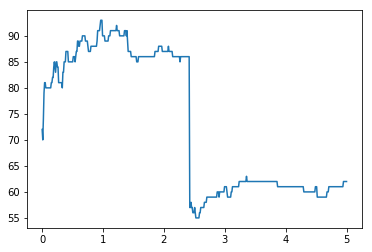

In [49]:
fig11 = plt.figure()
plt.plot(np.linspace(0,5,500),accuracies_2)
plt.show()

## Question 19

In [50]:
print(max_accuracy_2)
print(lambda_best_2)

93
0.961923847695


## Question 20

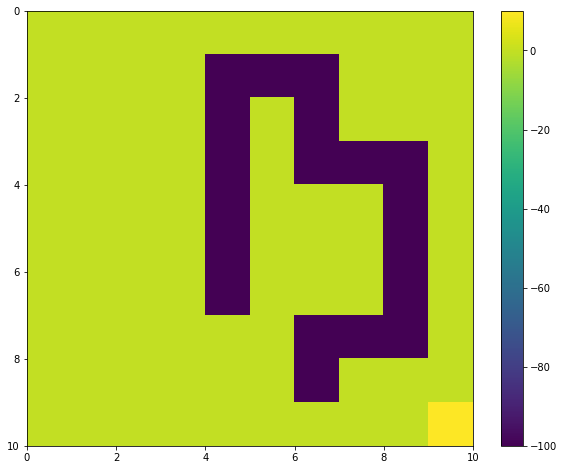

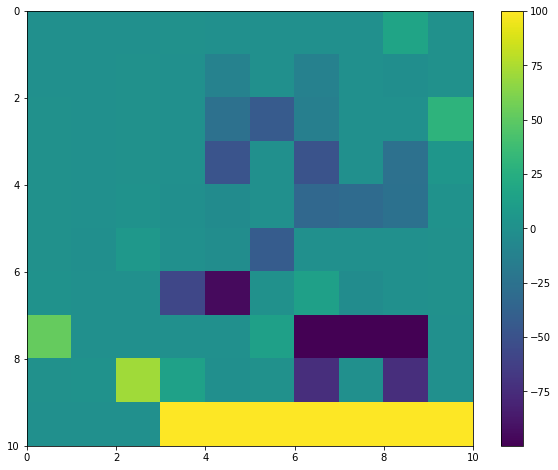

In [51]:
plt_reward(reward_function_2)
plt_reward(R_rec_best_2)


## Question 21

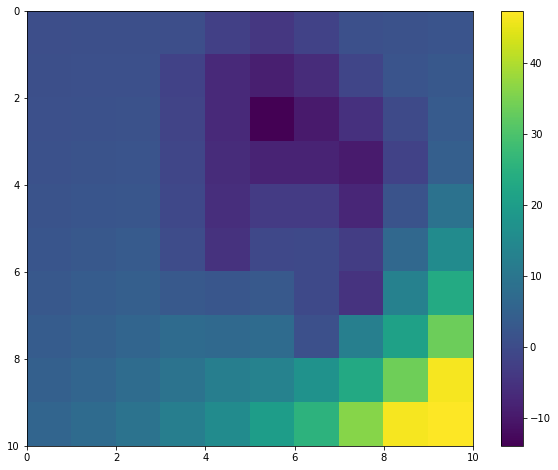

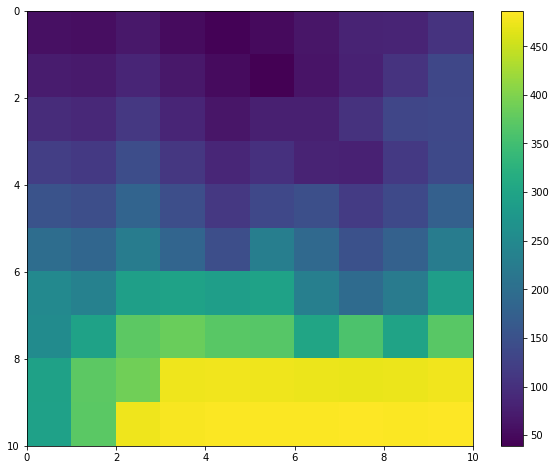

In [52]:
plt_valueHeatMap(Value_2)
plt_valueHeatMap(V_rec_best_2)


## Question 22

## Question 23

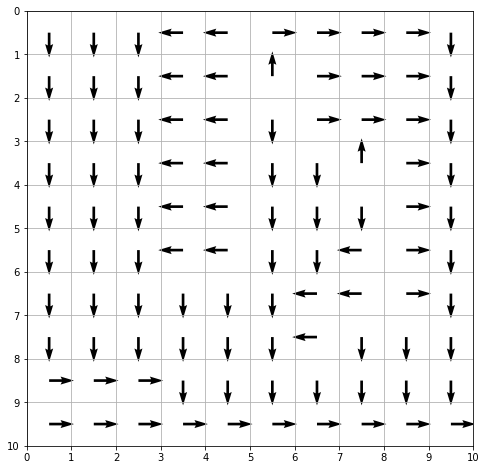

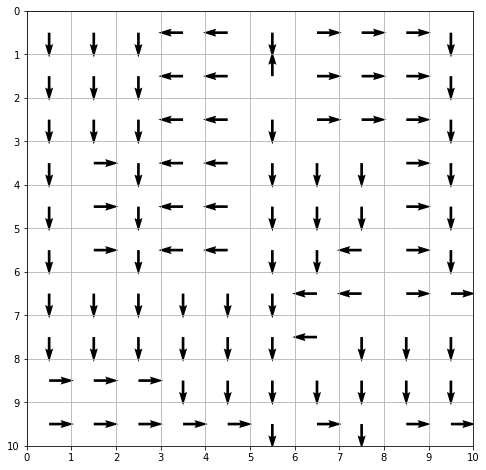

In [40]:
plt_policy(pi_2)
plt_policy(pi_rec_best_2)


## Question 24

## Question 25

In [45]:
gamma = 0.8
pi_a_2 = list(pi_2.reshape(100))
P_list = [[],[],[],[]]

for s in range(100):
    cs = [(s//10), (s%10)] #current state
    direction = {1:[cs[0]-1,cs[1]], 2:[cs[0],cs[1]+1], 3:[cs[0]+1,cs[1]], 4:[cs[0],cs[1]-1], 5:[cs[0],cs[1]]}
    a = pi_a_2[s]
    P = list()
    for i in range(1,5):
        P.append((a==i)*(1-w)+w/4)
    P.append(0)
    for i in range(1,5):
        if direction[i][0] not in range(10) or direction[i][1] not in range(10):
            P[4] += P[i-1]
            P[i-1] = 0
    P_list[0].append(P)
    
    A_ = [1,2,3,4]
    A_.remove(pi_a_2[s])
    for j in range(3):
        a = A_[j]
        P = list()
        for i in range(1,5):
            P.append((a==i)*(1-w)+w/4)
        P.append(0)
        for i in range(1,5):
            if direction[i][0] not in range(10) or direction[i][1] not in range(10):
                P[4] += P[i-1]
                P[i-1] = 0
                
        P_list[j+1].append(P)

P_a2 = np.zeros((100,100))
P_a = np.zeros((3,100,100))

P_a2 = transition_prob(P_list[0])
P_a[0] = transition_prob(P_list[1])
P_a[1] = transition_prob(P_list[2])
P_a[2] = transition_prob(P_list[3])


I = np.eye(100,100)
block_matrix = np.zeros((300,100))
for i in range(3):
    block_matrix[100*i:100*(i+1),:] = -np.dot((P_a2 -P_a[i,:,:]),np.matrix(I-gamma*P_a2).I)
# print(block_matrix.shape)

Rmax = 1

# G
G = np.zeros((1000,300))
identity = np.concatenate((np.eye(100),np.eye(100),np.eye(100)),axis=0)
G[0:300,:] = np.concatenate((block_matrix,identity,np.zeros((300,100))),axis=1)
G[300:600,:] = np.concatenate((block_matrix,np.zeros((300,200))),axis=1)
G[600:700,:] = np.concatenate((np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[700:800,:] = np.concatenate((-np.eye(100),np.zeros((100,100)),-np.eye(100)),axis=1)
G[800:900,:] = np.concatenate((np.eye(100),np.zeros((100,200))),axis=1)
G[900:1000,:] = np.concatenate((-np.eye(100),np.zeros((100,200))),axis=1)

# h
h = np.concatenate((np.zeros((800,1)),Rmax*np.ones((200,1))))



# sweep lambda for largest accuracy
accuracies_2 = []
max_accuracy_2 = 0
R_rec_best_2 = 0
V_rec_best_2 = np.zeros(100)
pi_rec_best_2 = []
for lambda_ in np.linspace(0,5,500):
    # c
    c = np.concatenate((np.zeros(100),np.ones(100),-lambda_*np.ones(100)))
    c = np.matrix(c).T

    G = matrix(G)
    h = matrix(h)
    c = -matrix(c)
    sol = solvers.lp(c,G,h)

    R_rec = np.asarray(sol['x'][:num_state],dtype=np.double).reshape(10,10)
    num_state = 100
    num_action = 4
    w = 0.1
    A = range(1,1+num_action)
    V = np.zeros(100)
    delta = 100000
    epsilon = 0.01
    gamma = 0.825
    while delta > epsilon:
        delta = 0
        for i in range(num_state):
            v = V[i]
            V[i] = V_value(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V)
            delta = max(delta, abs(v-V[i]))

    pi_rec = []
    for i in range(num_state):
        pi_rec.append(pi_policy(s=i, R=R_rec, A=A, w=w, gamma=gamma, V_=V))
    pi_rec = np.asarray(pi_rec).reshape((10,10))
    
    # Accuracy
    accuracy = sum(sum(pi_rec==pi_2))
    accuracies_2.append(accuracy)
    if accuracy > max_accuracy_2:
        max_accuracy_2 = accuracy
        lambda_best_2 = lambda_
        R_rec_best_2 = R_rec
        V_rec_best_2 = V
        pi_rec_best_2 = pi_rec
        
        

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.4416e+01 -1.4561e+02  6e+02  9e-01  1e+01  1e+00
 2: -3.5724e+01 -1.3042e+02  5e+02  7e-01  8e+00  1e+00
 3: -4.8092e+01 -1.0665e+02  3e+02  4e-01  5e+00  8e-01
 4: -5.5857e+01 -7.4936e+01  1e+02  1e-01  2e+00  3e-01
 5: -5.9613e+01 -6.5935e+01  3e+01  5e-02  5e-01  8e-02
 6: -6.1265e+01 -6.4157e+01  1e+01  2e-02  2e-01  3e-02
 7: -6.2320e+01 -6.3316e+01  5e+00  7e-03  8e-02  5e-03
 8: -6.2968e+01 -6.3268e+01  2e+00  2e-03  3e-02  2e-03
 9: -6.3151e+01 -6.3259e+01  6e-01  8e-04  9e-03  6e-04
10: -6.3202e+01 -6.3255e+01  3e-01  4e-04  4e-03  3e-04
11: -6.3225e+01 -6.3251e+01  1e-01  2e-04  2e-03  1e-04
12: -6.3235e+01 -6.3248e+01  7e-02  1e-04  1e-03  7e-05
13: -6.3238e+01 -6.3248e+01  5e-02  7e-05  8e-04  5e-05
14: -6.3242e+01 -6.3248e+01  3e-02  4e-05  5e-04  3e-05
15: -6.3246e+01 -6.3247e+01  7e-03  9e-06  1e-04  7e-06
16: -6.3247e+01 -6.3247e+01  2e-03  2e-06  3e-05  

10: -5.7852e+01 -5.7882e+01  1e-01  2e-04  2e-03  1e-04
11: -5.7874e+01 -5.7881e+01  3e-02  5e-05  6e-04  3e-05
12: -5.7878e+01 -5.7881e+01  1e-02  2e-05  2e-04  1e-05
13: -5.7881e+01 -5.7881e+01  6e-04  9e-07  1e-05  6e-07
14: -5.7881e+01 -5.7881e+01  6e-06  1e-08  1e-07  6e-09
15: -5.7881e+01 -5.7881e+01  6e-08  1e-10  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  3e+01  1e+00
 1: -2.0244e+01 -1.3543e+02  6e+02  9e-01  1e+01  1e+00
 2: -3.0491e+01 -1.1916e+02  5e+02  7e-01  8e+00  1e+00
 3: -4.0218e+01 -9.8266e+01  3e+02  4e-01  5e+00  8e-01
 4: -4.8306e+01 -6.8063e+01  1e+02  1e-01  2e+00  3e-01
 5: -5.2713e+01 -5.9356e+01  3e+01  5e-02  6e-01  7e-02
 6: -5.5537e+01 -5.7764e+01  1e+01  2e-02  2e-01  2e-02
 7: -5.6183e+01 -5.7377e+01  5e+00  9e-03  1e-01  9e-03
 8: -5.6789e+01 -5.7204e+01  2e+00  3e-03  3e-02  2e-03
 9: -5.7015e+01 -5.7171e+01  7e-01  1e-03  1e-02  8e-04
10: -5.7134e+01 -5.7171e+0

 9: -5.1394e+01 -5.1645e+01  1e+00  2e-03  2e-02  1e-03
10: -5.1540e+01 -5.1633e+01  4e-01  7e-04  8e-03  5e-04
11: -5.1600e+01 -5.1622e+01  1e-01  2e-04  2e-03  1e-04
12: -5.1619e+01 -5.1621e+01  1e-02  2e-05  2e-04  1e-05
13: -5.1620e+01 -5.1621e+01  4e-03  8e-06  8e-05  4e-06
14: -5.1621e+01 -5.1621e+01  5e-05  9e-08  1e-06  5e-08
15: -5.1621e+01 -5.1621e+01  5e-07  9e-10  1e-08  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  3e+01  1e+00
 1: -1.6671e+01 -1.2597e+02  5e+02  8e-01  9e+00  1e+00
 2: -2.6011e+01 -1.0878e+02  4e+02  6e-01  7e+00  1e+00
 3: -3.2853e+01 -9.2076e+01  3e+02  4e-01  5e+00  7e-01
 4: -4.2847e+01 -5.9335e+01  8e+01  1e-01  1e+00  2e-01
 5: -4.7177e+01 -5.2968e+01  3e+01  4e-02  5e-01  5e-02
 6: -4.9292e+01 -5.1765e+01  1e+01  2e-02  2e-01  2e-02
 7: -5.0144e+01 -5.1262e+01  5e+00  8e-03  9e-02  8e-03
 8: -5.0589e+01 -5.1088e+01  2e+00  4e-03  4e-02  3e-03
 9: -5.0757e+01 -5.1018e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.4252e+01 -1.1890e+02  5e+02  8e-01  9e+00  1e+00
 2: -2.2904e+01 -1.0104e+02  4e+02  6e-01  6e+00  1e+00
 3: -2.7928e+01 -8.6727e+01  3e+02  4e-01  5e+00  7e-01
 4: -3.7303e+01 -5.7401e+01  9e+01  1e-01  2e+00  2e-01
 5: -4.1936e+01 -5.0141e+01  4e+01  6e-02  7e-01  9e-02
 6: -4.4680e+01 -4.7079e+01  1e+01  2e-02  2e-01  2e-02
 7: -4.5505e+01 -4.6263e+01  3e+00  6e-03  6e-02  6e-03
 8: -4.5751e+01 -4.6036e+01  1e+00  2e-03  2e-02  2e-03
 9: -4.5894e+01 -4.5969e+01  3e-01  6e-04  6e-03  3e-04
10: -4.5939e+01 -4.5958e+01  8e-02  1e-04  2e-03  8e-05
11: -4.5952e+01 -4.5955e+01  1e-02  2e-05  3e-04  1e-05
12: -4.5954e+01 -4.5955e+01  3e-03  5e-06  5e-05  3e-06
13: -4.5954e+01 -4.5955e+01  7e-04  1e-06  1e-05  7e-07
14: -4.5954e+01 -4.5954e+01  2e-05  3e-08  4e-07  2e-08
15: -4.5954e+01 -4.5954e+01  2e-07  3e-10  4e-09  2e-10
Optimal solution found.
     pcost       dcost    

16: -4.1315e+01 -4.1315e+01  6e-07  1e-09  1e-08  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.2173e+01 -1.1212e+02  4e+02  7e-01  8e+00  1e+00
 2: -2.0107e+01 -9.3562e+01  3e+02  5e-01  6e+00  1e+00
 3: -2.3615e+01 -8.0950e+01  3e+02  4e-01  5e+00  7e-01
 4: -3.0611e+01 -5.8452e+01  1e+02  2e-01  2e+00  3e-01
 5: -3.6869e+01 -4.5948e+01  4e+01  7e-02  7e-01  1e-01
 6: -3.8918e+01 -4.2207e+01  1e+01  2e-02  3e-01  3e-02
 7: -4.0208e+01 -4.1010e+01  3e+00  6e-03  6e-02  5e-03
 8: -4.0495e+01 -4.0857e+01  2e+00  3e-03  3e-02  2e-03
 9: -4.0672e+01 -4.0788e+01  5e-01  9e-04  9e-03  6e-04
10: -4.0717e+01 -4.0770e+01  2e-01  4e-04  4e-03  3e-04
11: -4.0746e+01 -4.0757e+01  5e-02  8e-05  9e-04  6e-05
12: -4.0753e+01 -4.0755e+01  1e-02  2e-05  2e-04  1e-05
13: -4.0754e+01 -4.0754e+01  1e-03  2e-06  2e-05  1e-06
14: -4.0754e+01 -4.0754e+01  4e-05  7e-08  7e-07  4e-08
15: -4.0754e+01 -4.0754e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.0793e+01 -1.0709e+02  4e+02  7e-01  8e+00  1e+00
 2: -1.8096e+01 -8.7874e+01  3e+02  5e-01  5e+00  9e-01
 3: -2.0584e+01 -7.6162e+01  3e+02  4e-01  4e+00  7e-01
 4: -2.5141e+01 -6.0186e+01  2e+02  3e-01  3e+00  4e-01
 5: -3.2154e+01 -4.2852e+01  4e+01  8e-02  8e-01  1e-01
 6: -3.4534e+01 -3.8946e+01  2e+01  3e-02  3e-01  5e-02
 7: -3.5641e+01 -3.7435e+01  7e+00  1e-02  1e-01  2e-02
 8: -3.6214e+01 -3.6776e+01  2e+00  4e-03  4e-02  4e-03
 9: -3.6397e+01 -3.6589e+01  8e-01  1e-03  1e-02  1e-03
10: -3.6456e+01 -3.6544e+01  4e-01  7e-04  7e-03  4e-04
11: -3.6494e+01 -3.6524e+01  1e-01  2e-04  2e-03  1e-04
12: -3.6507e+01 -3.6520e+01  5e-02  9e-05  1e-03  5e-05
13: -3.6513e+01 -3.6517e+01  2e-02  3e-05  3e-04  2e-05
14: -3.6515e+01 -3.6516e+01  4e-03  8e-06  9e-05  4e-06
15: -3.6516e+01 -3.6516e+01  1e-03  2e-06  2e-05  1e-06
16: -3.6516e+01 -3.6516e+01  2e-04  4e-07  4e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.7724e+00 -1.0319e+02  4e+02  7e-01  7e+00  1e+00
 2: -1.6308e+01 -8.2819e+01  3e+02  5e-01  5e+00  9e-01
 3: -1.7890e+01 -7.1448e+01  2e+02  4e-01  4e+00  7e-01
 4: -2.0729e+01 -5.9727e+01  2e+02  3e-01  3e+00  5e-01
 5: -2.7807e+01 -3.8060e+01  4e+01  8e-02  8e-01  1e-01
 6: -3.0080e+01 -3.4753e+01  2e+01  3e-02  4e-01  5e-02
 7: -3.1383e+01 -3.3076e+01  7e+00  1e-02  1e-01  2e-02
 8: -3.1886e+01 -3.2559e+01  3e+00  5e-03  5e-02  5e-03
 9: -3.1989e+01 -3.2451e+01  2e+00  3e-03  3e-02  3e-03
10: -3.2164e+01 -3.2352e+01  7e-01  1e-03  1e-02  1e-03
11: -3.2233e+01 -3.2318e+01  3e-01  6e-04  6e-03  5e-04
12: -3.2263e+01 -3.2297e+01  1e-01  2e-04  3e-03  1e-04
13: -3.2281e+01 -3.2290e+01  4e-02  7e-05  7e-04  4e-05
14: -3.2286e+01 -3.2287e+01  6e-03  1e-05  1e-04  6e-06
15: -3.2287e+01 -3.2287e+01  1e-03  3e-06  3e-05  1e-06
16: -3.2287e+01 -3.2287e+01  3e-04  5e-07  5e-06  

16: -2.9212e+01 -2.9212e+01  6e-05  1e-07  1e-06  6e-08
17: -2.9212e+01 -2.9212e+01  7e-07  1e-09  1e-08  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.1003e+00 -1.0006e+02  4e+02  7e-01  7e+00  1e+00
 2: -1.4971e+01 -7.8745e+01  3e+02  5e-01  5e+00  9e-01
 3: -1.5928e+01 -6.7609e+01  2e+02  4e-01  4e+00  7e-01
 4: -1.8436e+01 -5.5509e+01  2e+02  3e-01  3e+00  4e-01
 5: -2.4581e+01 -3.5025e+01  4e+01  8e-02  8e-01  1e-01
 6: -2.6814e+01 -3.1444e+01  2e+01  3e-02  3e-01  5e-02
 7: -2.8101e+01 -2.9378e+01  5e+00  9e-03  9e-02  9e-03
 8: -2.8469e+01 -2.9074e+01  2e+00  4e-03  4e-02  3e-03
 9: -2.8644e+01 -2.8889e+01  9e-01  2e-03  2e-02  1e-03
10: -2.8748e+01 -2.8830e+01  3e-01  6e-04  6e-03  3e-04
11: -2.8781e+01 -2.8809e+01  1e-01  2e-04  2e-03  1e-04
12: -2.8796e+01 -2.8800e+01  2e-02  3e-05  3e-04  2e-05
13: -2.8798e+01 -2.8799e+01  4e-03  8e-06  7e-05  4e-06
14: -2.8798e+01 -2.8798e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -8.5920e+00 -9.7164e+01  4e+02  7e-01  6e+00  1e+00
 2: -1.3817e+01 -7.4992e+01  3e+02  5e-01  4e+00  9e-01
 3: -1.4289e+01 -6.3946e+01  2e+02  4e-01  4e+00  6e-01
 4: -1.6522e+01 -5.2005e+01  1e+02  3e-01  3e+00  4e-01
 5: -2.1967e+01 -3.1852e+01  4e+01  7e-02  7e-01  1e-01
 6: -2.4124e+01 -2.8060e+01  1e+01  3e-02  3e-01  5e-02
 7: -2.5123e+01 -2.6626e+01  6e+00  1e-02  1e-01  2e-02
 8: -2.5465e+01 -2.6096e+01  2e+00  5e-03  4e-02  6e-03
 9: -2.5635e+01 -2.5823e+01  7e-01  1e-03  1e-02  1e-03
10: -2.5704e+01 -2.5760e+01  2e-01  4e-04  4e-03  4e-04
11: -2.5723e+01 -2.5737e+01  5e-02  1e-04  1e-03  6e-05
12: -2.5728e+01 -2.5733e+01  2e-02  4e-05  4e-04  2e-05
13: -2.5730e+01 -2.5732e+01  5e-03  1e-05  1e-04  5e-06
14: -2.5731e+01 -2.5731e+01  1e-04  3e-07  3e-06  1e-07
15: -2.5731e+01 -2.5731e+01  1e-06  3e-09  3e-08  1e-09
Optimal solution found.
     pcost       dcost    

 4: -1.5248e+01 -4.6346e+01  1e+02  2e-01  2e+00  4e-01
 5: -1.9486e+01 -2.9360e+01  4e+01  7e-02  7e-01  1e-01
 6: -2.1196e+01 -2.4749e+01  1e+01  3e-02  2e-01  4e-02
 7: -2.1911e+01 -2.3706e+01  6e+00  1e-02  1e-01  2e-02
 8: -2.2317e+01 -2.2871e+01  2e+00  4e-03  4e-02  3e-03
 9: -2.2491e+01 -2.2664e+01  6e-01  1e-03  1e-02  9e-04
10: -2.2544e+01 -2.2612e+01  2e-01  5e-04  5e-03  4e-04
11: -2.2566e+01 -2.2589e+01  8e-02  2e-04  2e-03  1e-04
12: -2.2574e+01 -2.2582e+01  3e-02  6e-05  5e-04  3e-05
13: -2.2577e+01 -2.2578e+01  4e-03  8e-06  7e-05  5e-06
14: -2.2578e+01 -2.2578e+01  6e-05  1e-07  1e-06  6e-08
15: -2.2578e+01 -2.2578e+01  6e-07  1e-09  1e-08  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.6746e+00 -1.0527e+02  4e+02  7e-01  7e+00  1e+00
 2: -1.2501e+01 -7.1839e+01  2e+02  4e-01  4e+00  8e-01
 3: -1.2161e+01 -6.1122e+01  2e+02  4e-01  3e+00  6e-01
 4: -1.5170e+01 -4.5506e+0

13: -2.0076e+01 -2.0079e+01  1e-02  3e-05  2e-04  1e-05
14: -2.0077e+01 -2.0077e+01  1e-03  2e-06  2e-05  1e-06
15: -2.0077e+01 -2.0077e+01  4e-04  8e-07  7e-06  4e-07
16: -2.0077e+01 -2.0077e+01  6e-05  1e-07  1e-06  6e-08
17: -2.0077e+01 -2.0077e+01  9e-07  2e-09  2e-08  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.0273e+00 -1.1296e+02  5e+02  8e-01  7e+00  1e+00
 2: -1.1460e+01 -6.8112e+01  2e+02  4e-01  4e+00  7e-01
 3: -1.0783e+01 -5.7957e+01  2e+02  4e-01  3e+00  5e-01
 4: -1.4662e+01 -3.8699e+01  9e+01  2e-01  2e+00  3e-01
 5: -1.7536e+01 -2.6904e+01  3e+01  7e-02  6e-01  1e-01
 6: -1.8812e+01 -2.1953e+01  1e+01  2e-02  2e-01  3e-02
 7: -1.9293e+01 -2.0738e+01  5e+00  1e-02  9e-02  1e-02
 8: -1.9637e+01 -2.0007e+01  1e+00  3e-03  2e-02  3e-03
 9: -1.9722e+01 -1.9865e+01  5e-01  1e-03  9e-03  8e-04
10: -1.9761e+01 -1.9807e+01  2e-01  3e-04  3e-03  2e-04
11: -1.9768e+01 -1.9796e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.4967e+00 -1.1959e+02  5e+02  8e-01  7e+00  1e+00
 2: -1.0449e+01 -6.3874e+01  2e+02  4e-01  3e+00  7e-01
 3: -9.6395e+00 -5.4348e+01  2e+02  3e-01  3e+00  5e-01
 4: -1.4746e+01 -2.9961e+01  5e+01  1e-01  9e-01  2e-01
 5: -1.6370e+01 -2.3360e+01  2e+01  5e-02  4e-01  7e-02
 6: -1.7140e+01 -1.9905e+01  9e+00  2e-02  2e-01  2e-02
 7: -1.7509e+01 -1.8308e+01  3e+00  6e-03  5e-02  5e-03
 8: -1.7686e+01 -1.7949e+01  8e-01  2e-03  2e-02  1e-03
 9: -1.7739e+01 -1.7830e+01  3e-01  7e-04  6e-03  4e-04
10: -1.7759e+01 -1.7790e+01  1e-01  2e-04  2e-03  1e-04
11: -1.7766e+01 -1.7776e+01  3e-02  7e-05  6e-04  3e-05
12: -1.7769e+01 -1.7770e+01  4e-03  1e-05  8e-05  4e-06
13: -1.7770e+01 -1.7770e+01  8e-04  2e-06  2e-05  8e-07
14: -1.7770e+01 -1.7770e+01  2e-04  5e-07  4e-06  2e-07
15: -1.7770e+01 -1.7770e+01  2e-06  5e-09  4e-08  2e-09
Optimal solution found.
     pcost       dcost    

12: -1.6302e+01 -1.6310e+01  2e-02  5e-05  4e-04  3e-05
13: -1.6304e+01 -1.6306e+01  5e-03  1e-05  9e-05  6e-06
14: -1.6304e+01 -1.6305e+01  1e-03  3e-06  2e-05  1e-06
15: -1.6304e+01 -1.6305e+01  2e-04  5e-07  4e-06  2e-07
16: -1.6304e+01 -1.6305e+01  8e-05  2e-07  1e-06  8e-08
17: -1.6304e+01 -1.6304e+01  9e-07  2e-09  2e-08  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.9931e+00 -1.2603e+02  5e+02  9e-01  7e+00  1e+00
 2: -9.3743e+00 -5.8820e+01  2e+02  4e-01  3e+00  6e-01
 3: -8.6359e+00 -5.0940e+01  2e+02  3e-01  3e+00  5e-01
 4: -1.3680e+01 -2.6935e+01  5e+01  1e-01  8e-01  1e-01
 5: -1.4850e+01 -2.1537e+01  2e+01  5e-02  4e-01  7e-02
 6: -1.5515e+01 -1.8137e+01  8e+00  2e-02  2e-01  2e-02
 7: -1.5867e+01 -1.6939e+01  3e+00  8e-03  6e-02  8e-03
 8: -1.6057e+01 -1.6327e+01  8e-01  2e-03  2e-02  1e-03
 9: -1.6104e+01 -1.6187e+01  3e-01  6e-04  5e-03  3e-04
10: -1.6121e+01 -1.6154e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.5540e+00 -1.3156e+02  6e+02  9e-01  7e+00  1e+00
 2: -8.3769e+00 -5.3715e+01  2e+02  3e-01  3e+00  6e-01
 3: -7.7699e+00 -4.7301e+01  1e+02  3e-01  2e+00  4e-01
 4: -1.2279e+01 -2.5319e+01  4e+01  1e-01  7e-01  1e-01
 5: -1.3476e+01 -1.9540e+01  2e+01  5e-02  3e-01  6e-02
 6: -1.4027e+01 -1.6203e+01  7e+00  2e-02  1e-01  2e-02
 7: -1.4444e+01 -1.5051e+01  2e+00  4e-03  3e-02  4e-03
 8: -1.4543e+01 -1.4745e+01  6e-01  1e-03  1e-02  8e-04
 9: -1.4586e+01 -1.4641e+01  2e-01  4e-04  3e-03  2e-04
10: -1.4594e+01 -1.4617e+01  7e-02  2e-04  1e-03  9e-05
11: -1.4599e+01 -1.4604e+01  2e-02  4e-05  3e-04  2e-05
12: -1.4600e+01 -1.4602e+01  5e-03  1e-05  9e-05  5e-06
13: -1.4600e+01 -1.4601e+01  6e-04  1e-06  1e-05  7e-07
14: -1.4601e+01 -1.4601e+01  2e-04  4e-07  3e-06  2e-07
15: -1.4601e+01 -1.4601e+01  5e-05  1e-07  8e-07  5e-08
16: -1.4601e+01 -1.4601e+01  1e-06  2e-09  2e-08  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.1124e+00 -1.3683e+02  6e+02  1e+00  7e+00  1e+00
 2: -7.3584e+00 -4.8214e+01  2e+02  3e-01  2e+00  6e-01
 3: -6.9070e+00 -4.3173e+01  1e+02  3e-01  2e+00  4e-01
 4: -1.1069e+01 -2.2278e+01  4e+01  8e-02  6e-01  1e-01
 5: -1.2137e+01 -1.6039e+01  1e+01  3e-02  2e-01  3e-02
 6: -1.2571e+01 -1.4005e+01  5e+00  1e-02  8e-02  1e-02
 7: -1.2874e+01 -1.3214e+01  1e+00  3e-03  2e-02  2e-03
 8: -1.2923e+01 -1.3019e+01  3e-01  7e-04  5e-03  5e-04
 9: -1.2931e+01 -1.2981e+01  2e-01  4e-04  3e-03  3e-04
10: -1.2937e+01 -1.2954e+01  5e-02  1e-04  9e-04  8e-05
11: -1.2940e+01 -1.2944e+01  1e-02  3e-05  2e-04  2e-05
12: -1.2941e+01 -1.2941e+01  2e-03  5e-06  4e-05  3e-06
13: -1.2941e+01 -1.2941e+01  5e-05  1e-07  8e-07  6e-08
14: -1.2941e+01 -1.2941e+01  5e-07  1e-09  8e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  2e+01  1e+00
 1: -4.6995e+00 -1.4131e+02  6e+02  1e+00  7e+00  1e+00
 2: -6.3657e+00 -4.6538e+01  1e+02  3e-01  2e+00  5e-01
 3: -6.1416e+00 -4.1338e+01  1e+02  3e-01  2e+00  4e-01
 4: -9.4979e+00 -2.1645e+01  4e+01  9e-02  6e-01  1e-01
 5: -1.0686e+01 -1.4755e+01  1e+01  3e-02  2e-01  4e-02
 6: -1.0963e+01 -1.2768e+01  6e+00  1e-02  9e-02  1e-02
 7: -1.1279e+01 -1.1778e+01  2e+00  4e-03  3e-02  3e-03
 8: -1.1344e+01 -1.1468e+01  4e-01  9e-04  6e-03  6e-04
 9: -1.1358e+01 -1.1405e+01  1e-01  3e-04  2e-03  2e-04
10: -1.1364e+01 -1.1378e+01  4e-02  1e-04  7e-04  6e-05
11: -1.1366e+01 -1.1373e+01  2e-02  5e-05  3e-04  2e-05
12: -1.1367e+01 -1.1368e+01  4e-03  9e-06  6e-05  4e-06
13: -1.1367e+01 -1.1368e+01  1e-03  3e-06  2e-05  2e-06
14: -1.1367e+01 -1.1367e+01  7e-05  2e-07  1e-06  7e-08
15: -1.1367e+01 -1.1367e+01  7e-07  2e-09  1e-08  7e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.3021e+00 -1.4513e+02  7e+02  1e+00  7e+00  1e+00
 2: -5.4709e+00 -4.7038e+01  2e+02  3e-01  2e+00  5e-01
 3: -5.7395e+00 -3.9366e+01  1e+02  3e-01  2e+00  4e-01
 4: -8.6356e+00 -1.7372e+01  3e+01  6e-02  4e-01  1e-01
 5: -9.1814e+00 -1.2981e+01  1e+01  3e-02  2e-01  3e-02
 6: -9.5257e+00 -1.0824e+01  4e+00  1e-02  6e-02  5e-03
 7: -9.7464e+00 -1.0184e+01  1e+00  3e-03  2e-02  1e-03
 8: -9.8078e+00 -9.9432e+00  4e-01  1e-03  7e-03  4e-04
 9: -9.8249e+00 -9.8936e+00  2e-01  5e-04  3e-03  2e-04
10: -9.8271e+00 -9.8766e+00  2e-01  4e-04  2e-03  2e-04
11: -9.8327e+00 -9.8527e+00  6e-02  1e-04  1e-03  6e-05
12: -9.8351e+00 -9.8415e+00  2e-02  5e-05  3e-04  2e-05
13: -9.8358e+00 -9.8389e+00  1e-02  2e-05  2e-04  1e-05
14: -9.8361e+00 -9.8365e+00  1e-03  3e-06  2e-05  1e-06
15: -9.8362e+00 -9.8362e+00  3e-05  6e-08  4e-07  3e-08
16: -9.8362e+00 -9.8362e+00  3e-07  6e-10  4e-09  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.9515e+00 -1.4808e+02  7e+02  1e+00  7e+00  1e+00
 2: -4.7628e+00 -4.7337e+01  2e+02  3e-01  2e+00  5e-01
 3: -5.5781e+00 -3.5826e+01  1e+02  2e-01  1e+00  3e-01
 4: -7.8579e+00 -1.5209e+01  2e+01  5e-02  3e-01  8e-02
 5: -8.1038e+00 -1.1245e+01  1e+01  2e-02  1e-01  3e-02
 6: -8.2906e+00 -9.7767e+00  5e+00  1e-02  7e-02  6e-03
 7: -8.5391e+00 -8.9057e+00  1e+00  3e-03  2e-02  2e-03
 8: -8.5719e+00 -8.7682e+00  6e-01  1e-03  9e-03  8e-04
 9: -8.5860e+00 -8.6519e+00  2e-01  5e-04  3e-03  2e-04
10: -8.5926e+00 -8.6177e+00  8e-02  2e-04  1e-03  8e-05
11: -8.5947e+00 -8.6071e+00  4e-02  9e-05  6e-04  4e-05
12: -8.5959e+00 -8.5982e+00  7e-03  2e-05  1e-04  7e-06
13: -8.5961e+00 -8.5964e+00  9e-04  2e-06  1e-05  9e-07
14: -8.5961e+00 -8.5962e+00  3e-04  8e-07  5e-06  3e-07
15: -8.5961e+00 -8.5961e+00  4e-06  9e-09  5e-08  4e-09
Optimal solution found.
     pcost       dcost    

11: -7.4128e+00 -7.4317e+00  6e-02  1e-04  8e-04  7e-05
12: -7.4145e+00 -7.4215e+00  2e-02  5e-05  3e-04  2e-05
13: -7.4148e+00 -7.4165e+00  5e-03  1e-05  8e-05  5e-06
14: -7.4148e+00 -7.4155e+00  2e-03  5e-06  3e-05  2e-06
15: -7.4149e+00 -7.4151e+00  7e-04  2e-06  1e-05  7e-07
16: -7.4149e+00 -7.4149e+00  3e-05  6e-08  4e-07  3e-08
17: -7.4149e+00 -7.4149e+00  3e-07  6e-10  4e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.5663e+00 -1.5091e+02  7e+02  1e+00  7e+00  1e+00
 2: -4.0560e+00 -4.7504e+01  2e+02  3e-01  2e+00  5e-01
 3: -5.6670e+00 -2.7258e+01  8e+01  2e-01  1e+00  2e-01
 4: -6.8193e+00 -1.4927e+01  3e+01  6e-02  4e-01  7e-02
 5: -6.9023e+00 -9.6301e+00  9e+00  2e-02  1e-01  2e-02
 6: -7.1168e+00 -8.5618e+00  5e+00  1e-02  6e-02  1e-02
 7: -7.1807e+00 -7.8821e+00  2e+00  5e-03  3e-02  4e-03
 8: -7.2589e+00 -7.5320e+00  9e-01  2e-03  1e-02  1e-03
 9: -7.2561e+00 -7.4646e+0

 7: -6.2099e+00 -6.5952e+00  1e+00  3e-03  2e-02  3e-03
 8: -6.2260e+00 -6.4218e+00  6e-01  1e-03  8e-03  1e-03
 9: -6.2368e+00 -6.2915e+00  2e-01  4e-04  2e-03  3e-04
10: -6.2396e+00 -6.2569e+00  5e-02  1e-04  7e-04  7e-05
11: -6.2409e+00 -6.2472e+00  2e-02  5e-05  3e-04  2e-05
12: -6.2410e+00 -6.2426e+00  5e-03  1e-05  6e-05  5e-06
13: -6.2411e+00 -6.2412e+00  4e-04  1e-06  6e-06  4e-07
14: -6.2411e+00 -6.2411e+00  1e-04  2e-07  1e-06  1e-07
15: -6.2411e+00 -6.2411e+00  7e-05  2e-07  9e-07  7e-08
16: -6.2411e+00 -6.2411e+00  7e-07  2e-09  1e-08  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.2221e+00 -1.5309e+02  7e+02  1e+00  6e+00  1e+00
 2: -3.4756e+00 -4.7528e+01  2e+02  3e-01  2e+00  5e-01
 3: -4.4758e+00 -3.4102e+01  1e+02  2e-01  1e+00  3e-01
 4: -5.8913e+00 -1.2255e+01  2e+01  5e-02  3e-01  6e-02
 5: -5.8130e+00 -8.0881e+00  7e+00  2e-02  1e-01  2e-02
 6: -6.0019e+00 -6.8754e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.8802e+00 -1.5498e+02  8e+02  1e+00  6e+00  1e+00
 2: -2.9372e+00 -4.7453e+01  2e+02  3e-01  2e+00  5e-01
 3: -3.7841e+00 -3.4634e+01  1e+02  2e-01  1e+00  4e-01
 4: -4.8064e+00 -1.1271e+01  2e+01  5e-02  3e-01  5e-02
 5: -4.8422e+00 -7.2377e+00  7e+00  2e-02  1e-01  2e-02
 6: -5.0683e+00 -6.0283e+00  3e+00  7e-03  4e-02  6e-03
 7: -5.1071e+00 -5.4300e+00  1e+00  2e-03  1e-02  1e-03
 8: -5.1139e+00 -5.2035e+00  3e-01  7e-04  4e-03  3e-04
 9: -5.1144e+00 -5.1474e+00  1e-01  2e-04  1e-03  1e-04
10: -5.1148e+00 -5.1283e+00  4e-02  1e-04  6e-04  5e-05
11: -5.1151e+00 -5.1211e+00  2e-02  4e-05  2e-04  2e-05
12: -5.1149e+00 -5.1160e+00  3e-03  8e-06  4e-05  3e-06
13: -5.1149e+00 -5.1156e+00  2e-03  5e-06  3e-05  2e-06
14: -5.1149e+00 -5.1149e+00  6e-05  1e-07  8e-07  6e-08
15: -5.1149e+00 -5.1149e+00  6e-07  1e-09  8e-09  6e-10
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.5410e+00 -1.5661e+02  8e+02  1e+00  6e+00  1e+00
 2: -2.4332e+00 -4.7293e+01  2e+02  3e-01  2e+00  5e-01
 3: -3.2179e+00 -3.3734e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.9077e+00 -1.0947e+01  2e+01  5e-02  3e-01  5e-02
 5: -3.9690e+00 -6.3979e+00  7e+00  2e-02  1e-01  2e-02
 6: -4.1350e+00 -5.2983e+00  4e+00  9e-03  5e-02  7e-03
 7: -4.1883e+00 -4.5866e+00  1e+00  3e-03  2e-02  2e-03
 8: -4.1840e+00 -4.4063e+00  7e-01  2e-03  9e-03  9e-04
 9: -4.1832e+00 -4.2487e+00  2e-01  5e-04  3e-03  2e-04
10: -4.1835e+00 -4.2245e+00  1e-01  3e-04  2e-03  1e-04
11: -4.1827e+00 -4.1975e+00  4e-02  1e-04  6e-04  5e-05
12: -4.1827e+00 -4.1871e+00  1e-02  3e-05  2e-04  1e-05
13: -4.1825e+00 -4.1838e+00  4e-03  1e-05  5e-05  4e-06
14: -4.1824e+00 -4.1825e+00  4e-04  9e-07  5e-06  4e-07
15: -4.1824e+00 -4.1824e+00  4e-06  1e-08  6e-08  4e-09
16: -4.1824e+00 -4.1824e+00  4e-08  1e-10  6e-10  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.2055e+00 -1.5801e+02  8e+02  1e+00  6e+00  1e+00
 2: -1.9585e+00 -4.7060e+01  2e+02  3e-01  2e+00  5e-01
 3: -2.7190e+00 -3.2170e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.1798e+00 -1.0600e+01  2e+01  5e-02  3e-01  5e-02
 5: -3.2840e+00 -5.5298e+00  7e+00  2e-02  9e-02  1e-02
 6: -3.3773e+00 -4.1752e+00  2e+00  6e-03  3e-02  4e-03
 7: -3.4208e+00 -3.8859e+00  1e+00  3e-03  2e-02  2e-03
 8: -3.4142e+00 -3.5547e+00  4e-01  1e-03  5e-03  5e-04
 9: -3.4078e+00 -3.4506e+00  1e-01  3e-04  2e-03  1e-04
10: -3.4073e+00 -3.4351e+00  8e-02  2e-04  1e-03  9e-05
11: -3.4055e+00 -3.4160e+00  3e-02  8e-05  4e-04  3e-05
12: -3.4052e+00 -3.4090e+00  1e-02  3e-05  1e-04  1e-05
13: -3.4048e+00 -3.4060e+00  3e-03  8e-06  4e-05  3e-06
14: -3.4047e+00 -3.4049e+00  5e-04  1e-06  7e-06  5e-07
15: -3.4047e+00 -3.4047e+00  1e-05  3e-08  1e-07  1e-08
16: -3.4047e+00 -3.4047e+00  1e-07  3e-10  1e-09  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.8748e+00 -1.5921e+02  8e+02  1e+00  6e+00  1e+00
 2: -1.5094e+00 -4.6766e+01  2e+02  3e-01  2e+00  5e-01
 3: -2.2692e+00 -3.0183e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.5796e+00 -9.7206e+00  2e+01  5e-02  3e-01  5e-02
 5: -2.6800e+00 -5.6016e+00  9e+00  2e-02  1e-01  2e-02
 6: -2.6737e+00 -3.4595e+00  2e+00  6e-03  3e-02  4e-03
 7: -2.6978e+00 -2.9652e+00  8e-01  2e-03  1e-02  1e-03
 8: -2.6868e+00 -2.8651e+00  5e-01  1e-03  7e-03  7e-04
 9: -2.6786e+00 -2.7112e+00  1e-01  2e-04  1e-03  1e-04
10: -2.6779e+00 -2.6912e+00  4e-02  1e-04  5e-04  5e-05
11: -2.6772e+00 -2.6826e+00  2e-02  4e-05  2e-04  2e-05
12: -2.6767e+00 -2.6774e+00  2e-03  5e-06  2e-05  2e-06
13: -2.6766e+00 -2.6767e+00  1e-04  4e-07  2e-06  2e-07
14: -2.6766e+00 -2.6766e+00  2e-06  4e-09  2e-08  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.5501e+00 -1.6023e+02  8e+02  1e+00  6e+00  1e+00
 2: -1.0831e+00 -4.6420e+01  2e+02  3e-01  2e+00  5e-01
 3: -1.8611e+00 -2.7869e+01  9e+01  2e-01  9e-01  3e-01
 4: -2.0543e+00 -8.3870e+00  2e+01  5e-02  2e-01  4e-02
 5: -2.0368e+00 -4.9056e+00  9e+00  2e-02  1e-01  2e-02
 6: -2.0058e+00 -2.6708e+00  2e+00  5e-03  2e-02  3e-03
 7: -2.0051e+00 -2.2654e+00  8e-01  2e-03  9e-03  1e-03
 8: -1.9980e+00 -2.2104e+00  6e-01  2e-03  8e-03  9e-04
 9: -1.9844e+00 -2.0541e+00  2e-01  5e-04  2e-03  3e-04
10: -1.9792e+00 -1.9979e+00  6e-02  1e-04  7e-04  7e-05
11: -1.9778e+00 -1.9843e+00  2e-02  5e-05  2e-04  2e-05
12: -1.9772e+00 -1.9787e+00  5e-03  1e-05  5e-05  5e-06
13: -1.9772e+00 -1.9784e+00  4e-03  9e-06  4e-05  4e-06
14: -1.9770e+00 -1.9771e+00  2e-04  5e-07  3e-06  2e-07
15: -1.9770e+00 -1.9770e+00  3e-06  7e-09  4e-08  3e-09
16: -1.9770e+00 -1.9770e+00  3e-08  7e-11  4e-10  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.1976e+00 -1.6120e+02  8e+02  1e+00  6e+00  1e+00
 2: -6.3383e-01 -4.5984e+01  2e+02  3e-01  2e+00  5e-01
 3: -1.3906e+00 -2.5502e+01  9e+01  2e-01  8e-01  3e-01
 4: -1.4964e+00 -8.0178e+00  2e+01  5e-02  2e-01  5e-02
 5: -1.2290e+00 -3.1059e+00  6e+00  1e-02  6e-02  1e-02
 6: -1.2562e+00 -2.1041e+00  3e+00  6e-03  3e-02  4e-03
 7: -1.2487e+00 -1.5951e+00  1e+00  3e-03  1e-02  2e-03
 8: -1.2366e+00 -1.4945e+00  8e-01  2e-03  9e-03  1e-03
 9: -1.2173e+00 -1.2903e+00  2e-01  5e-04  3e-03  3e-04
10: -1.2112e+00 -1.2322e+00  6e-02  2e-04  7e-04  9e-05
11: -1.2096e+00 -1.2145e+00  1e-02  4e-05  2e-04  2e-05
12: -1.2091e+00 -1.2104e+00  4e-03  1e-05  5e-05  5e-06
13: -1.2089e+00 -1.2090e+00  5e-04  1e-06  5e-06  5e-07
14: -1.2088e+00 -1.2088e+00  5e-06  1e-08  6e-08  5e-09
15: -1.2088e+00 -1.2088e+00  5e-08  1e-10  6e-10  5e-11
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.5622e-01 -1.6203e+02  9e+02  1e+00  5e+00  1e+00
 2: -2.1306e-01 -4.6295e+01  2e+02  3e-01  2e+00  5e-01
 3: -9.3603e-01 -2.3253e+01  8e+01  2e-01  7e-01  2e-01
 4: -9.3321e-01 -8.0367e+00  2e+01  5e-02  2e-01  6e-02
 5: -6.2396e-01 -3.8069e+00  1e+01  2e-02  1e-01  2e-02
 6: -5.6730e-01 -1.8295e+00  4e+00  9e-03  4e-02  8e-03
 7: -5.3422e-01 -1.0040e+00  1e+00  3e-03  2e-02  3e-03
 8: -5.1541e-01 -8.0896e-01  9e-01  2e-03  1e-02  1e-03
 9: -4.8587e-01 -5.3806e-01  2e-01  4e-04  2e-03  2e-04
10: -4.8093e-01 -5.0545e-01  8e-02  2e-04  8e-04  9e-05
11: -4.7779e-01 -4.8440e-01  2e-02  5e-05  2e-04  2e-05
12: -4.7671e-01 -4.7781e-01  3e-03  8e-06  4e-05  4e-06
13: -4.7653e-01 -4.7673e-01  6e-04  2e-06  7e-06  7e-07
14: -4.7648e-01 -4.7648e-01  7e-06  2e-08  8e-08  7e-09
15: -4.7648e-01 -4.7648e-01  7e-08  2e-10  8e-10  8e-11
Optimal solution found.
     pcost       dcost    

10:  1.4392e-03 -3.0262e-03  1e-02  3e-05  1e-04  1e-05
11:  1.4578e-05 -3.0513e-05  1e-04  3e-07  1e-06  1e-07
12:  1.4577e-07 -3.0512e-07  1e-06  3e-09  1e-08  1e-09
13:  1.4577e-09 -3.0512e-09  1e-08  3e-11  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  1e+01  1e+00
 1: -4.9350e-01 -1.6278e+02  9e+02  1e+00  5e+00  1e+00
 2:  2.2038e-01 -4.6994e+01  2e+02  4e-01  2e+00  5e-01
 3: -4.9558e-01 -2.0381e+01  7e+01  1e-01  6e-01  2e-01
 4: -3.0761e-01 -7.4536e+00  2e+01  5e-02  2e-01  7e-02
 5:  4.3711e-03 -3.9830e+00  1e+01  3e-02  1e-01  3e-02
 6:  1.3498e-01 -1.8700e+00  6e+00  1e-02  6e-02  1e-02
 7:  1.7463e-01 -6.6539e-01  3e+00  6e-03  3e-02  6e-03
 8:  1.4971e-02 -5.3306e-01  1e+00  4e-03  2e-02  1e-03
 9:  4.3208e-02 -4.8399e-02  2e-01  7e-04  3e-03  2e-04
10:  8.8430e-04 -1.7685e-03  6e-03  2e-05  8e-05  6e-06
11:  8.8506e-06 -1.7722e-05  6e-05  2e-07  8e-07  6e-08
12:  8.8503e-08 -1.7721e-0

 8:  1.8250e-03 -3.3162e-03  1e-02  4e-05  2e-04  1e-05
 9:  1.8241e-05 -3.3181e-05  1e-04  4e-07  2e-06  1e-07
10:  1.8241e-07 -3.3180e-07  1e-06  4e-09  2e-08  1e-09
11:  1.8241e-09 -3.3180e-09  1e-08  4e-11  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  9e+00  1e+00
 1: -8.4169e-02 -1.6348e+02  9e+02  1e+00  5e+00  1e+00
 2:  6.9797e-01 -4.7736e+01  2e+02  4e-01  1e+00  5e-01
 3: -2.6783e-02 -1.7597e+01  6e+01  1e-01  5e-01  2e-01
 4:  5.2358e-01 -7.1870e+00  3e+01  6e-02  2e-01  7e-02
 5:  4.8477e-01 -3.5023e+00  1e+01  3e-02  1e-01  2e-02
 6:  4.7392e-01 -9.9738e-01  4e+00  1e-02  4e-02  7e-03
 7:  8.1015e-02 -1.3266e-01  5e-01  2e-03  6e-03  4e-04
 8:  1.2600e-03 -2.3337e-03  8e-03  3e-05  1e-04  8e-06
 9:  1.2593e-05 -2.3331e-05  8e-05  3e-07  1e-06  7e-08
10:  1.2593e-07 -2.3331e-07  8e-07  3e-09  1e-08  7e-10
11:  1.2593e-09 -2.3331e-09  8e-09  3e-11  1e-10  7e-12
Optimal solution found.
  

 1:  3.3108e-01 -1.6405e+02  9e+02  1e+00  5e+00  1e+00
 2:  1.1725e+00 -4.8448e+01  2e+02  4e-01  1e+00  5e-01
 3:  4.6719e-01 -1.7775e+01  6e+01  1e-01  5e-01  2e-01
 4:  9.5545e-01 -8.4989e+00  3e+01  7e-02  3e-01  9e-02
 5:  9.0494e-01 -3.0290e+00  1e+01  3e-02  1e-01  2e-02
 6:  2.5481e-01 -2.8632e-01  1e+00  4e-03  2e-02  1e-03
 7:  3.3881e-03 -1.2118e-02  4e-02  1e-04  4e-04  3e-05
 8:  3.3973e-05 -1.2135e-04  4e-04  1e-06  5e-06  3e-07
 9:  3.3972e-07 -1.2134e-06  4e-06  1e-08  5e-08  3e-09
10:  3.3972e-09 -1.2134e-08  4e-08  1e-10  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  9e+00  1e+00
 1:  3.5968e-01 -1.6408e+02  9e+02  1e+00  5e+00  1e+00
 2:  1.2049e+00 -4.8496e+01  2e+02  4e-01  1e+00  5e-01
 3:  4.9908e-01 -1.7781e+01  6e+01  1e-01  5e-01  2e-01
 4:  9.7711e-01 -8.5842e+00  3e+01  7e-02  3e-01  9e-02
 5:  9.0624e-01 -2.9191e+00  1e+01  3e-02  1e-01  2e-02
 6:  2.3568e-01 -2.5224e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  8e+00  1e+00
 1:  7.4461e-01 -1.6447e+02  9e+02  1e+00  5e+00  1e+00
 2:  1.6373e+00 -4.9127e+01  2e+02  4e-01  1e+00  5e-01
 3:  9.0482e-01 -1.7773e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.2304e+00 -8.8257e+00  3e+01  7e-02  3e-01  9e-02
 5:  8.3507e-01 -1.6109e+00  7e+00  2e-02  7e-02  1e-02
 6:  1.2462e-01 -1.9999e-01  8e-01  2e-03  9e-03  9e-04
 7:  1.6547e-03 -2.4834e-03  1e-02  3e-05  1e-04  1e-05
 8:  1.6542e-05 -2.4826e-05  1e-04  3e-07  1e-06  1e-07
 9:  1.6541e-07 -2.4826e-07  1e-06  3e-09  1e-08  1e-09
10:  1.6541e-09 -2.4826e-09  1e-08  3e-11  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  8e+00  1e+00
 1:  7.7099e-01 -1.6450e+02  9e+02  1e+00  5e+00  9e-01
 2:  1.6667e+00 -4.9170e+01  2e+02  4e-01  1e+00  5e-01
 3:  9.3112e-01 -1.7766e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.2449e+00 -8.7936e+00 

 9:  7.8570e-08 -1.0667e-07  5e-07  1e-09  5e-09  5e-10
10:  7.8570e-10 -1.0667e-09  5e-09  1e-11  5e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.1243e+00 -1.6476e+02  9e+02  1e+00  4e+00  9e-01
 2:  2.0590e+00 -4.9733e+01  2e+02  4e-01  1e+00  5e-01
 3:  1.2685e+00 -1.7677e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.3983e+00 -7.9839e+00  3e+01  7e-02  2e-01  8e-02
 5:  7.2525e-01 -1.3722e+00  6e+00  2e-02  6e-02  1e-02
 6:  7.1409e-02 -9.7108e-02  4e-01  1e-03  4e-03  5e-04
 7:  7.4469e-04 -1.0056e-03  4e-03  1e-05  5e-05  5e-06
 8:  7.4460e-06 -1.0055e-05  4e-05  1e-07  5e-07  5e-08
 9:  7.4459e-08 -1.0055e-07  4e-07  1e-09  5e-09  5e-10
10:  7.4459e-10 -1.0055e-09  4e-09  1e-11  5e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.1484e+00 -1.6477e+02  9e+02  1e+00  4e+00  9e-01
 2: 

 3:  1.5639e+00 -1.7923e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4808e+00 -7.1154e+00  3e+01  6e-02  2e-01  7e-02
 5:  5.9633e-01 -1.0281e+00  5e+00  1e-02  4e-02  7e-03
 6:  2.7585e-02 -3.4563e-02  2e-01  5e-04  2e-03  2e-04
 7:  2.7610e-04 -3.4602e-04  2e-03  5e-06  2e-05  2e-06
 8:  2.7609e-06 -3.4601e-06  2e-05  5e-08  2e-07  2e-08
 9:  2.7609e-08 -3.4601e-08  2e-07  5e-10  2e-09  2e-10
10:  2.7609e-10 -3.4601e-10  2e-09  5e-12  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  8e+00  1e+00
 1:  1.4696e+00 -1.6492e+02  9e+02  1e+00  4e+00  9e-01
 2:  2.4395e+00 -5.0279e+01  2e+02  4e-01  1e+00  4e-01
 3:  1.5831e+00 -1.7930e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4842e+00 -7.0446e+00  3e+01  6e-02  2e-01  7e-02
 5:  5.8528e-01 -9.9773e-01  4e+00  1e-02  4e-02  7e-03
 6:  2.5048e-02 -3.1243e-02  1e-01  4e-04  1e-03  1e-04
 7:  2.5055e-04 -3.1260e-04  1e-03  4e-06  1e-05  1e-06
 8:  2.5054e-06 -3.1259e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  7e+00  1e+00
 1:  1.7804e+00 -1.6499e+02  9e+02  1e+00  4e+00  9e-01
 2:  2.7808e+00 -5.0774e+01  2e+02  4e-01  1e+00  4e-01
 3:  1.8435e+00 -1.7915e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4952e+00 -5.8747e+00  2e+01  5e-02  2e-01  5e-02
 5:  3.7589e-01 -4.2055e-01  2e+00  6e-03  2e-02  2e-03
 6:  5.1423e-03 -6.4150e-03  3e-02  9e-05  3e-04  3e-05
 7:  5.1395e-05 -6.4116e-05  3e-04  9e-07  3e-06  3e-07
 8:  5.1395e-07 -6.4116e-07  3e-06  9e-09  3e-08  3e-09
 9:  5.1395e-09 -6.4116e-09  3e-08  9e-11  3e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  7e+00  1e+00
 1:  1.7999e+00 -1.6499e+02  9e+02  1e+00  4e+00  9e-01
 2:  2.8022e+00 -5.0805e+01  2e+02  4e-01  1e+00  4e-01
 3:  1.8592e+00 -1.7906e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4934e+00 -5.7903e+00  2e+01  5e-02  2e-01  5e-02
 5:  3.5779e-01 -3.7079e-01 

 2:  3.0848e+00 -5.1226e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.0577e+00 -1.7693e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4363e+00 -4.5338e+00  2e+01  4e-02  1e-01  4e-02
 5:  2.2328e-01 -2.3948e-01  1e+00  3e-03  1e-02  1e-03
 6:  2.3947e-03 -2.6790e-03  1e-02  4e-05  1e-04  1e-05
 7:  2.3940e-05 -2.6783e-05  1e-04  4e-07  1e-06  1e-07
 8:  2.3940e-07 -2.6783e-07  1e-06  4e-09  1e-08  1e-09
 9:  2.3940e-09 -2.6783e-09  1e-08  4e-11  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.0743e+00 -1.6498e+02  1e+03  1e+00  4e+00  9e-01
 2:  3.1038e+00 -5.1254e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.0705e+00 -1.7672e+01  7e+01  1e-01  5e-01  2e-01
 4:  1.4299e+00 -4.4390e+00  2e+01  4e-02  1e-01  4e-02
 5:  2.1486e-01 -2.3312e-01  1e+00  3e-03  1e-02  1e-03
 6:  2.2705e-03 -2.5558e-03  1e-02  4e-05  1e-04  1e-05
 7:  2.2700e-05 -2.5551e-05  1e-04  4e-07  1e-06  1e-07
 8:  2.2700e-07 -2.5551e-0

 2:  3.3563e+00 -5.1655e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.2329e+00 -1.7321e+01  7e+01  1e-01  4e-01  2e-01
 4:  1.3125e+00 -3.0835e+00  1e+01  3e-02  1e-01  3e-02
 5:  2.3633e-01 -4.7154e-01  2e+00  5e-03  2e-02  3e-03
 6:  3.0199e-03 -5.3068e-03  2e-02  6e-05  2e-04  3e-05
 7:  3.0190e-05 -5.3051e-05  2e-04  6e-07  2e-06  3e-07
 8:  3.0190e-07 -5.3051e-07  2e-06  6e-09  2e-08  3e-09
 9:  3.0190e-09 -5.3051e-09  2e-08  6e-11  2e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.3193e+00 -1.6508e+02  1e+03  1e+00  4e+00  9e-01
 2:  3.3735e+00 -5.1685e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.2435e+00 -1.7293e+01  7e+01  1e-01  4e-01  2e-01
 4:  1.3076e+00 -3.0676e+00  1e+01  3e-02  1e-01  3e-02
 5:  2.3590e-01 -4.7464e-01  2e+00  5e-03  2e-02  3e-03
 6:  3.0096e-03 -5.3355e-03  2e-02  6e-05  2e-04  3e-05
 7:  3.0087e-05 -5.3338e-05  2e-04  6e-07  2e-06  3e-07
 8:  3.0087e-07 -5.3338e-0

 4:  1.2431e+00 -2.9688e+00  1e+01  3e-02  9e-02  2e-02
 5:  2.0944e-01 -4.4934e-01  2e+00  5e-03  1e-02  2e-03
 6:  2.4904e-03 -4.8789e-03  2e-02  5e-05  2e-04  3e-05
 7:  2.4898e-05 -4.8777e-05  2e-04  5e-07  2e-06  3e-07
 8:  2.4898e-07 -4.8777e-07  2e-06  5e-09  2e-08  3e-09
 9:  2.4898e-09 -4.8777e-09  2e-08  5e-11  2e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  7e+00  1e+00
 1:  2.5395e+00 -1.6537e+02  1e+03  1e+00  4e+00  9e-01
 2:  3.6161e+00 -5.2113e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.3843e+00 -1.6815e+01  7e+01  1e-01  4e-01  1e-01
 4:  1.2384e+00 -2.9638e+00  1e+01  3e-02  9e-02  2e-02
 5:  2.0699e-01 -4.4533e-01  2e+00  5e-03  1e-02  2e-03
 6:  2.4473e-03 -4.8224e-03  2e-02  5e-05  2e-04  3e-05
 7:  2.4468e-05 -4.8213e-05  2e-04  5e-07  2e-06  3e-07
 8:  2.4468e-07 -4.8213e-07  2e-06  5e-09  2e-08  3e-09
 9:  2.4468e-09 -4.8213e-09  2e-08  5e-11  2e-10  3e-11
Optimal solution found.
  

 5:  1.7552e-01 -3.8894e-01  2e+00  4e-03  1e-02  2e-03
 6:  1.9472e-03 -4.0865e-03  2e-02  4e-05  1e-04  2e-05
 7:  1.9468e-05 -4.0858e-05  2e-04  4e-07  1e-06  2e-07
 8:  1.9468e-07 -4.0858e-07  2e-06  4e-09  1e-08  2e-09
 9:  1.9468e-09 -4.0858e-09  2e-08  4e-11  1e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  2.7187e+00 -1.6559e+02  1e+03  1e+00  4e+00  9e-01
 2:  3.8153e+00 -5.2491e+01  2e+02  4e-01  1e+00  4e-01
 3:  2.4891e+00 -1.6286e+01  7e+01  1e-01  4e-01  1e-01
 4:  1.1682e+00 -2.8702e+00  1e+01  3e-02  8e-02  2e-02
 5:  1.7313e-01 -3.8435e-01  2e+00  4e-03  1e-02  2e-03
 6:  1.9127e-03 -4.0304e-03  2e-02  4e-05  1e-04  2e-05
 7:  1.9124e-05 -4.0296e-05  2e-04  4e-07  1e-06  2e-07
 8:  1.9124e-07 -4.0296e-07  2e-06  4e-09  1e-08  2e-09
 9:  1.9124e-09 -4.0296e-09  2e-08  4e-11  1e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  2.8629e+00 -1.6575e+02  1e+03  1e+00  3e+00  9e-01
 2:  3.9781e+00 -5.2825e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.5892e+00 -1.6348e+01  7e+01  1e-01  4e-01  1e-01
 4:  1.1370e+00 -2.8220e+00  1e+01  3e-02  8e-02  2e-02
 5:  1.5267e-01 -3.4616e-01  1e+00  4e-03  1e-02  2e-03
 6:  1.6316e-03 -3.5710e-03  2e-02  4e-05  1e-04  2e-05
 7:  1.6314e-05 -3.5704e-05  2e-04  4e-07  1e-06  2e-07
 8:  1.6314e-07 -3.5704e-07  2e-06  4e-09  1e-08  2e-09
 9:  1.6314e-09 -3.5704e-09  2e-08  4e-11  1e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  2.8731e+00 -1.6577e+02  1e+03  1e+00  3e+00  9e-01
 2:  3.9898e+00 -5.2850e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.5977e+00 -1.6390e+01  7e+01  1e-01  4e-01  1e-01
 4:  1.1370e+00 -2.8222e+00  1e+01  3e-02  8e-02  2e-02
 5:  1.5176e-01 -3.4467e-01 

 6:  1.4521e-03 -3.3026e-03  1e-02  4e-05  9e-05  2e-05
 7:  1.4519e-05 -3.3022e-05  1e-04  4e-07  9e-07  2e-07
 8:  1.4519e-07 -3.3022e-07  1e-06  4e-09  9e-09  2e-09
 9:  1.4519e-09 -3.3022e-09  1e-08  4e-11  9e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.0120e+00 -1.6592e+02  1e+03  1e+00  3e+00  9e-01
 2:  4.1509e+00 -5.3216e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.7156e+00 -1.6990e+01  8e+01  1e-01  4e-01  1e-01
 4:  1.1326e+00 -2.8149e+00  1e+01  3e-02  8e-02  2e-02
 5:  1.3747e-01 -3.2159e-01  1e+00  3e-03  9e-03  2e-03
 6:  1.4404e-03 -3.2847e-03  1e-02  3e-05  9e-05  2e-05
 7:  1.4402e-05 -3.2843e-05  1e-04  3e-07  9e-07  2e-07
 8:  1.4402e-07 -3.2843e-07  1e-06  3e-09  9e-09  2e-09
 9:  1.4402e-09 -3.2843e-09  1e-08  3e-11  9e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.1245e+00 -1.6605e+02  1e+03  1e+00  3e+00  9e-01
 2:  4.2868e+00 -5.3566e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.8143e+00 -1.7546e+01  8e+01  2e-01  4e-01  1e-01
 4:  1.1224e+00 -2.7958e+00  1e+01  3e-02  7e-02  2e-02
 5:  1.2288e-01 -2.9774e-01  1e+00  3e-03  8e-03  2e-03
 6:  1.2699e-03 -3.0207e-03  1e-02  3e-05  8e-05  2e-05
 7:  1.2698e-05 -3.0204e-05  1e-04  3e-07  8e-07  2e-07
 8:  1.2698e-07 -3.0204e-07  1e-06  3e-09  8e-09  2e-09
 9:  1.2698e-09 -3.0204e-09  1e-08  3e-11  8e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.1311e+00 -1.6605e+02  1e+03  1e+00  3e+00  9e-01
 2:  4.2950e+00 -5.3588e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.8201e+00 -1.7582e+01  8e+01  2e-01  4e-01  1e-01
 4:  1.1216e+00 -2.7943e+00  1e+01  3e-02  7e-02  2e-02
 5:  1.2192e-01 -2.9616e-01 

 7:  1.1205e-05 -2.7779e-05  1e-04  3e-07  7e-07  1e-07
 8:  1.1205e-07 -2.7779e-07  1e-06  3e-09  7e-09  1e-09
 9:  1.1205e-09 -2.7779e-09  1e-08  3e-11  7e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.2119e+00 -1.6615e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.4025e+00 -5.3927e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.8957e+00 -1.8047e+01  8e+01  2e-01  4e-01  1e-01
 4:  1.1078e+00 -2.7688e+00  1e+01  3e-02  7e-02  2e-02
 5:  1.0854e-01 -2.7348e-01  1e+00  3e-03  7e-03  1e-03
 6:  1.1103e-03 -2.7609e-03  1e-02  3e-05  7e-05  1e-05
 7:  1.1102e-05 -2.7607e-05  1e-04  3e-07  7e-07  1e-07
 8:  1.1102e-07 -2.7607e-07  1e-06  3e-09  7e-09  1e-09
 9:  1.1102e-09 -2.7607e-09  1e-08  3e-11  7e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  6e+00  1e+00
 1:  3.2169e+00 -1.6615e+02  1e+03  1e+00  3e+00  8e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  5e+00  1e+00
 1:  3.2719e+00 -1.6622e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.4921e+00 -5.4268e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.9576e+00 -1.8462e+01  9e+01  2e-01  4e-01  1e-01
 4:  1.0898e+00 -2.7360e+00  1e+01  3e-02  7e-02  2e-02
 5:  9.5519e-02 -2.5024e-01  1e+00  3e-03  6e-03  1e-03
 6:  9.7009e-04 -2.5178e-03  1e-02  3e-05  6e-05  1e-05
 7:  9.7002e-06 -2.5176e-05  1e-04  3e-07  6e-07  1e-07
 8:  9.7002e-08 -2.5176e-07  1e-06  3e-09  6e-09  1e-09
 9:  9.7002e-10 -2.5176e-09  1e-08  3e-11  6e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  5e+00  1e+00
 1:  3.2754e+00 -1.6623e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.4978e+00 -5.4292e+01  3e+02  4e-01  1e+00  4e-01
 3:  2.9615e+00 -1.8490e+01  9e+01  2e-01  4e-01  1e-01
 4:  1.0877e+00 -2.7322e+00  1e+01  3e-02  7e-02  2e-02
 5:  9.4406e-02 -2.4805e-01 

 8:  8.2362e-08 -2.2290e-07  1e-06  2e-09  5e-09  1e-09
 9:  8.2362e-10 -2.2290e-09  1e-08  2e-11  5e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  5e+00  1e+00
 1:  3.3120e+00 -1.6629e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.5629e+00 -5.4599e+01  3e+02  4e-01  1e+00  4e-01
 3:  3.0061e+00 -1.8841e+01  9e+01  2e-01  4e-01  1e-01
 4:  1.0566e+00 -2.6807e+00  1e+01  3e-02  6e-02  2e-02
 5:  8.0558e-02 -2.2006e-01  1e+00  2e-03  5e-03  1e-03
 6:  8.1304e-04 -2.2076e-03  1e-02  2e-05  5e-05  1e-05
 7:  8.1299e-06 -2.2075e-05  1e-04  2e-07  5e-07  1e-07
 8:  8.1299e-08 -2.2075e-07  1e-06  2e-09  5e-09  1e-09
 9:  8.1299e-10 -2.2075e-09  1e-08  2e-11  5e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  5e+00  1e+00
 1:  3.3141e+00 -1.6629e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.5673e+00 -5.4623e+01  3e+02  4e-01  1e+00  4e-01
 3: 

 1:  3.3333e+00 -1.6634e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.6160e+00 -5.4921e+01  3e+02  4e-01  1e+00  4e-01
 3:  3.0421e+00 -1.9187e+01  9e+01  2e-01  4e-01  1e-01
 4:  1.0174e+00 -2.6201e+00  1e+01  3e-02  6e-02  2e-02
 5:  6.7026e-02 -1.9140e-01  9e-01  2e-03  4e-03  1e-03
 6:  6.7365e-04 -1.9164e-03  9e-03  2e-05  4e-05  1e-05
 7:  6.7361e-06 -1.9163e-05  9e-05  2e-07  4e-07  1e-07
 8:  6.7361e-08 -1.9162e-07  9e-07  2e-09  4e-09  1e-09
 9:  6.7361e-10 -1.9162e-09  9e-09  2e-11  4e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+02  2e+03  2e+00  5e+00  1e+00
 1:  3.3341e+00 -1.6634e+02  1e+03  1e+00  3e+00  8e-01
 2:  4.6192e+00 -5.4943e+01  3e+02  4e-01  1e+00  4e-01
 3:  3.0443e+00 -1.9210e+01  9e+01  2e-01  4e-01  1e-01
 4:  1.0144e+00 -2.6157e+00  1e+01  3e-02  6e-02  2e-02
 5:  6.6117e-02 -1.8942e-01  8e-01  2e-03  4e-03  1e-03
 6:  6.6436e-04 -1.8964e-03  8e-03  2e-05  4e-05  1e-05
 7:  6.6432e-06 -1.8963e-0

97
0.551102204409


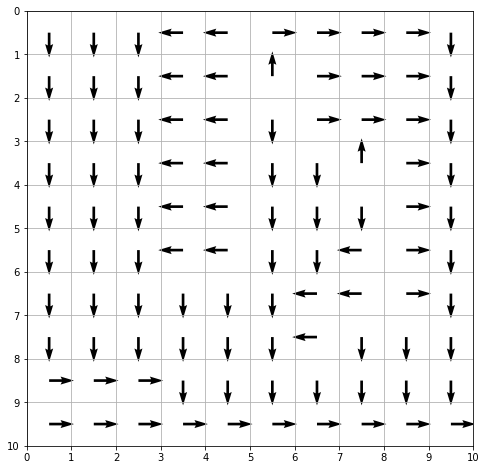

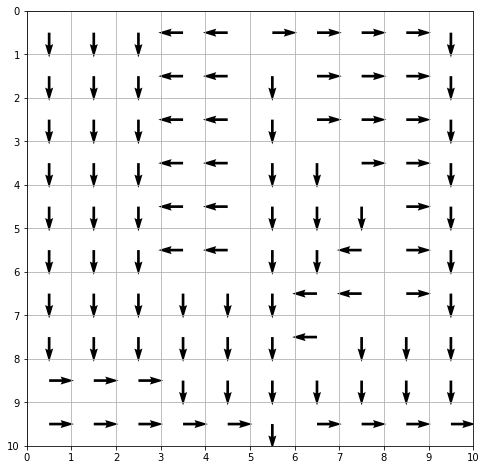

In [46]:
print(max_accuracy_2)
print(lambda_best_2)
plt_policy(pi_2)
plt_policy(pi_rec_best_2)
